In [1]:
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import onekey_algo.custom.components as okcomp
from onekey_algo import get_param_in_cwd

plt.rcParams['figure.dpi'] = 300
model_names = get_param_in_cwd('compare_models')
# 获取配置
task = get_param_in_cwd('task_column')
labelf = get_param_in_cwd('label_file')
group_info = get_param_in_cwd('dataset_column') or 'group'

# 读取label文件。
labels = [task]
label_data_ = pd.read_csv(labelf)
label_data_['ID'] = label_data_['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
label_data_ = label_data_[['ID', group_info, task]]
label_data_ = label_data_.dropna(axis=0)

ids = label_data_['ID']
print(label_data_.columns)
label_data = label_data_
label_data

Index(['ID', 'group', 'label'], dtype='object')


ID  group  label
0    251.nii.gz  test1      0
1    252.nii.gz  test1      0
2    253.nii.gz  test1      0
3    254.nii.gz  test1      0
4    255.nii.gz  test1      0
..          ...    ...    ...
617    7.nii.gz    val      0
618   74.nii.gz    val      1
619   87.nii.gz    val      1
620   92.nii.gz    val      0
621   97.nii.gz    val      1

[622 rows x 3 columns]

# 训练集-Nomogram

ID   -0_x  thy_resnet18   -0_y  thy_ViT   -0_x  thy_vgg11   -0_y  \
0     36.nii.gz  0.176     8.243e-01  0.254    0.746  0.264      0.736  0.150   
1     23.nii.gz  0.052     9.485e-01  0.143    0.857  0.151      0.849  0.028   
2     35.nii.gz  0.586     4.145e-01  0.563    0.437  0.465      0.535  0.206   
3     42.nii.gz  0.572     4.284e-01  0.278    0.722  0.371      0.629  0.344   
4    132.nii.gz  0.999     7.009e-04  0.152    0.848  0.419      0.581  0.904   
..          ...    ...           ...    ...      ...    ...        ...    ...   
138  126.nii.gz  0.566     4.340e-01  0.208    0.792  0.374      0.626  0.204   
139  179.nii.gz  0.445     5.552e-01  0.185    0.815  0.545      0.455  0.482   
140  193.nii.gz  0.015     9.846e-01  0.567    0.433  0.171      0.829  0.199   
141   55.nii.gz  0.032     9.678e-01  0.150    0.850  0.323      0.677  0.231   
142  180.nii.gz  0.124     8.756e-01  0.193    0.807  0.253      0.747  0.131   

     thy_densenet121  group  label  
0              0.850  train      1  
1              0.972  train      1  
2              0.794  train      1  
3              0.656  train      1  
4              0.096  train      0  
..               ...    ...    ...  
138            0.796  train      0  
139            0.518  train      1  
140            0.801  train      1  
141            0.769  train      1  
142            0.869  train      1  

[143 rows x 11 columns]

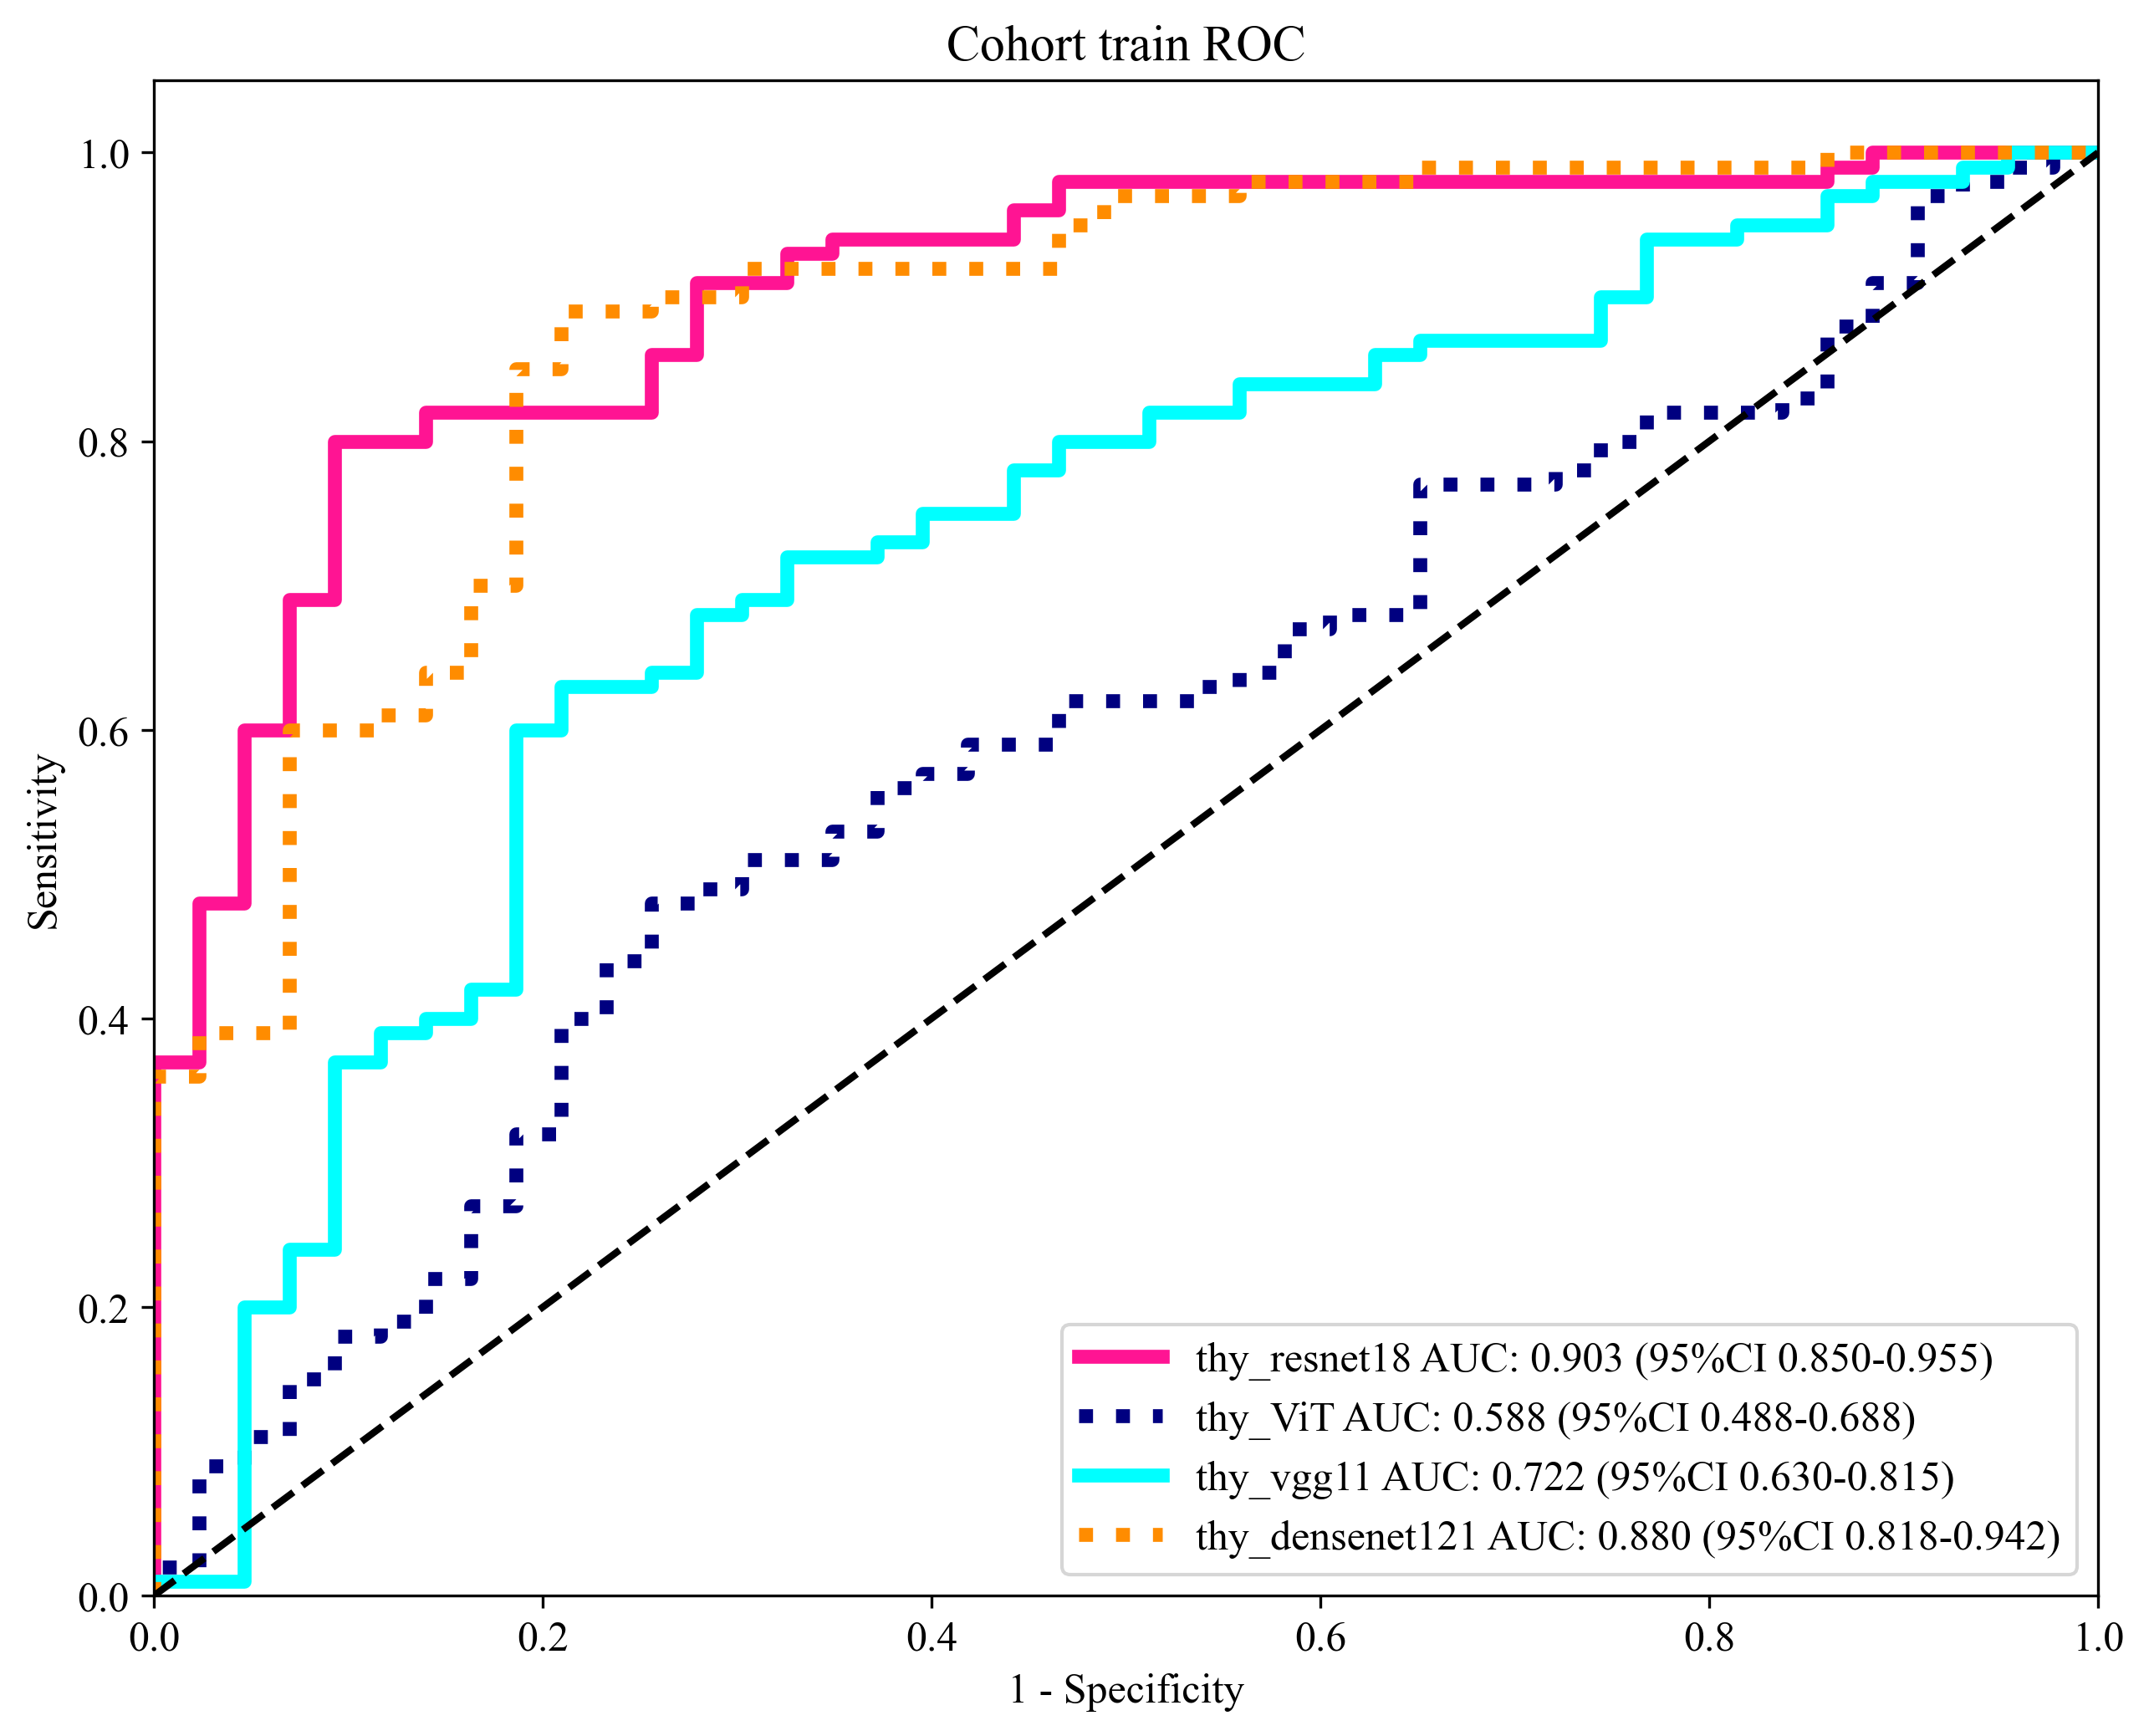

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0     thy_resnet18     0.832  0.903  0.8503 - 0.9553         0.80   
1          thy_ViT     0.559  0.588  0.4883 - 0.6879         0.48   
2        thy_vgg11     0.678  0.722  0.6296 - 0.8150         0.63   
3  thy_densenet121     0.860  0.880  0.8185 - 0.9420         0.89   

   Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0        0.907  0.952  0.661      0.952    0.80  0.870      0.635  train  
1        0.744  0.814  0.381      0.814    0.48  0.604      0.773  train  
2        0.791  0.875  0.479      0.875    0.63  0.733      0.721  train  
3        0.791  0.908  0.756      0.908    0.89  0.899      0.607  train

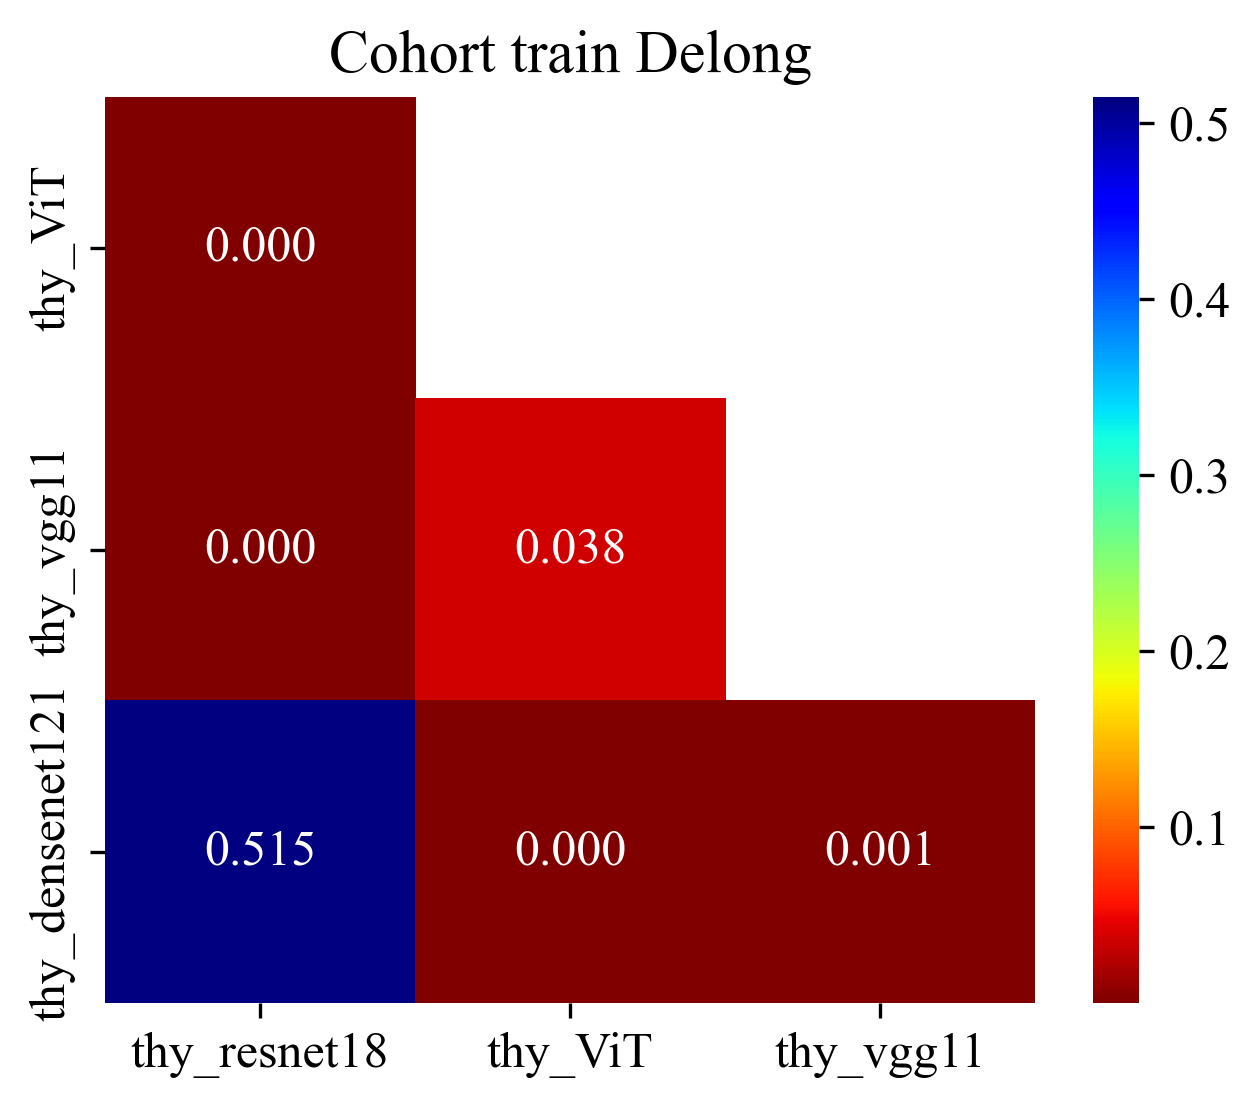

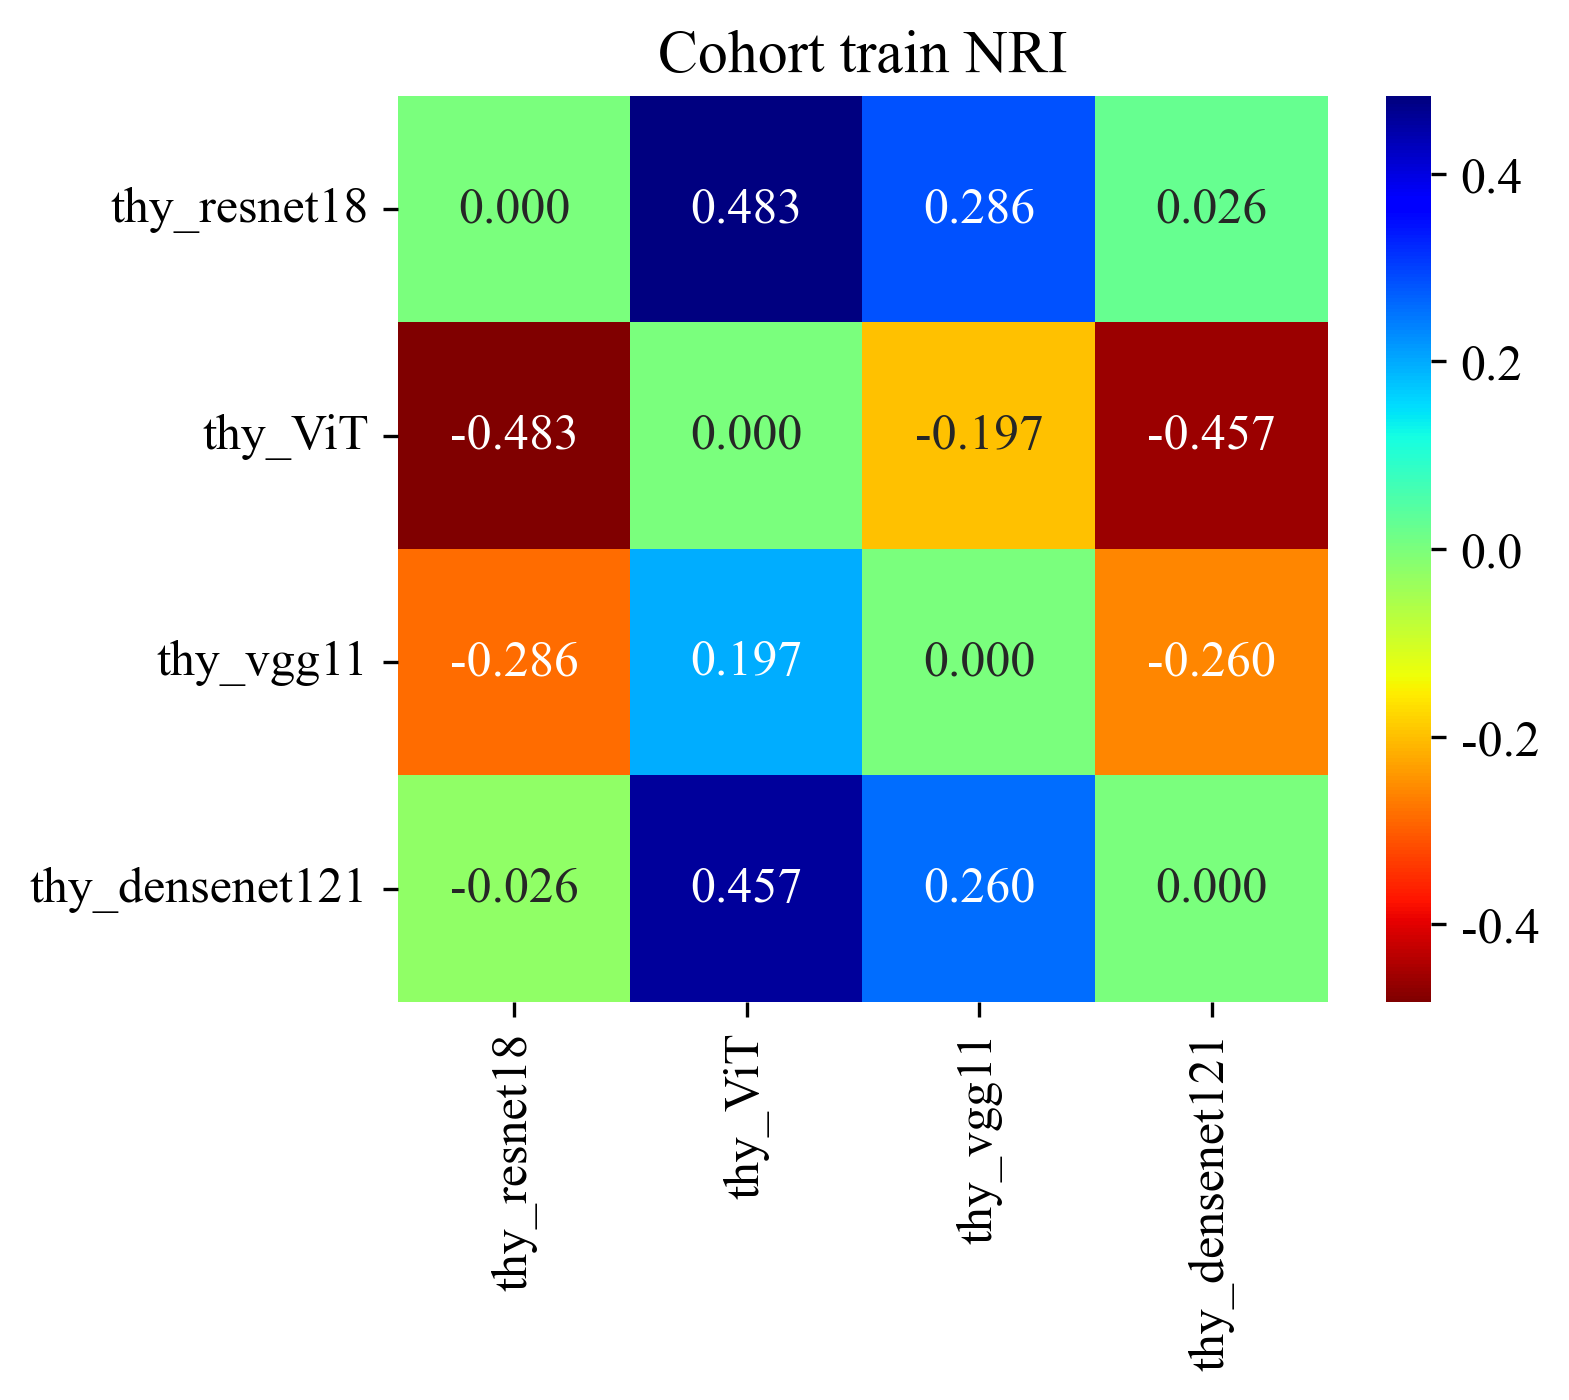

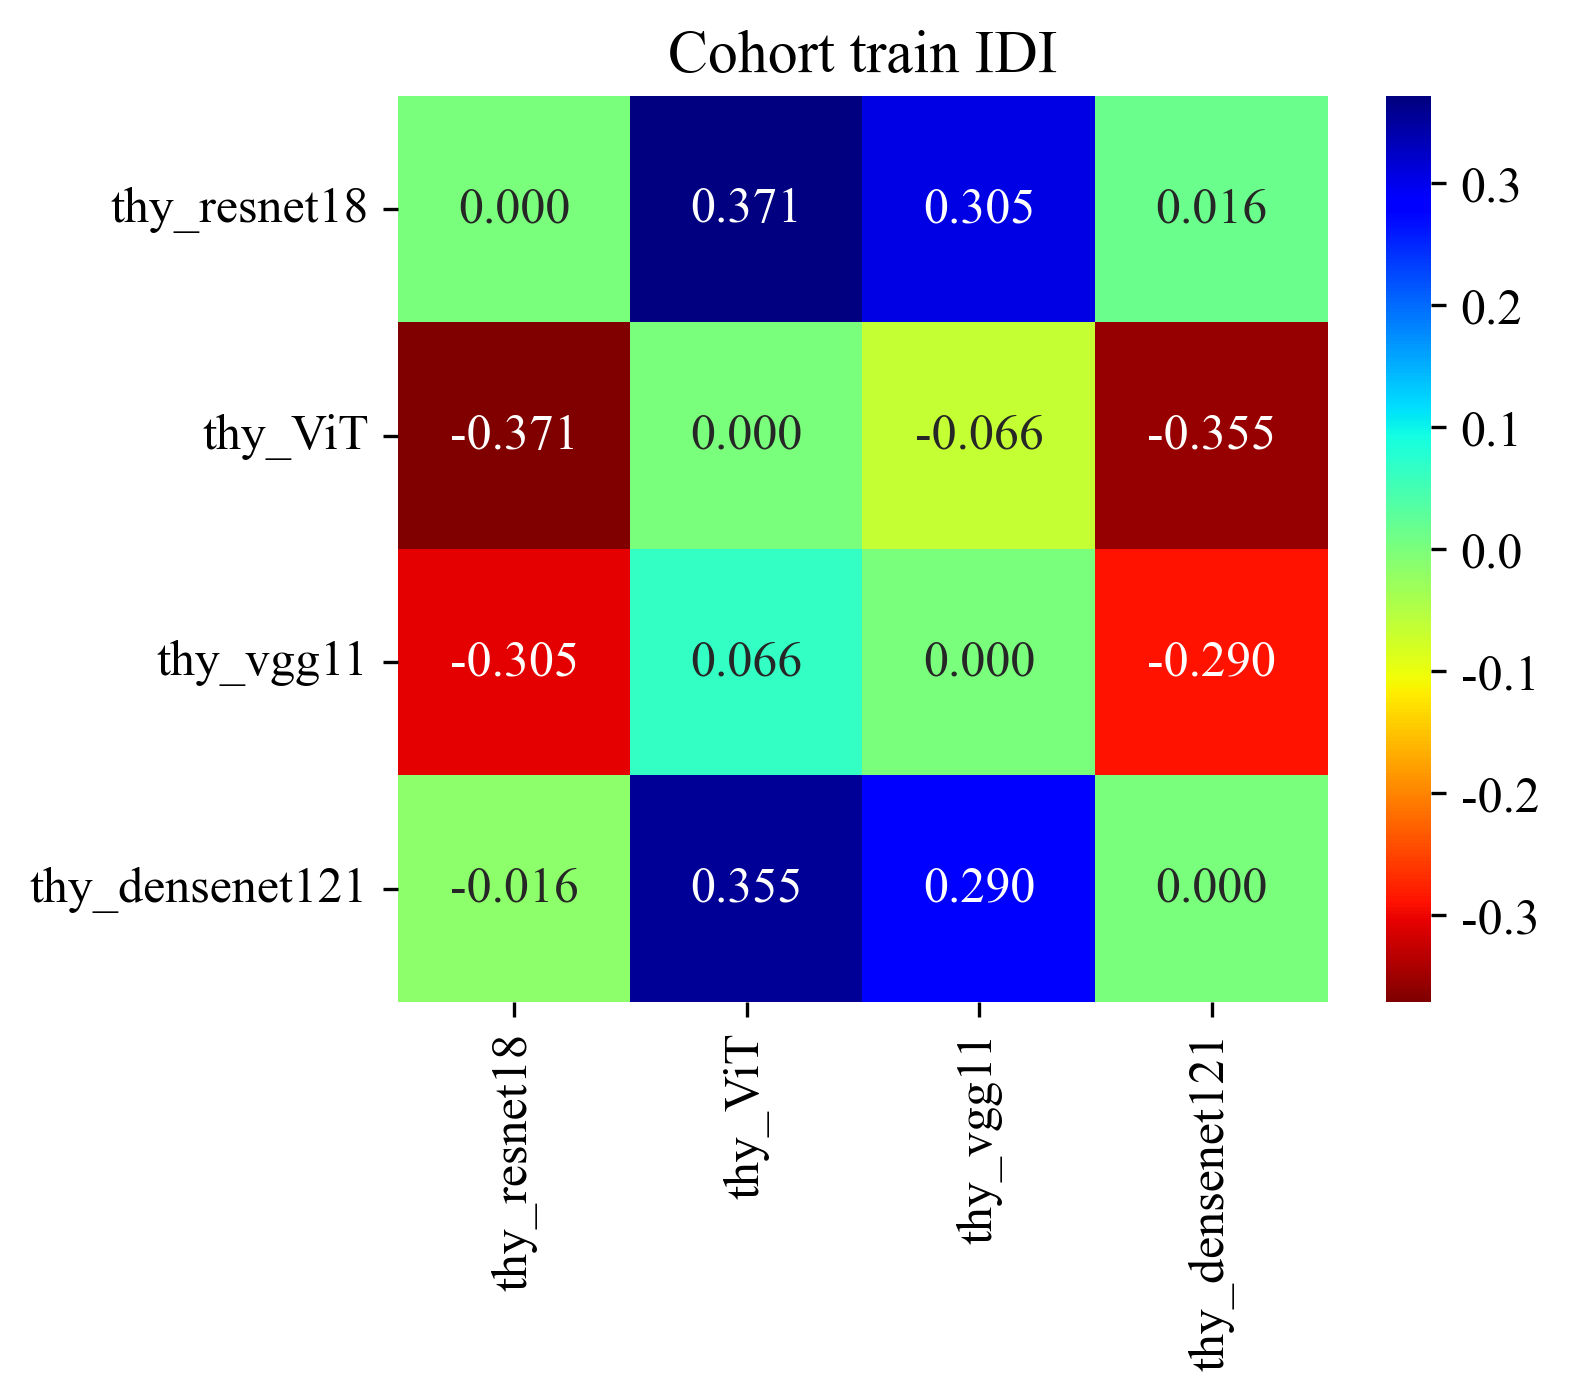

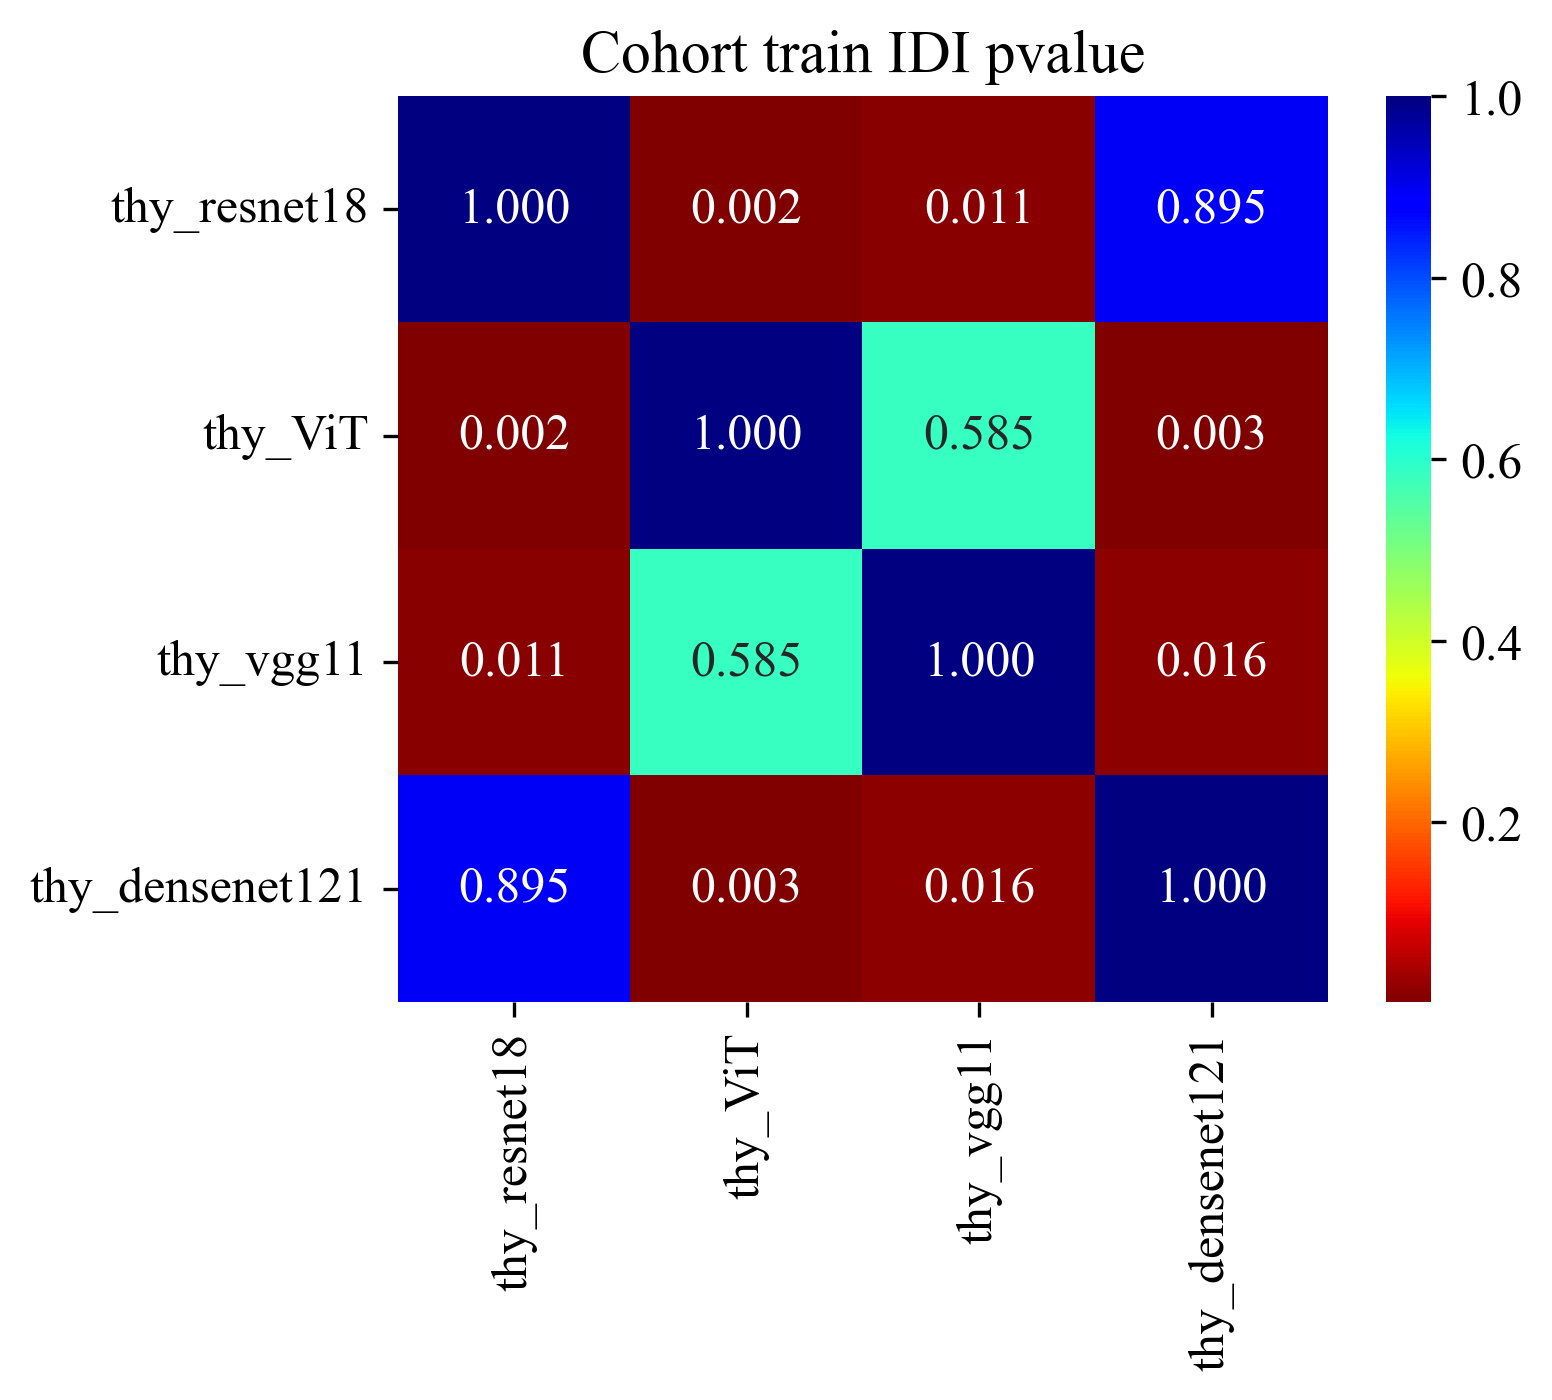

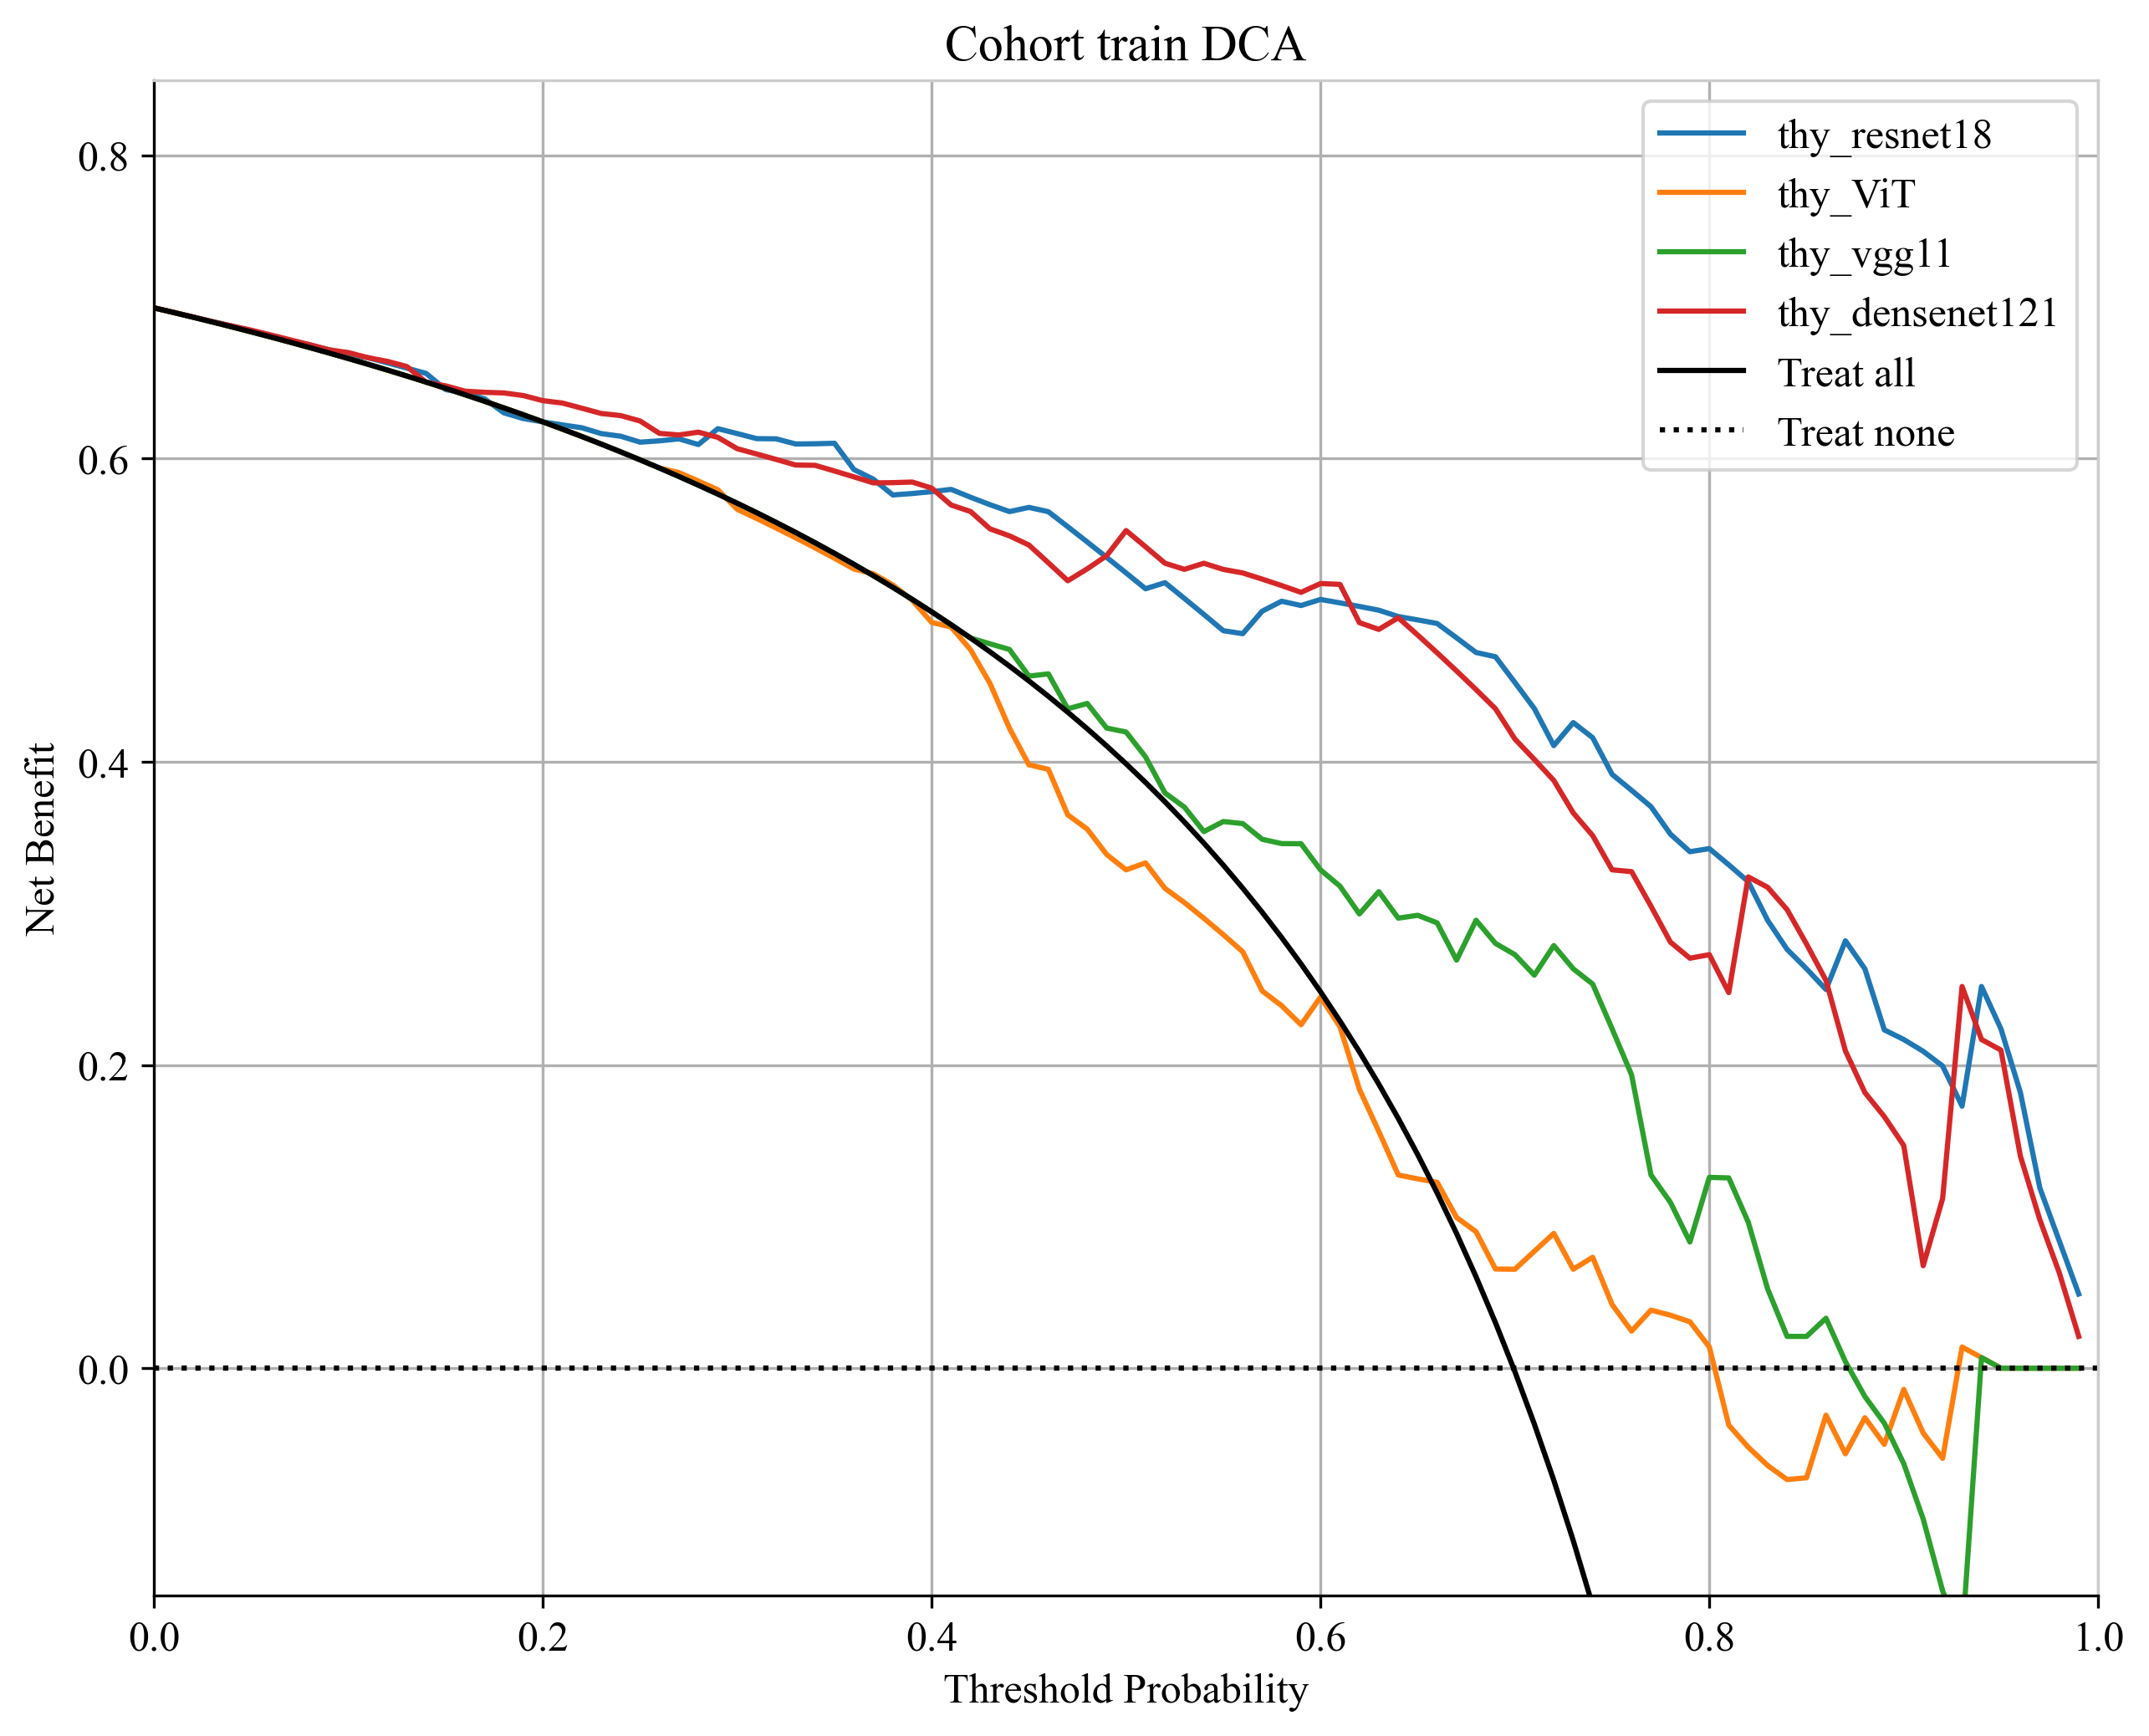

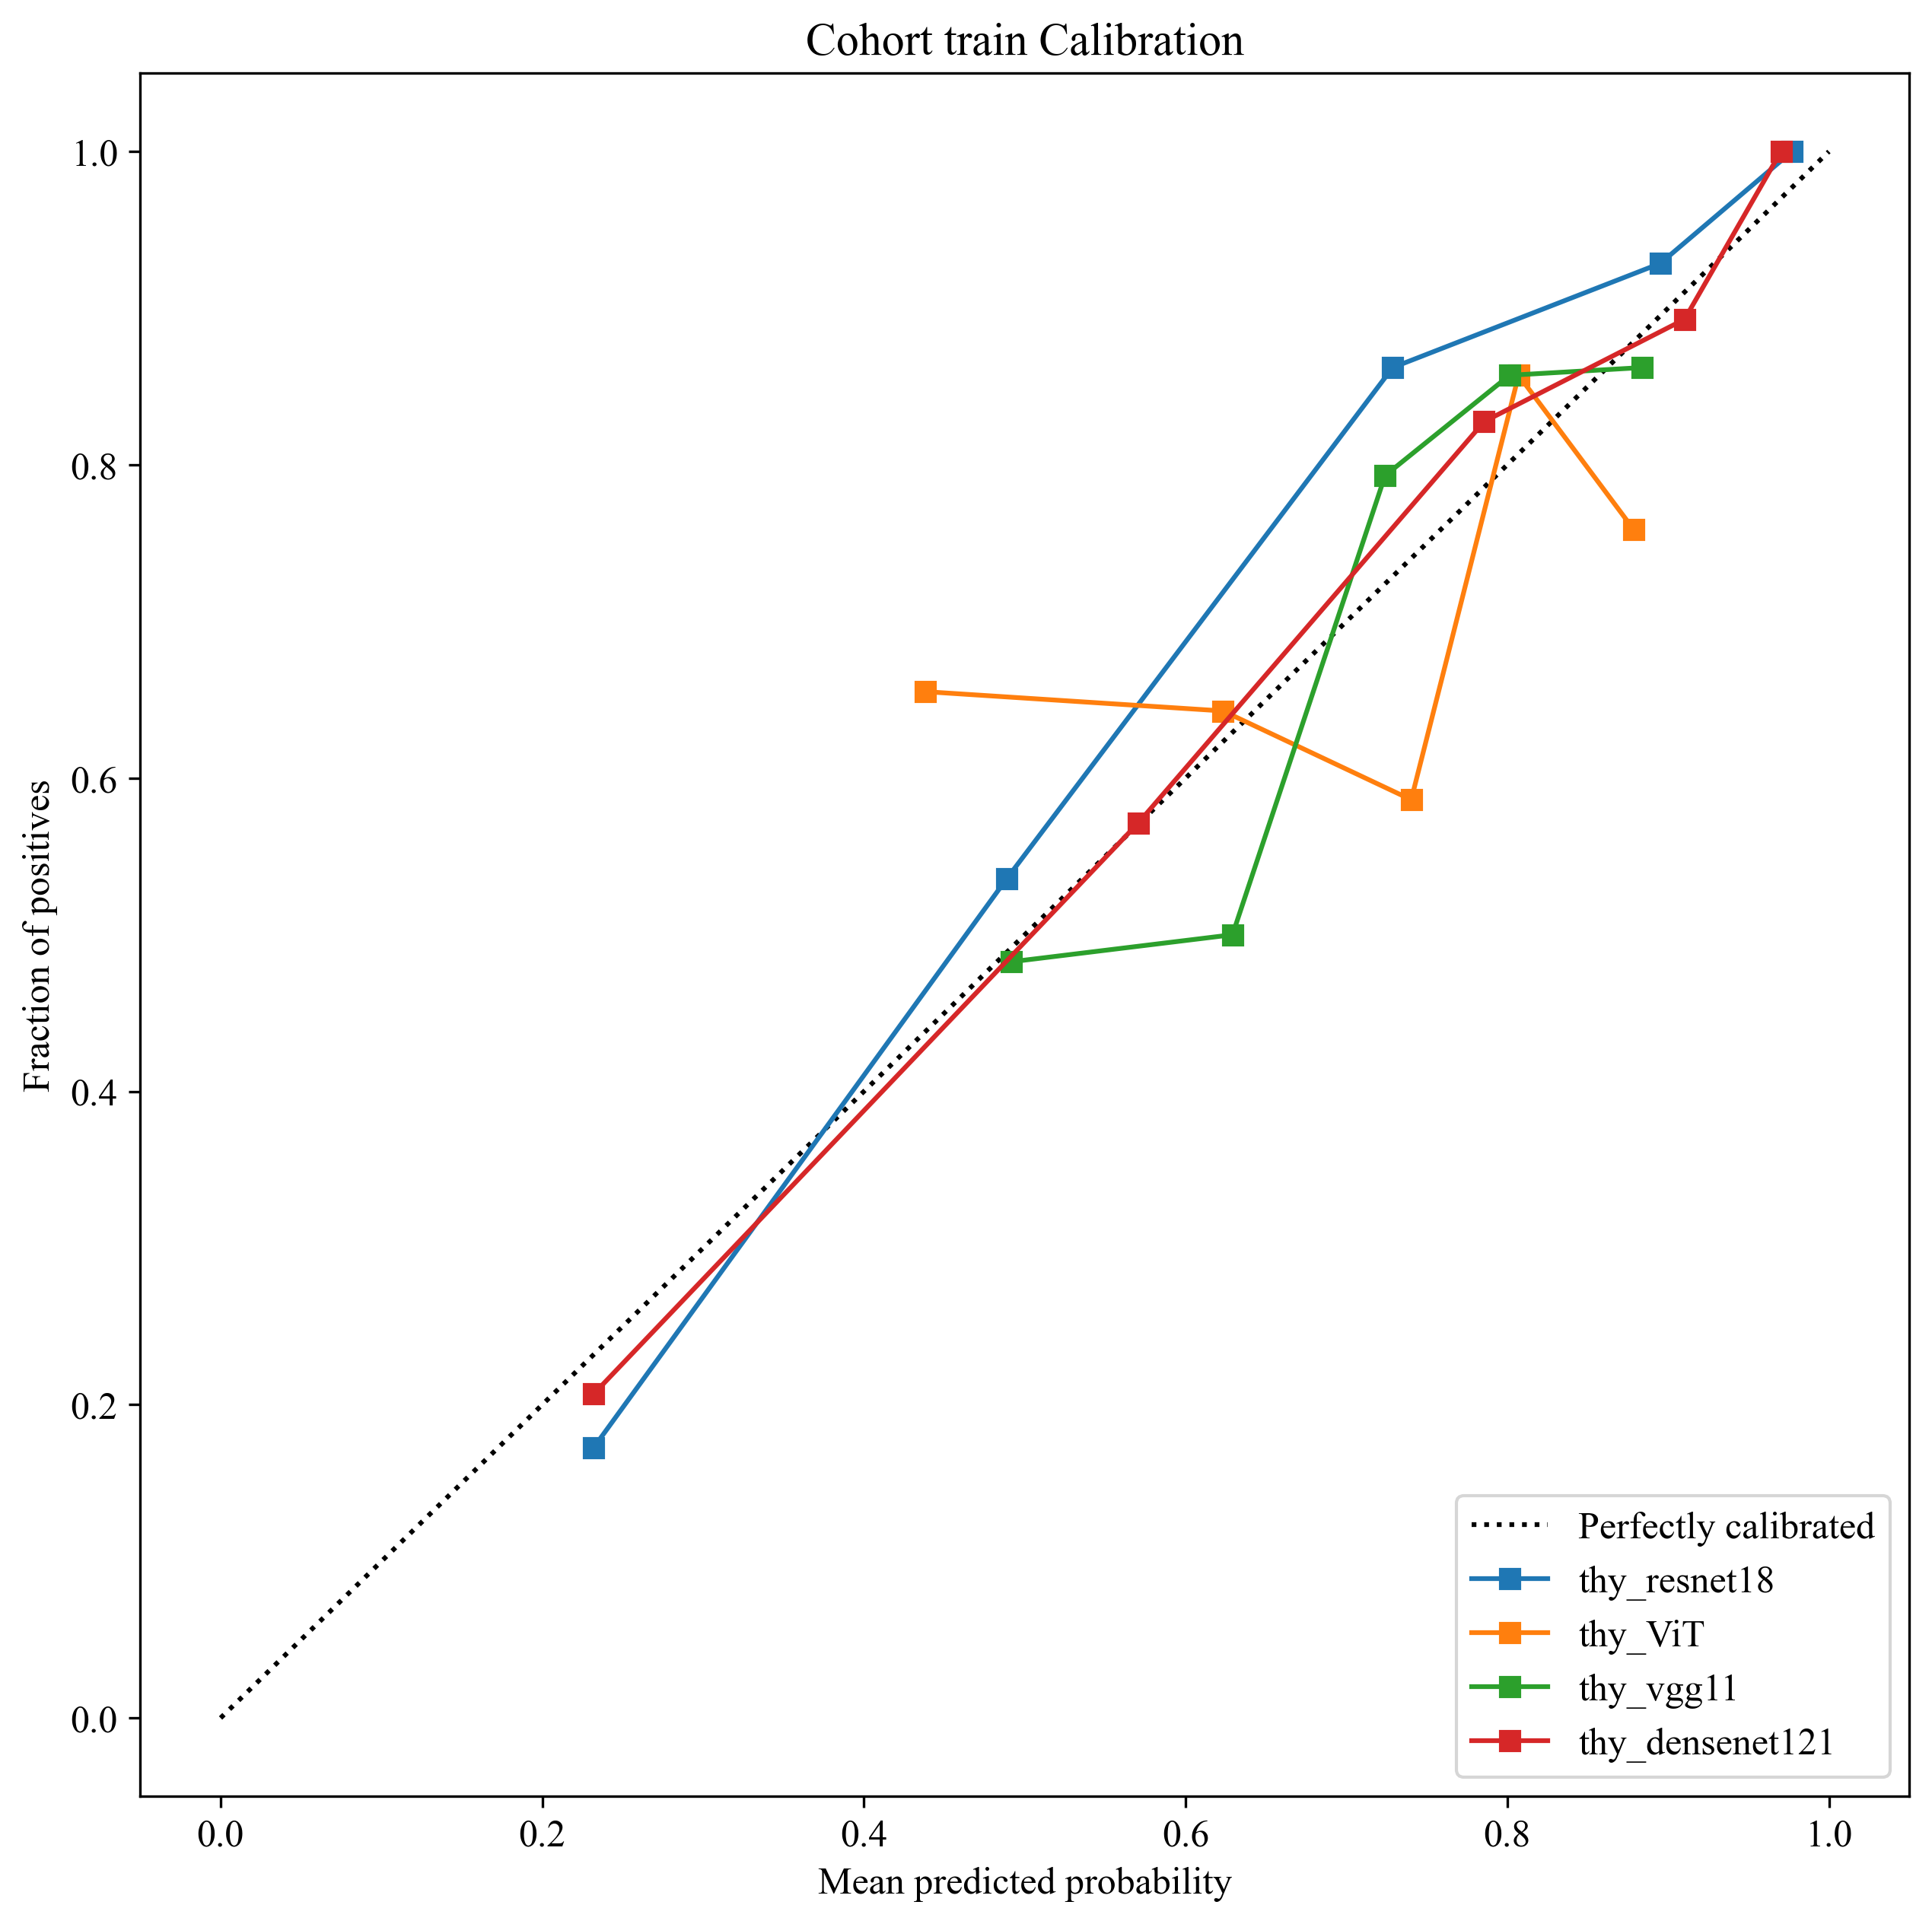

ID   -0_x  thy_resnet18   -0_y  thy_ViT   -0_x  thy_vgg11   -0_y  \
0   109.nii.gz  0.012         0.988  0.524    0.476  0.303      0.697  0.005   
1   147.nii.gz  0.339         0.661  0.297    0.703  0.326      0.674  0.725   
2   177.nii.gz  0.034         0.966  0.395    0.605  0.246      0.754  0.026   
3   143.nii.gz  0.154         0.846  0.571    0.429  0.195      0.805  0.121   
4   103.nii.gz  0.187         0.813  0.473    0.527  0.422      0.578  0.154   
..         ...    ...           ...    ...      ...    ...        ...    ...   
57  178.nii.gz  0.091         0.909  0.413    0.587  0.184      0.816  0.198   
58   67.nii.gz  0.125         0.875  0.501    0.499  0.285      0.715  0.154   
59   27.nii.gz  0.229         0.771  0.616    0.384  0.186      0.814  0.229   
60   46.nii.gz  0.960         0.040  0.515    0.485  0.572      0.428  0.952   
61   92.nii.gz  0.552         0.448  0.341    0.659  0.239      0.761  0.513   

    thy_densenet121 group  label  
0             0.995   val      1  
1             0.275   val      0  
2             0.974   val      1  
3             0.879   val      1  
4             0.846   val      1  
..              ...   ...    ...  
57            0.802   val      1  
58            0.846   val      1  
59            0.771   val      1  
60            0.048   val      0  
61            0.487   val      0  

[62 rows x 11 columns]

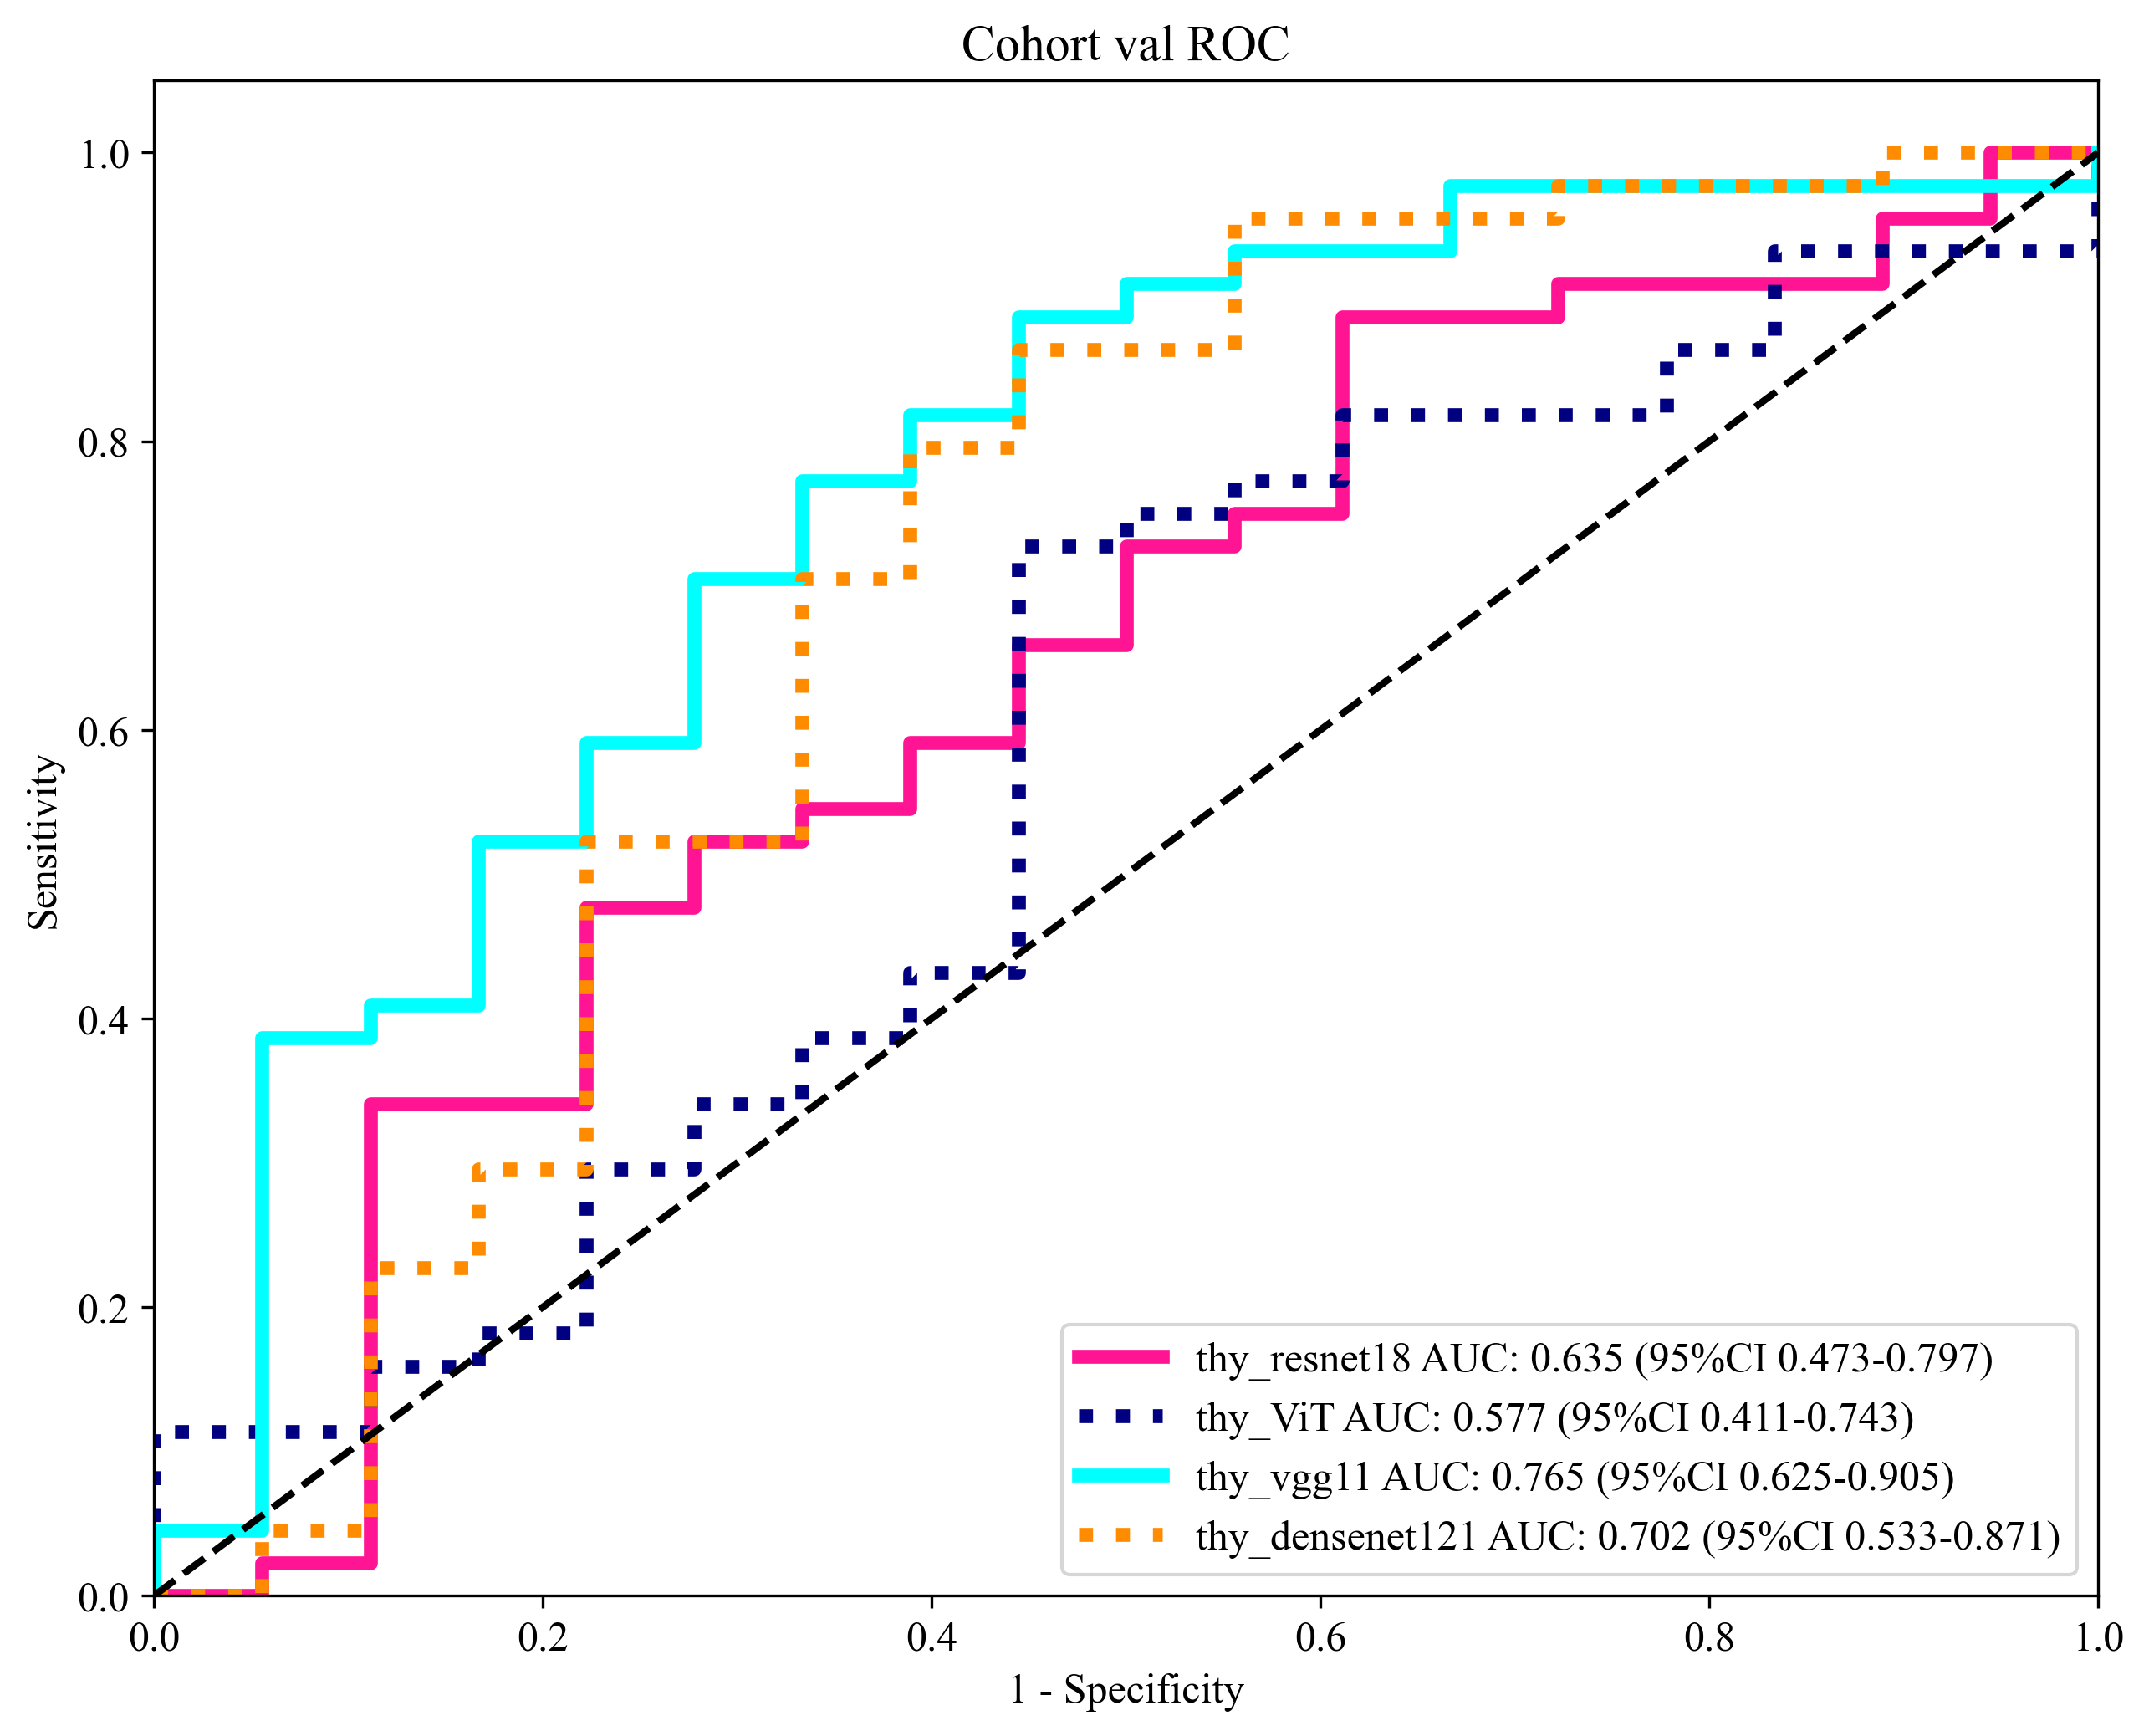

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0     thy_resnet18     0.832  0.903  0.8503 - 0.9553        0.800   
1          thy_ViT     0.559  0.588  0.4883 - 0.6879        0.480   
2        thy_vgg11     0.678  0.722  0.6296 - 0.8150        0.630   
3  thy_densenet121     0.860  0.880  0.8185 - 0.9420        0.890   
4     thy_resnet18     0.742  0.635  0.4733 - 0.7969        0.886   
5          thy_ViT     0.677  0.577  0.4106 - 0.7435        0.727   
6        thy_vgg11     0.790  0.765  0.6250 - 0.9053        0.886   
7  thy_densenet121     0.774  0.702  0.5334 - 0.8706        0.864   

   Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0        0.907  0.952  0.661      0.952   0.800  0.870      0.635  train  
1        0.744  0.814  0.381      0.814   0.480  0.604      0.773  train  
2        0.791  0.875  0.479      0.875   0.630  0.733      0.721  train  
3        0.791  0.908  0.756      0.908   0.890  0.899      0.607  train  
4        0.389  0.780  0.583      0.780   0.886  0.830      0.537    val  
5        0.556  0.800  0.455      0.800   0.727  0.762      0.538    val  
6        0.556  0.830  0.667      0.830   0.886  0.857      0.570    val  
7        0.556  0.826  0.625      0.826   0.864  0.844      0.541    val

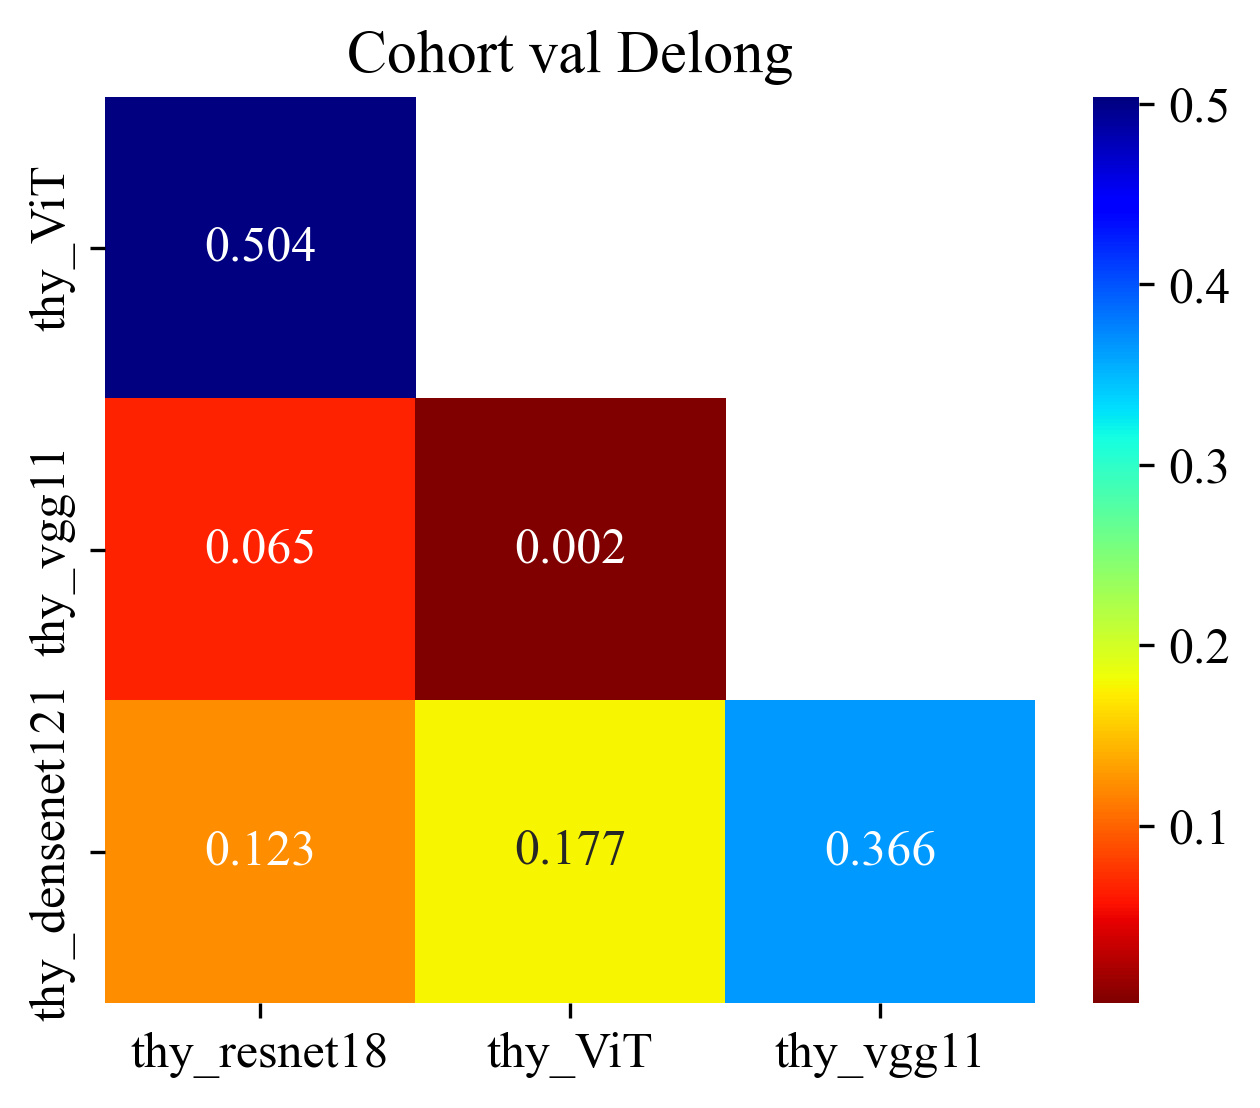

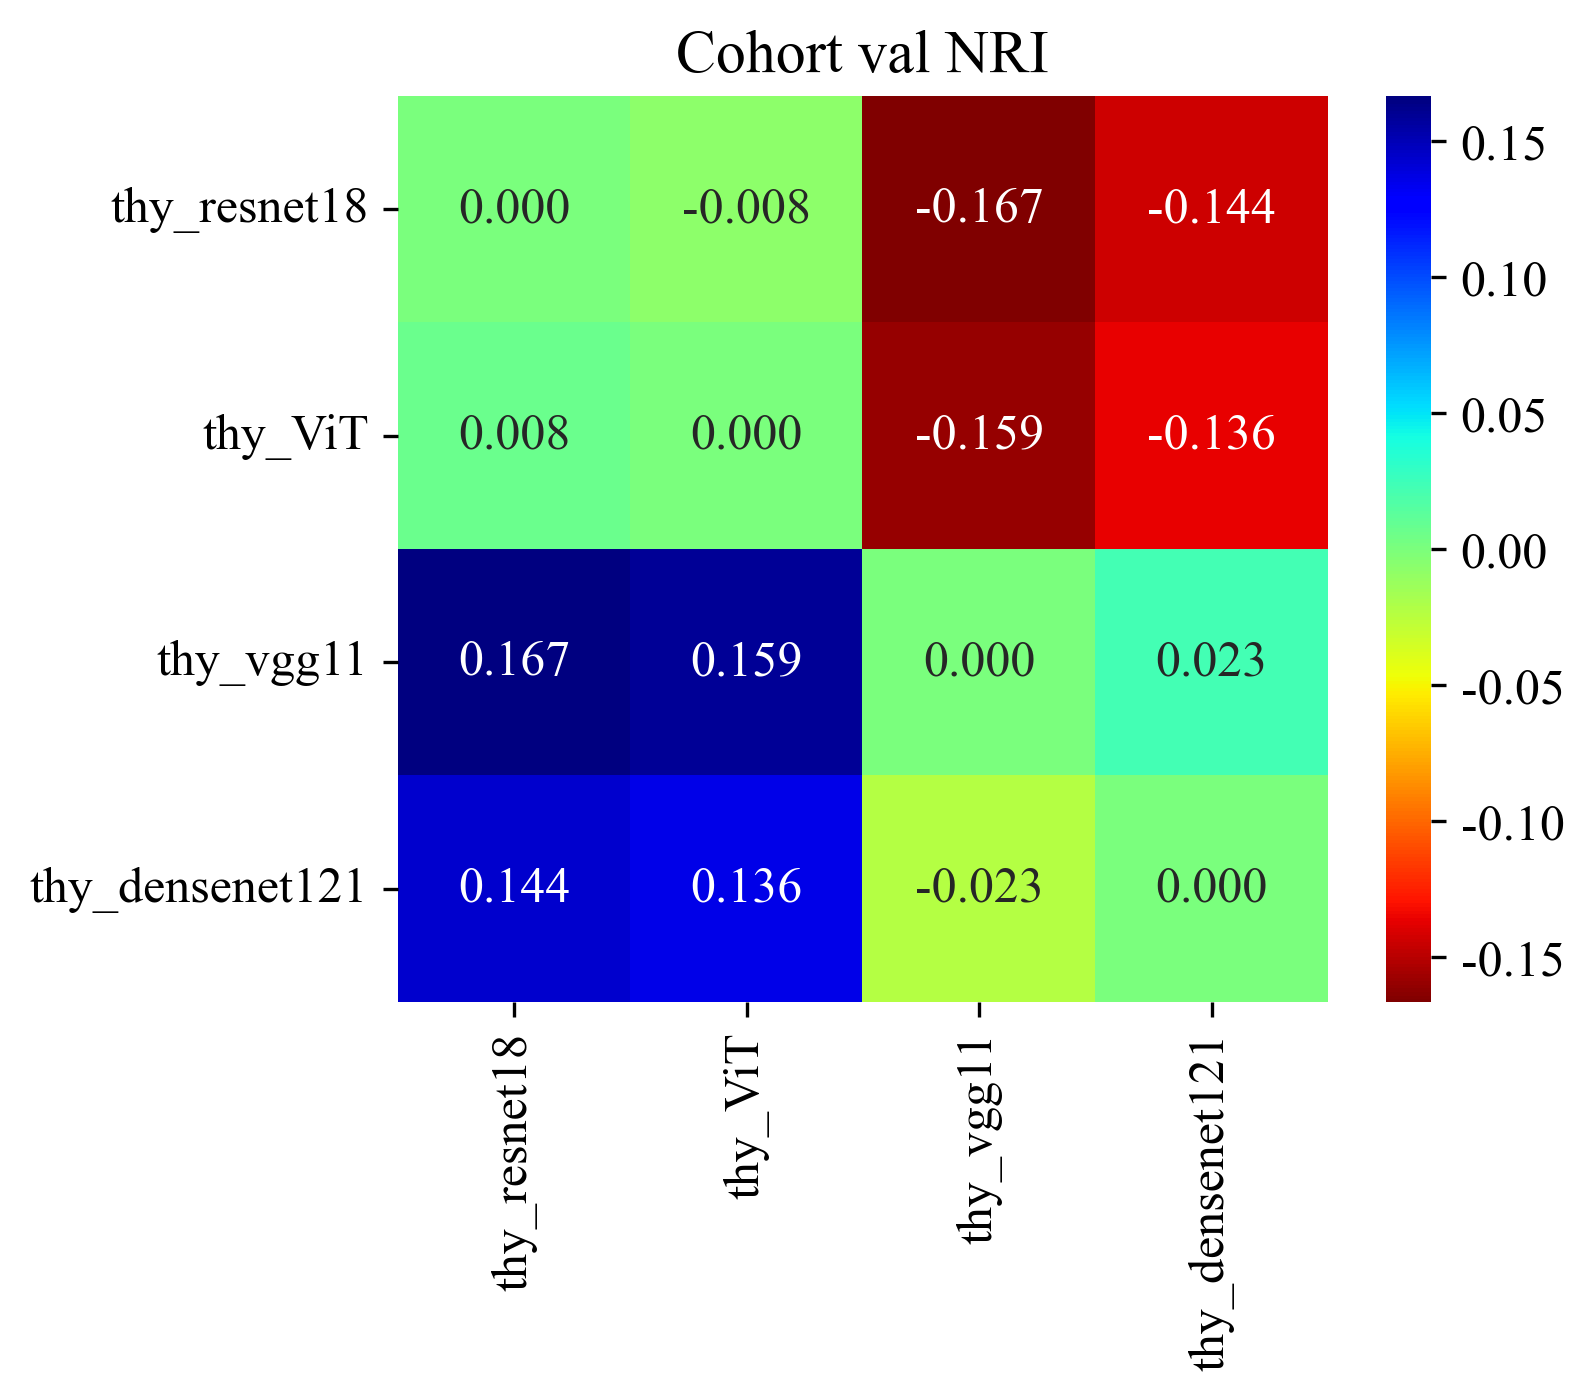

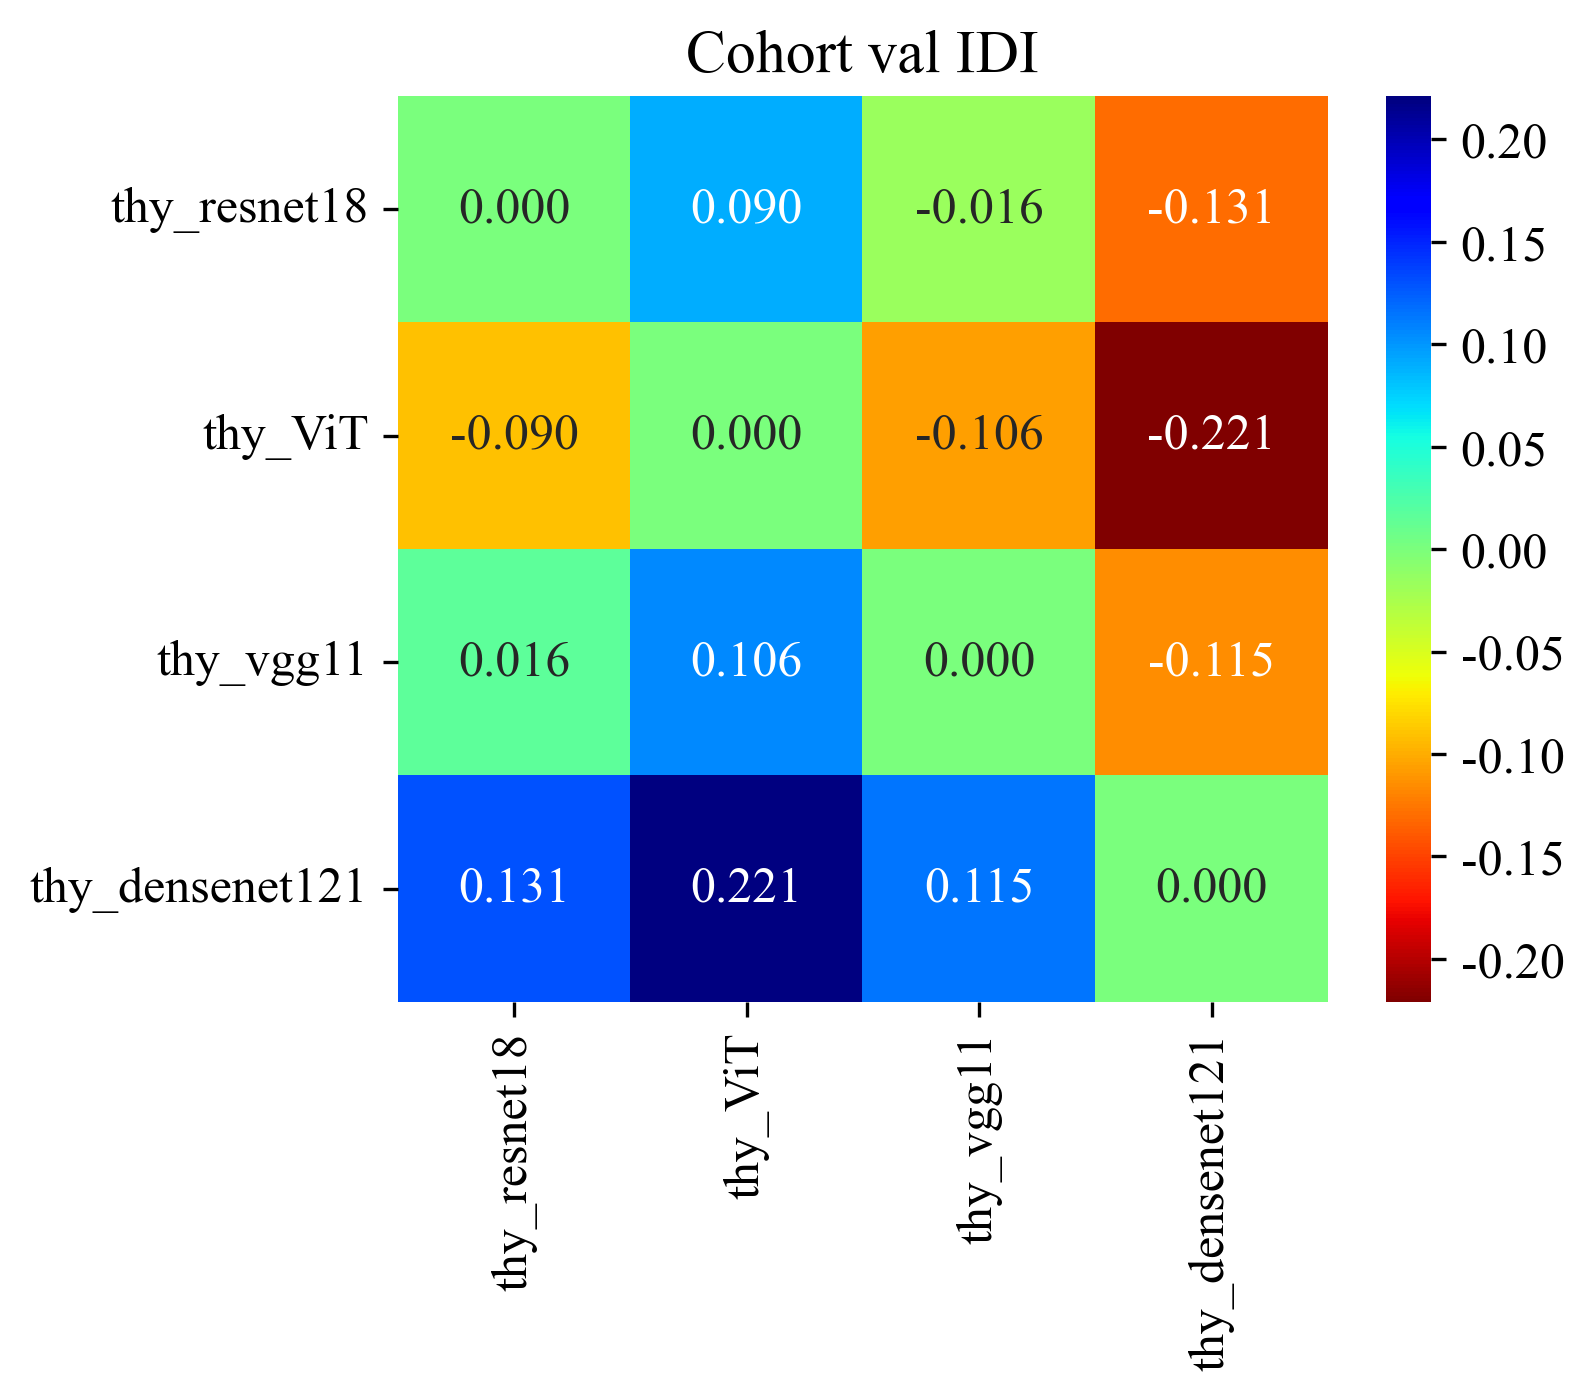

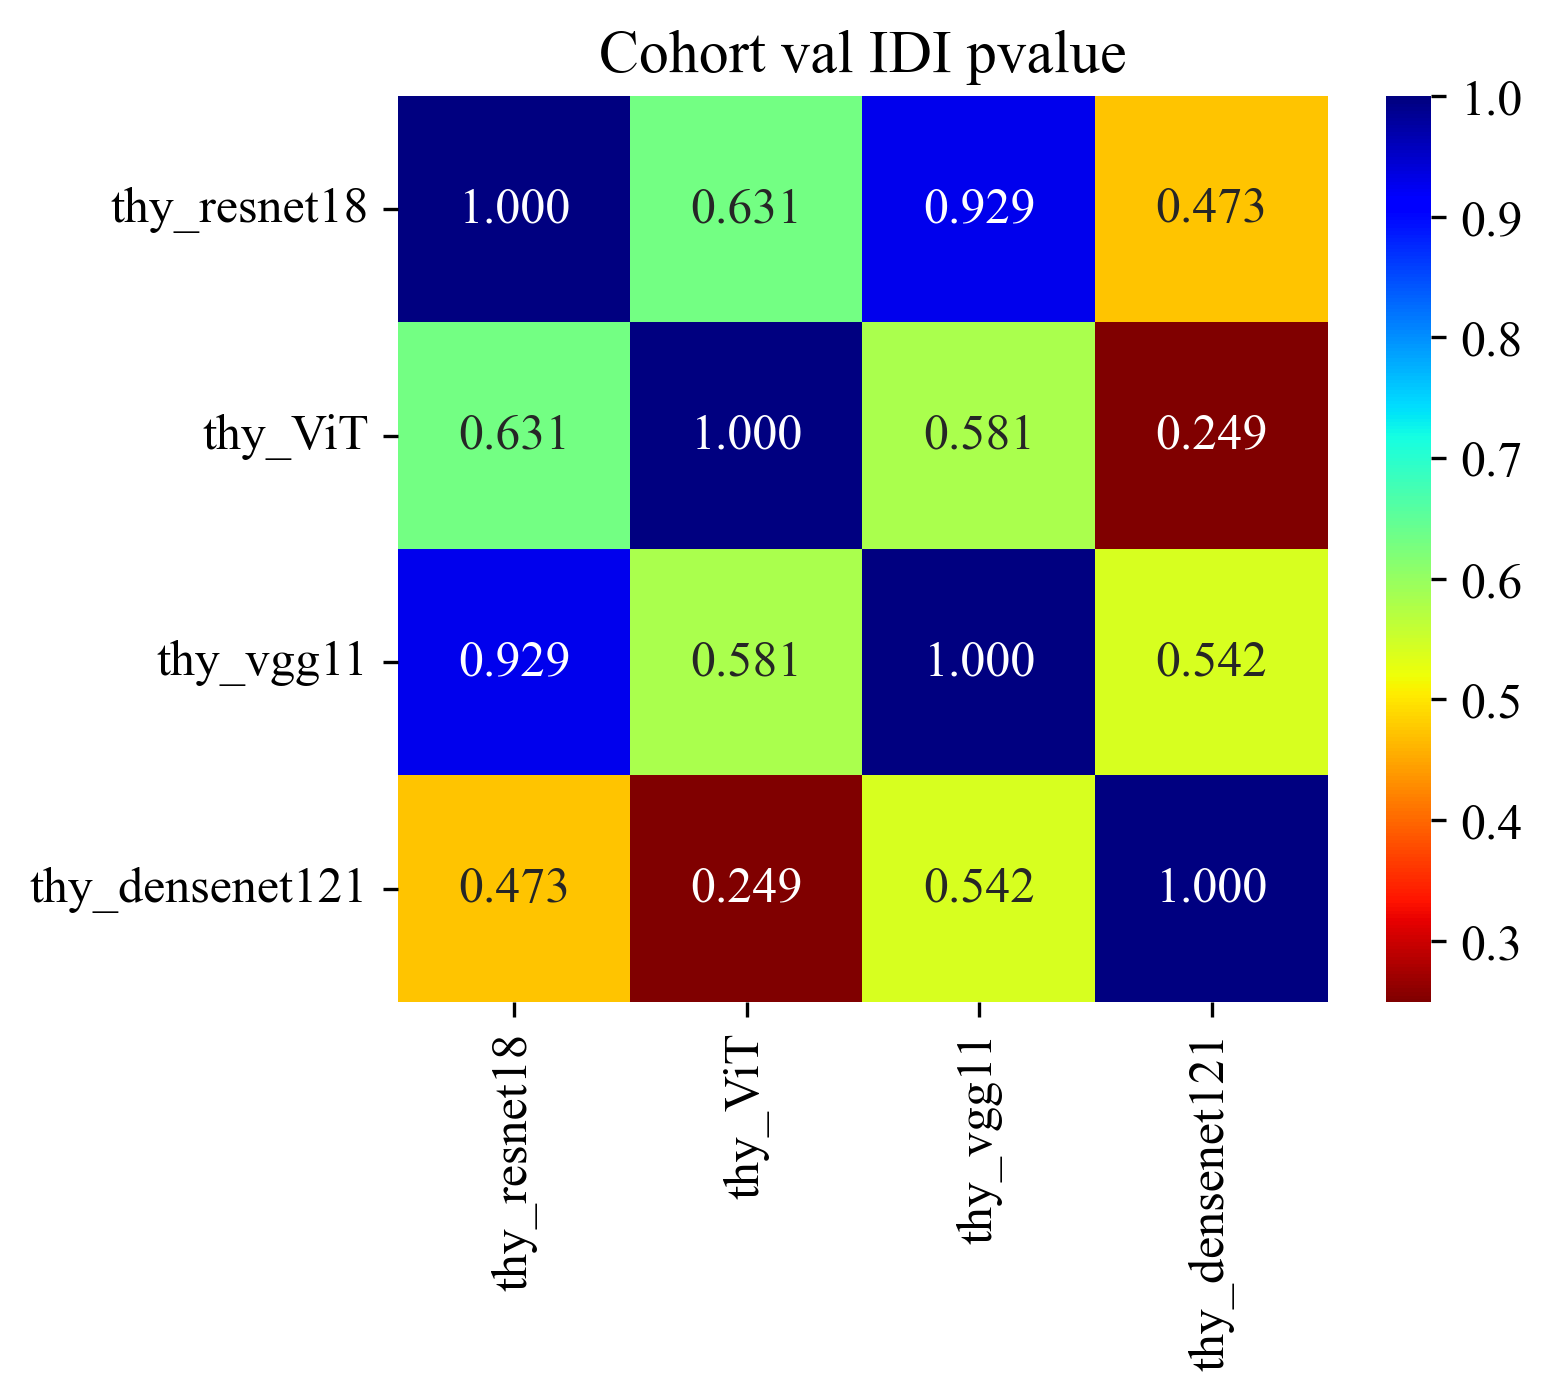

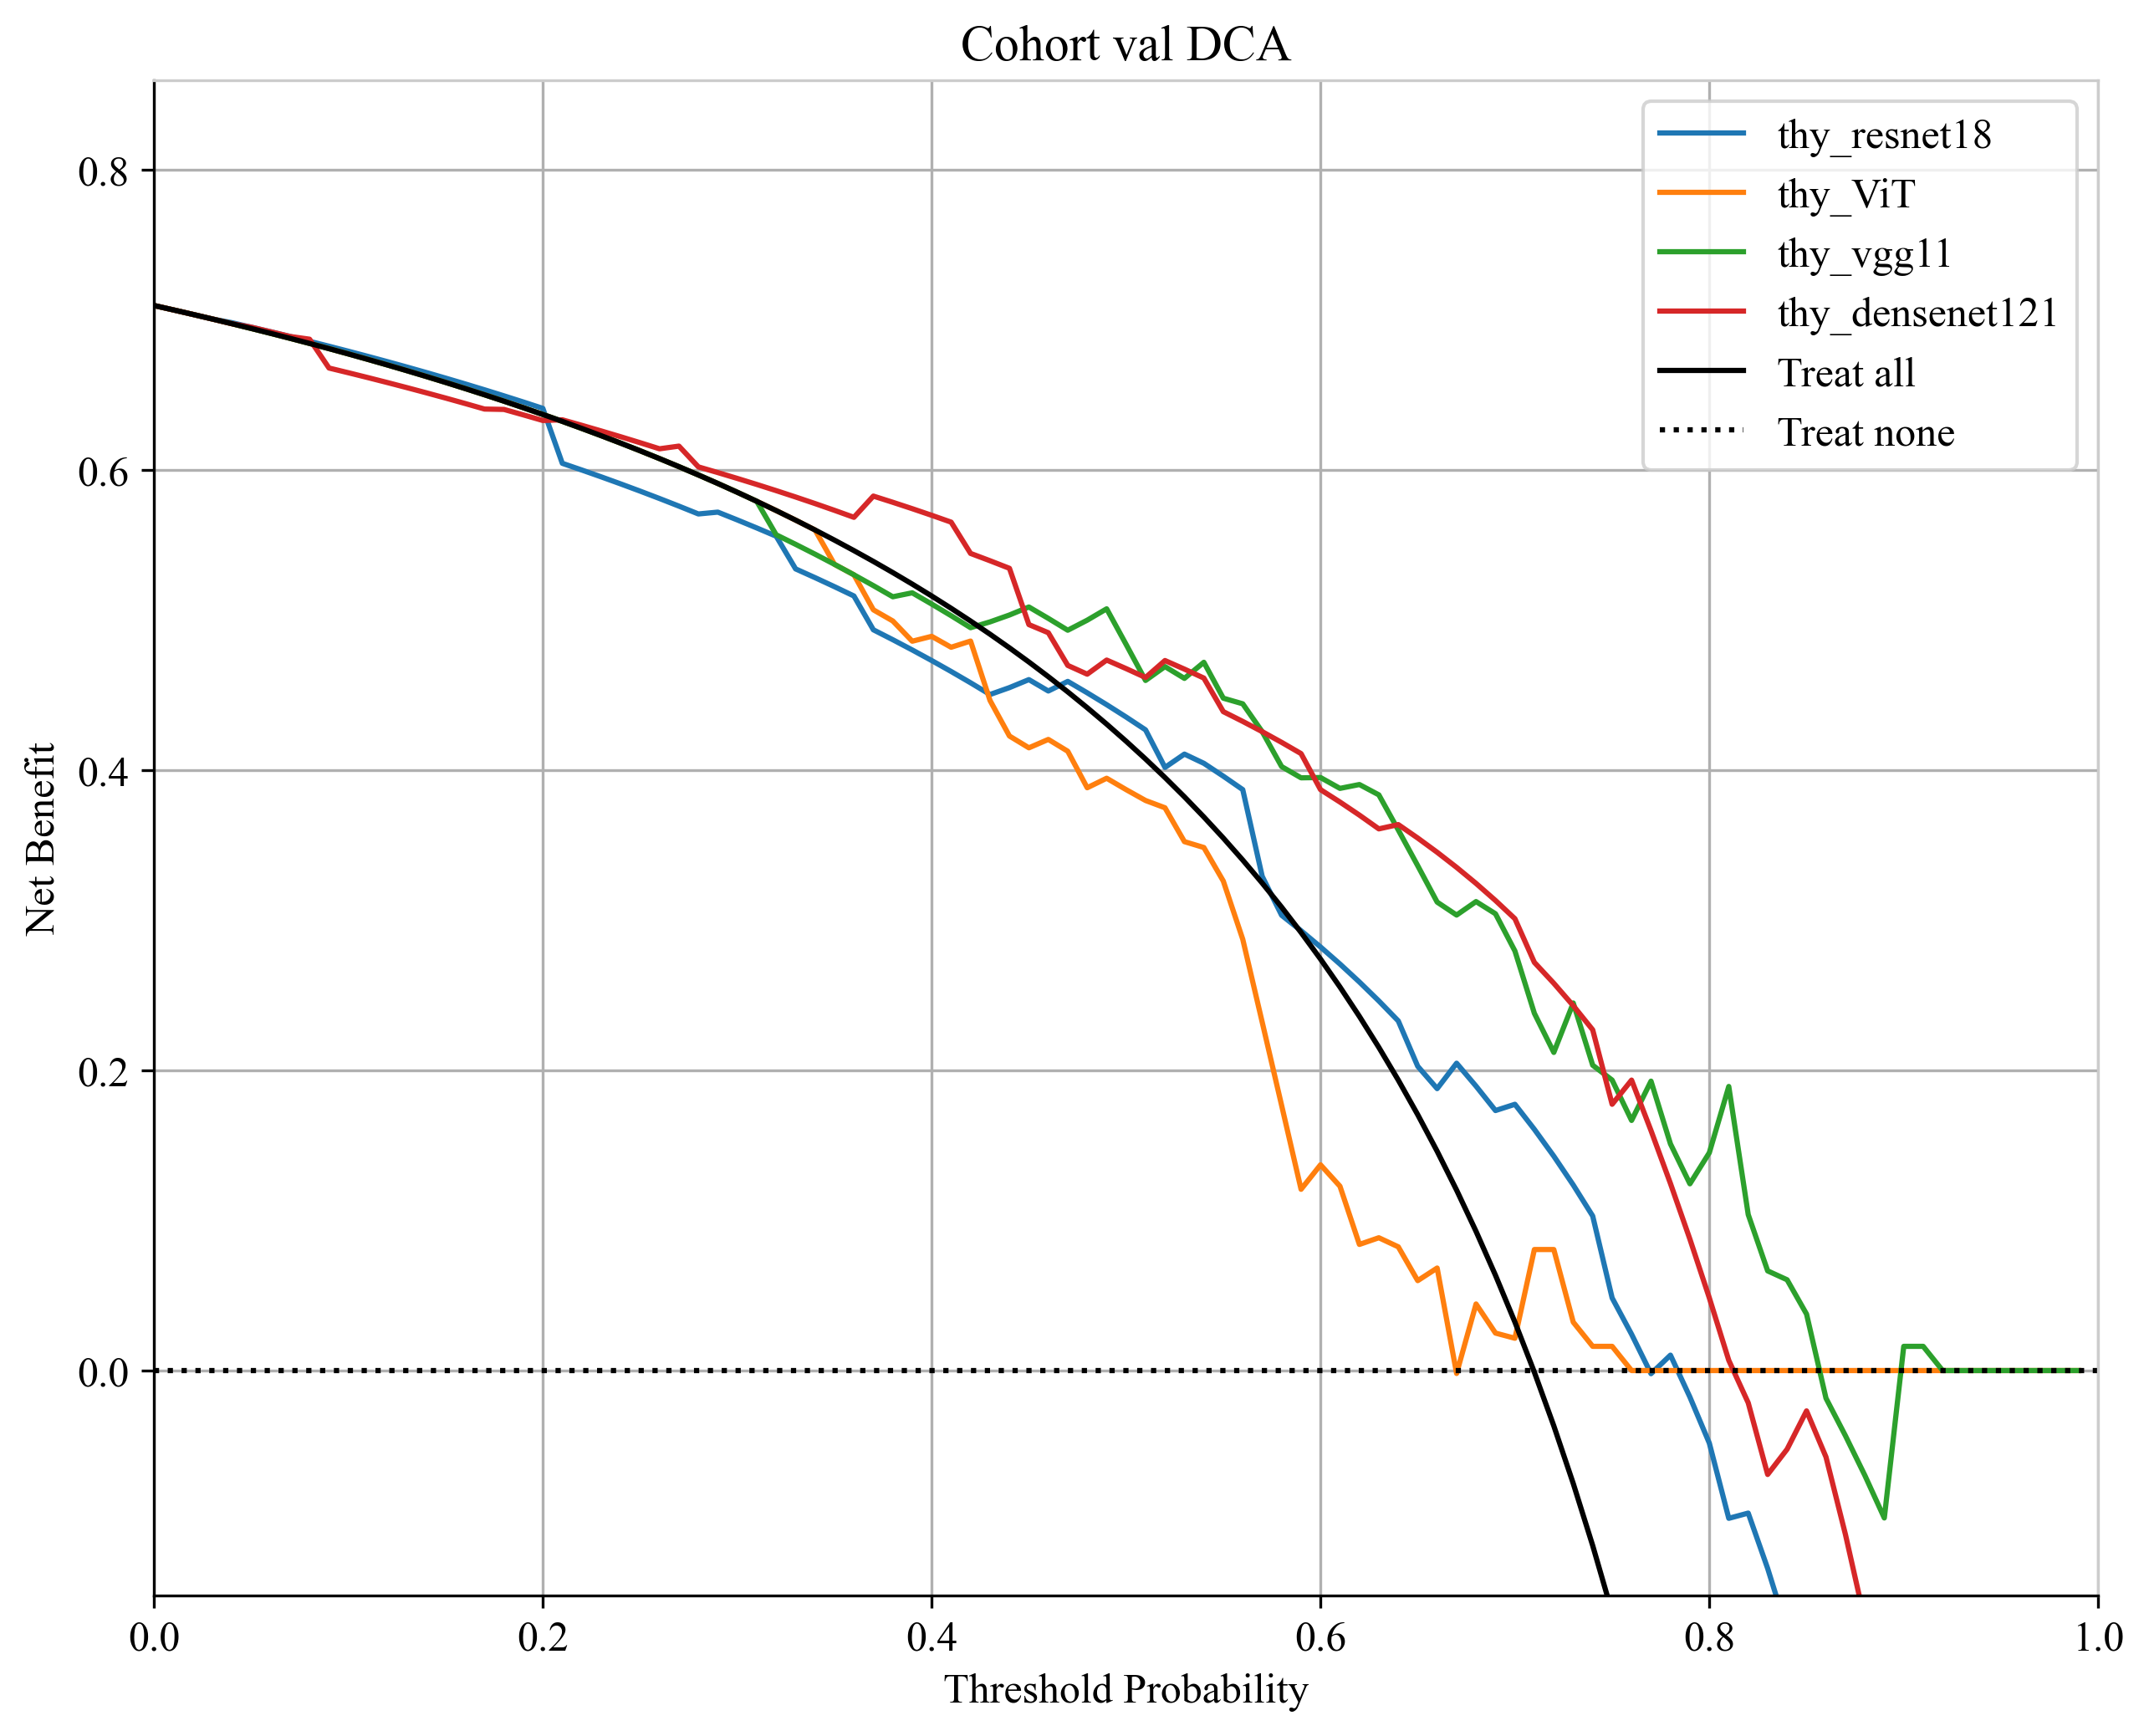

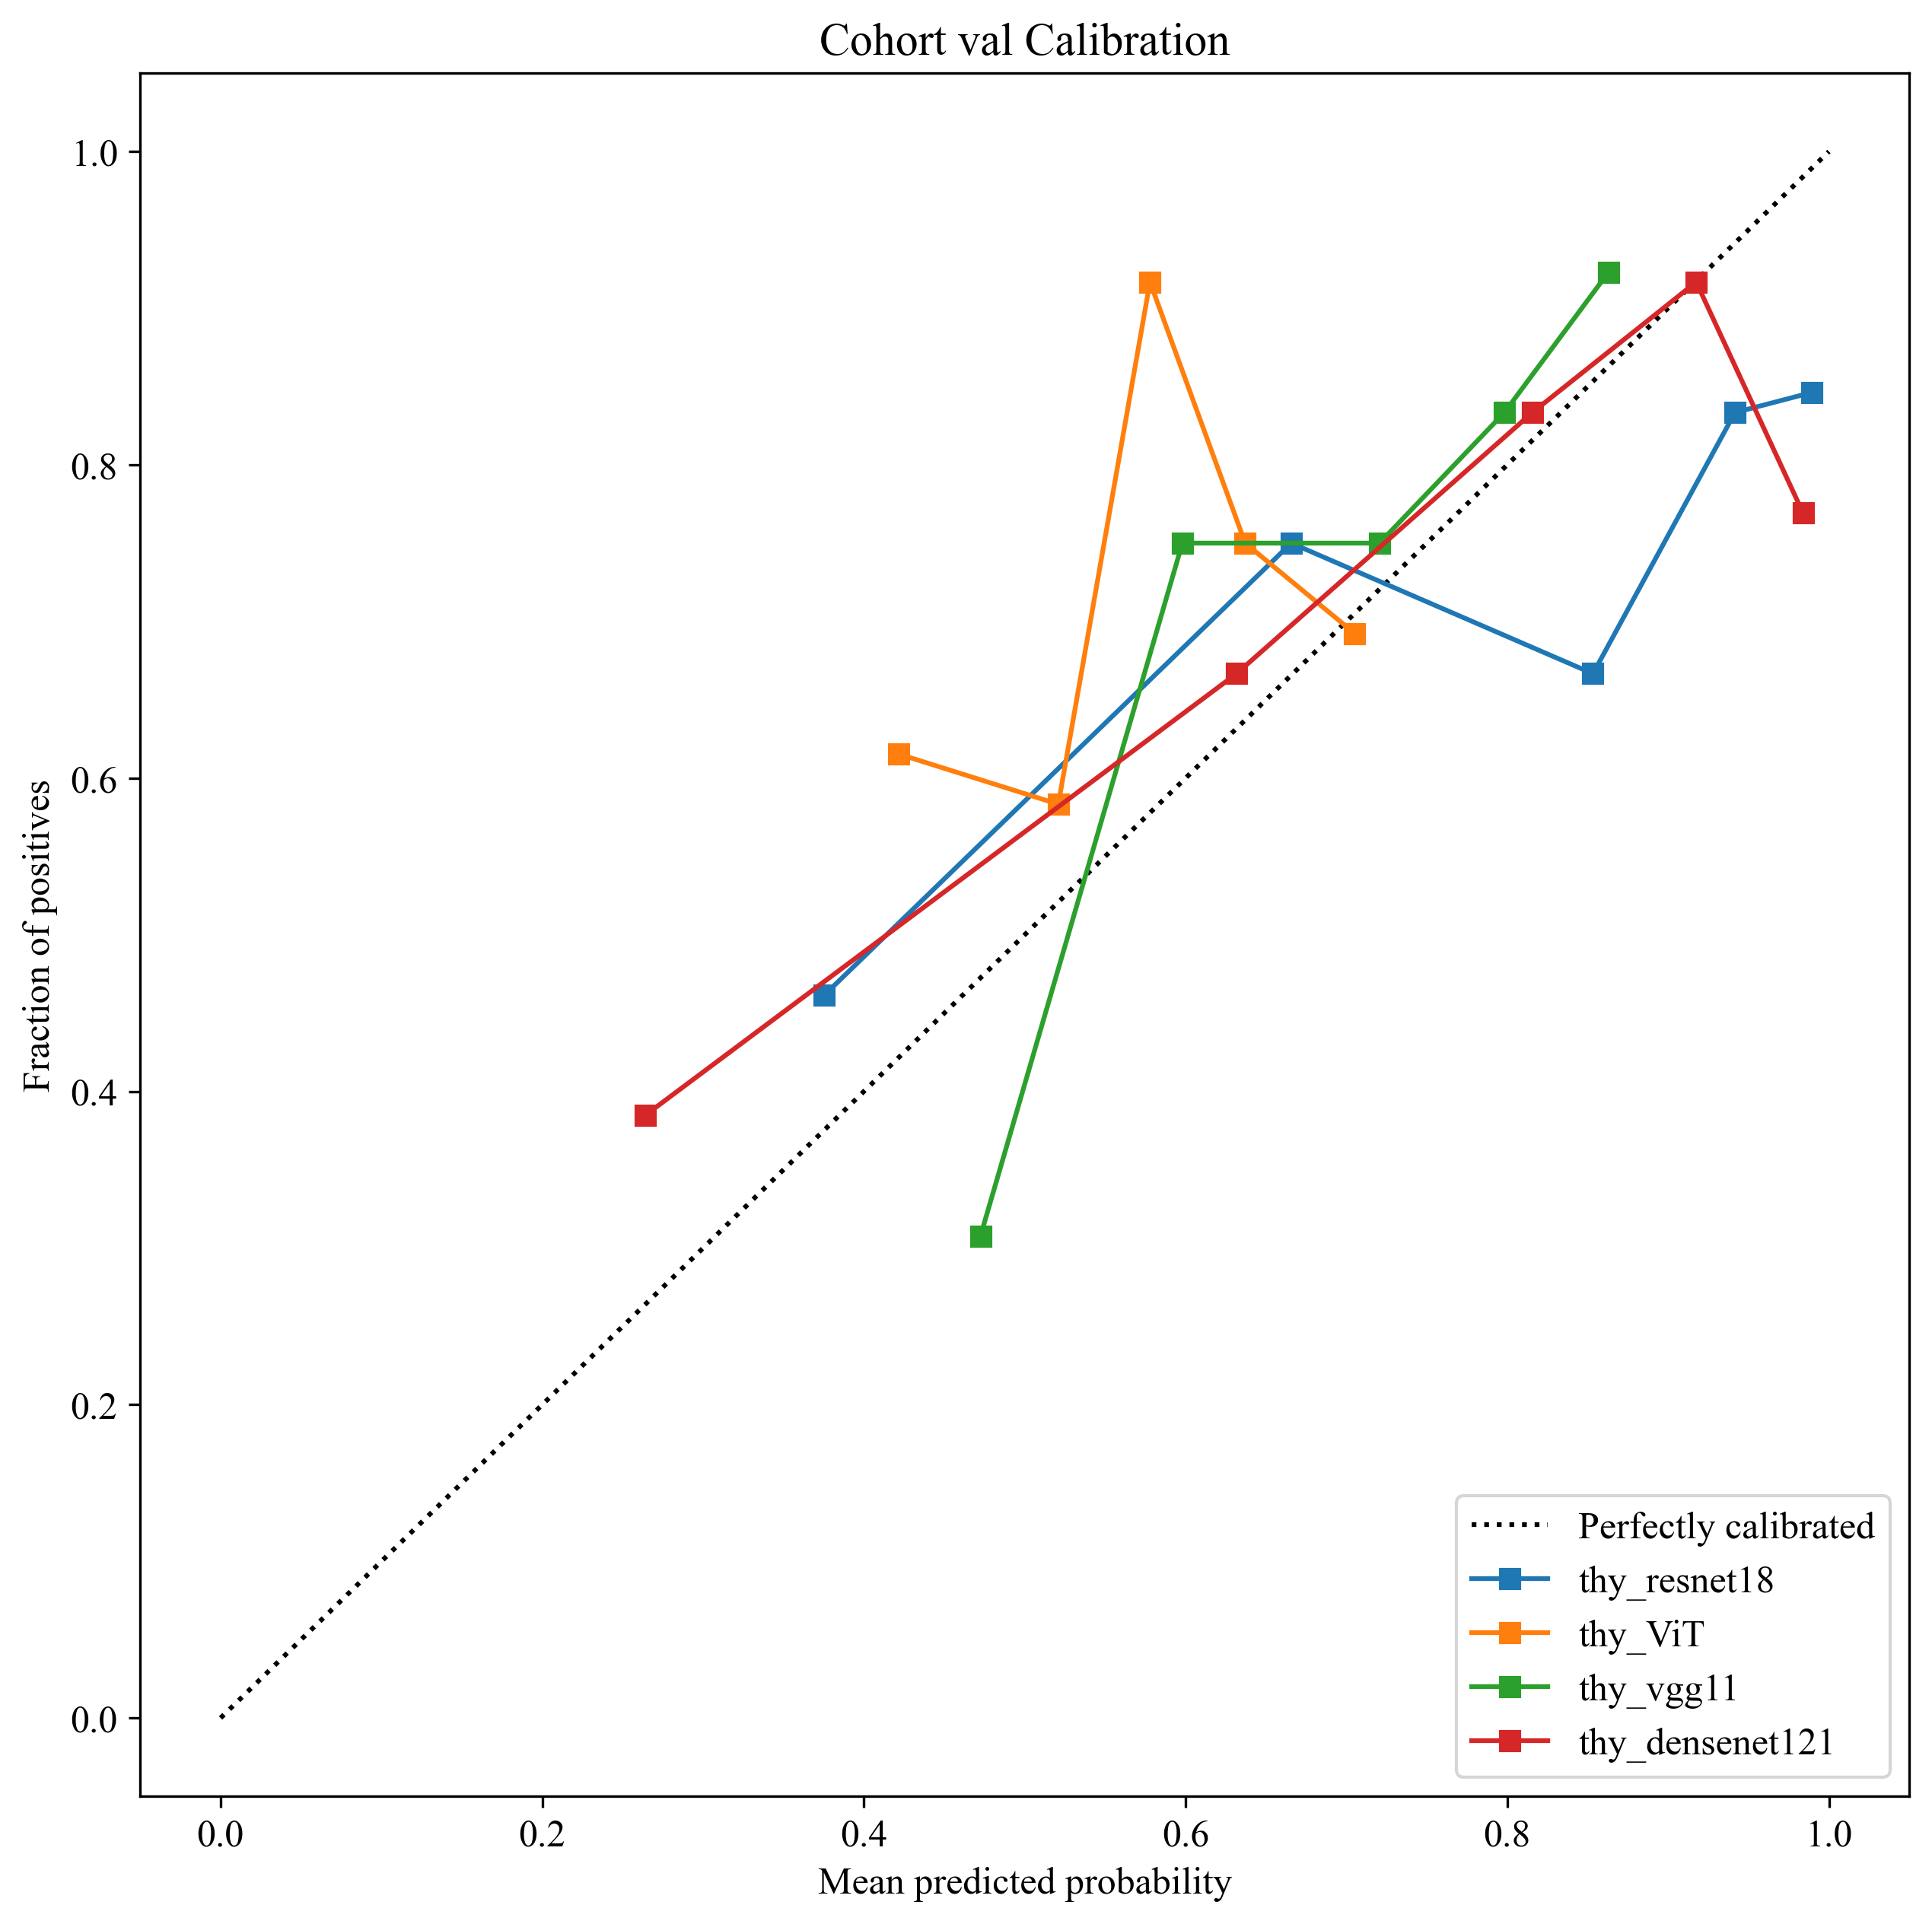

ID   -0_x  thy_resnet18   -0_y  thy_ViT   -0_x  thy_vgg11   -0_y  \
0   296.nii.gz  0.050         0.950  0.317    0.683  0.197      0.803  0.058   
1   276.nii.gz  0.459         0.541  0.579    0.421  0.325      0.675  0.232   
2   333.nii.gz  0.067         0.933  0.265    0.735  0.166      0.834  0.124   
3   270.nii.gz  0.169         0.831  0.327    0.673  0.218      0.782  0.283   
4   253.nii.gz  0.634         0.366  0.474    0.526  0.422      0.578  0.780   
..         ...    ...           ...    ...      ...    ...        ...    ...   
78  285.nii.gz  0.292         0.708  0.513    0.487  0.380      0.620  0.121   
79  327.nii.gz  0.107         0.893  0.323    0.677  0.123      0.877  0.282   
80  329.nii.gz  0.066         0.934  0.485    0.515  0.344      0.656  0.168   
81  277.nii.gz  0.468         0.532  0.479    0.521  0.453      0.547  0.335   
82  320.nii.gz  0.384         0.616  0.355    0.645  0.324      0.676  0.245   

    thy_densenet121  group  label  
0             0.942  test1      1  
1             0.768  test1      1  
2             0.876  test1      0  
3             0.717  test1      0  
4             0.220  test1      0  
..              ...    ...    ...  
78            0.879  test1      1  
79            0.718  test1      1  
80            0.832  test1      0  
81            0.665  test1      1  
82            0.755  test1      1  

[83 rows x 11 columns]

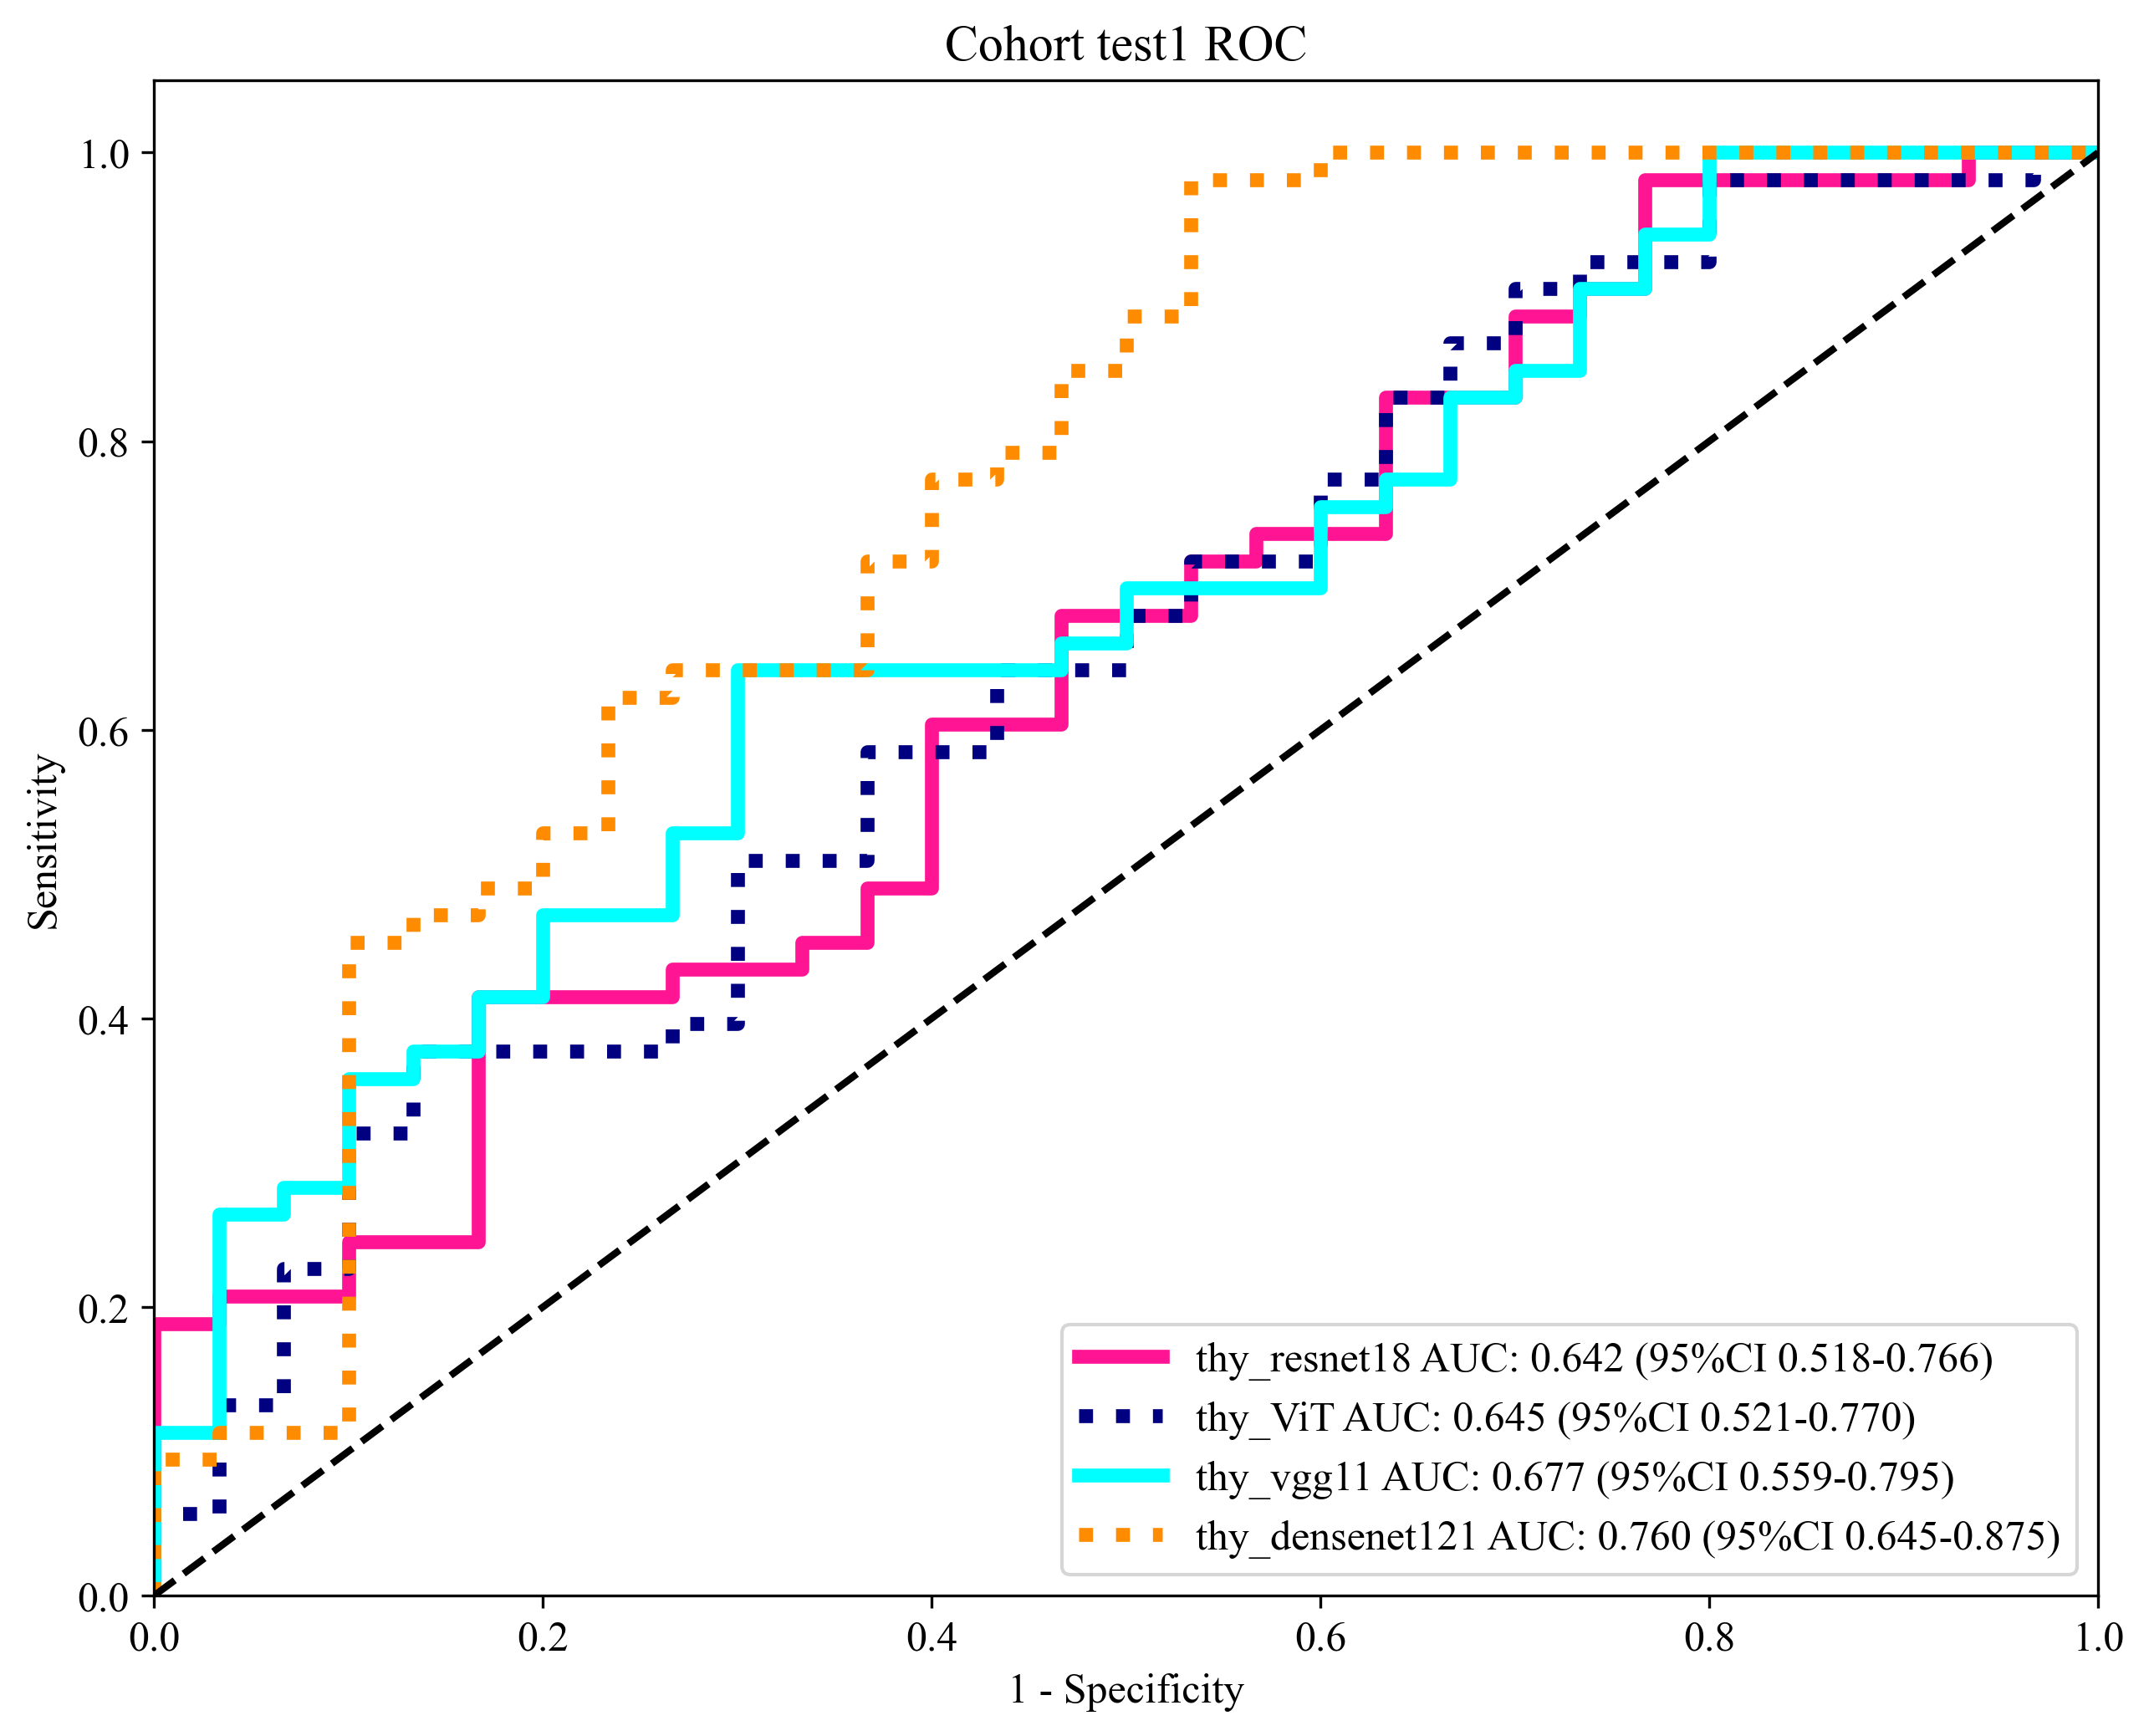

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0      thy_resnet18     0.832  0.903  0.8503 - 0.9553        0.800   
1           thy_ViT     0.559  0.588  0.4883 - 0.6879        0.480   
2         thy_vgg11     0.678  0.722  0.6296 - 0.8150        0.630   
3   thy_densenet121     0.860  0.880  0.8185 - 0.9420        0.890   
4      thy_resnet18     0.742  0.635  0.4733 - 0.7969        0.886   
5           thy_ViT     0.677  0.577  0.4106 - 0.7435        0.727   
6         thy_vgg11     0.790  0.765  0.6250 - 0.9053        0.886   
7   thy_densenet121     0.774  0.702  0.5334 - 0.8706        0.864   
8      thy_resnet18     0.566  0.642  0.5181 - 0.7662        0.415   
9           thy_ViT     0.554  0.645  0.5209 - 0.7697        0.377   
10        thy_vgg11     0.663  0.677  0.5586 - 0.7948        0.642   
11  thy_densenet121     0.795  0.760  0.6445 - 0.8750        0.981   

    Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0         0.907  0.952  0.661      0.952   0.800  0.870      0.635  train  
1         0.744  0.814  0.381      0.814   0.480  0.604      0.773  train  
2         0.791  0.875  0.479      0.875   0.630  0.733      0.721  train  
3         0.791  0.908  0.756      0.908   0.890  0.899      0.607  train  
4         0.389  0.780  0.583      0.780   0.886  0.830      0.537    val  
5         0.556  0.800  0.455      0.800   0.727  0.762      0.538    val  
6         0.556  0.830  0.667      0.830   0.886  0.857      0.570    val  
7         0.556  0.826  0.625      0.826   0.864  0.844      0.541    val  
8         0.833  0.815  0.446      0.815   0.415  0.550      0.934  test1  
9         0.867  0.833  0.441      0.833   0.377  0.519      0.677  test1  
10        0.700  0.791  0.525      0.791   0.642  0.708      0.796  test1  
11        0.467  0.765  0.933      0.765   0.981  0.860      0.613  test1

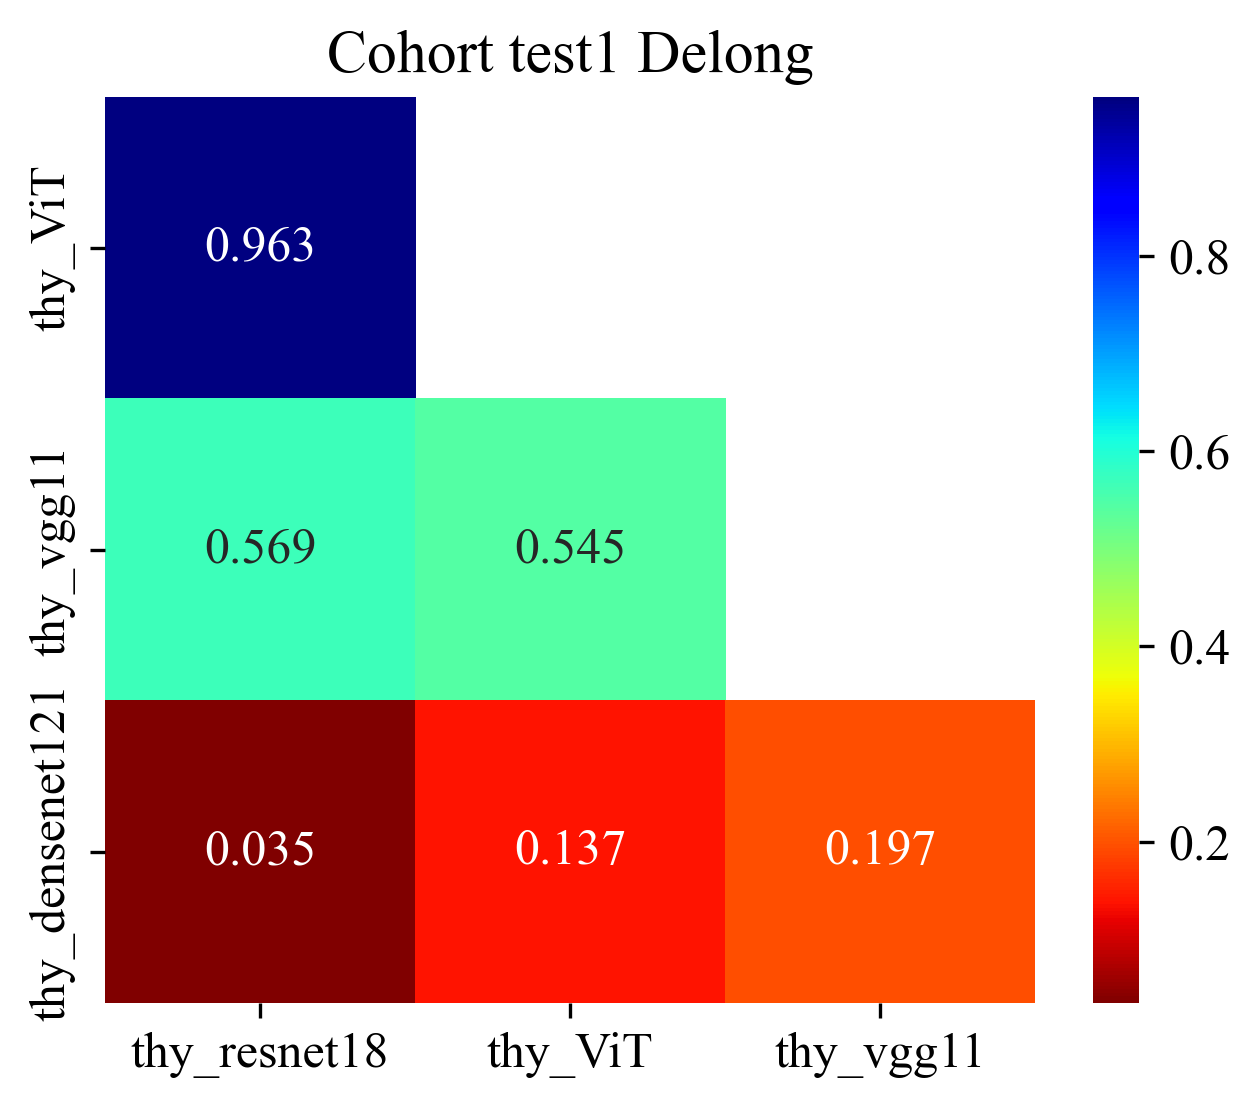

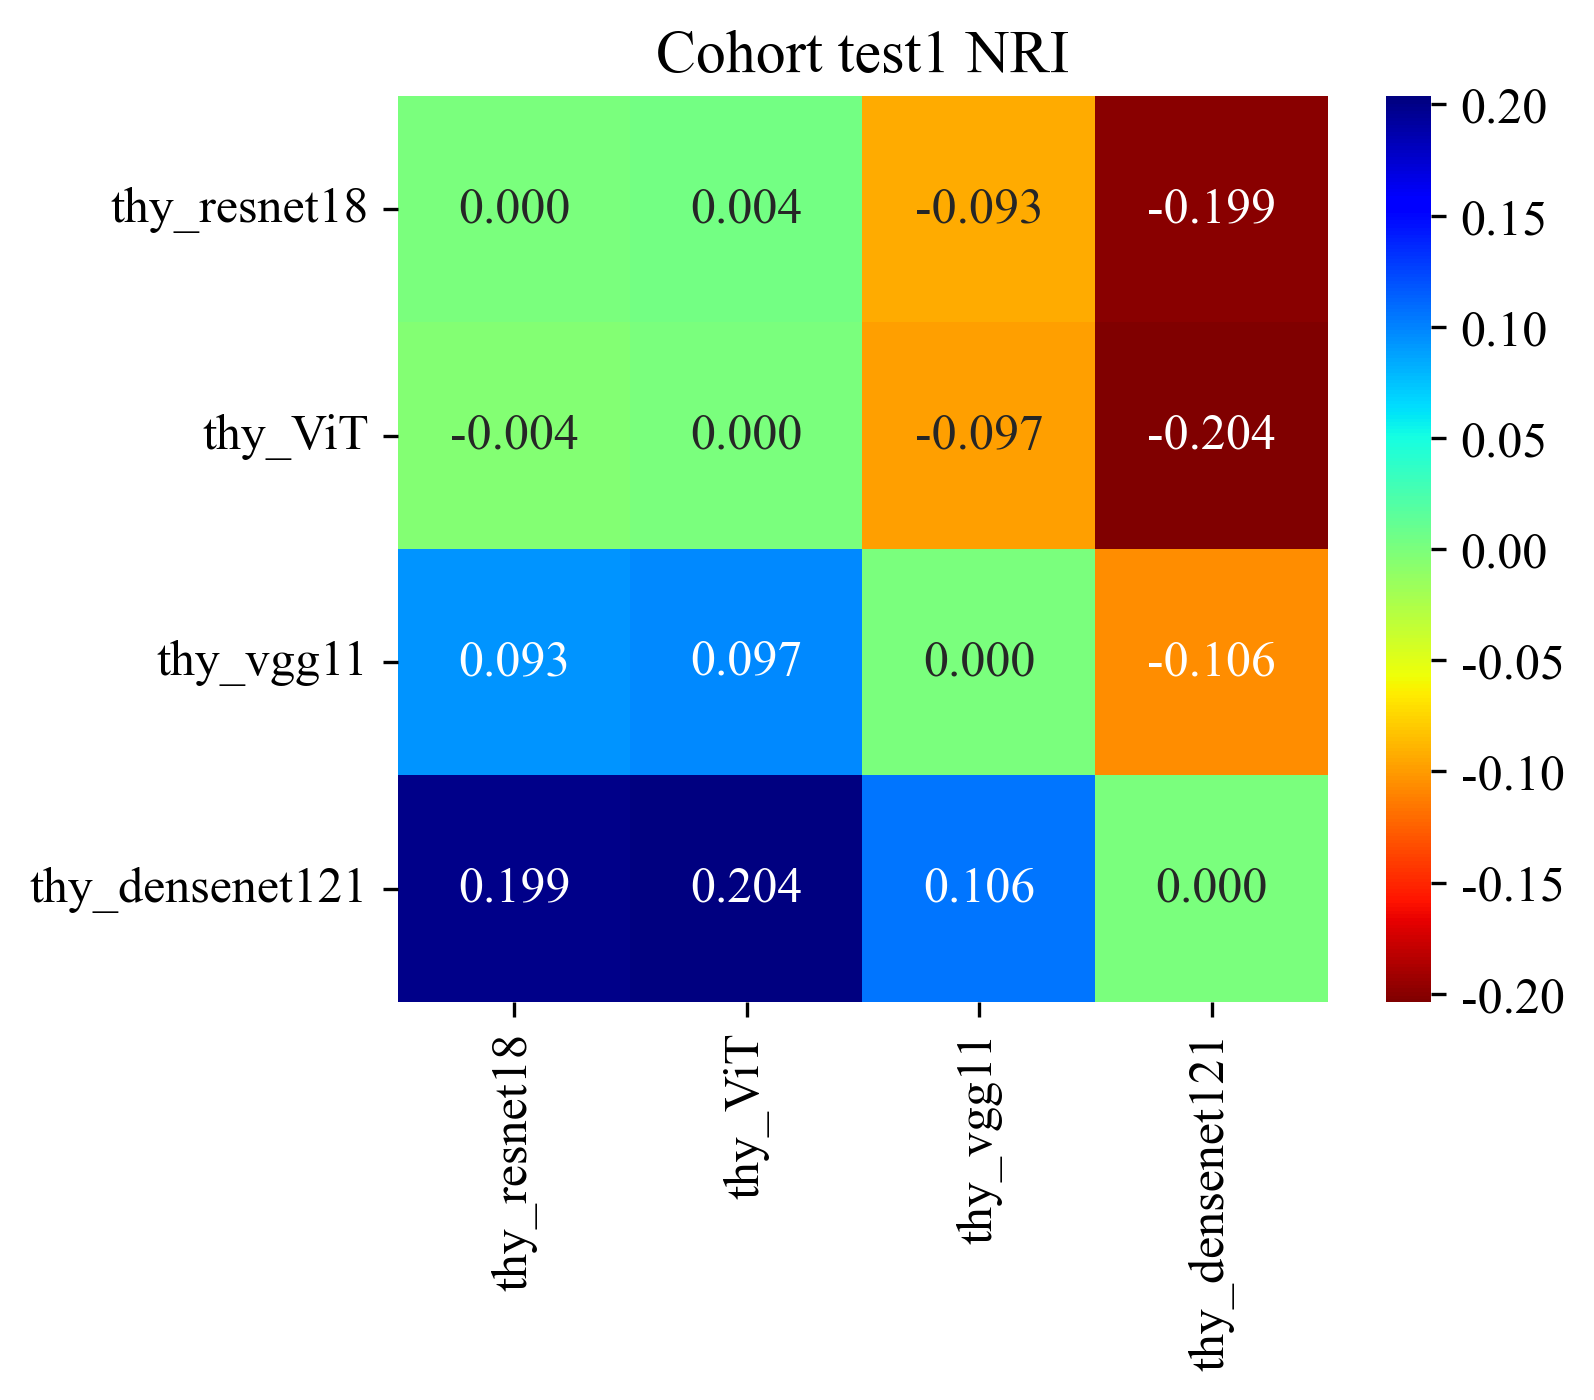

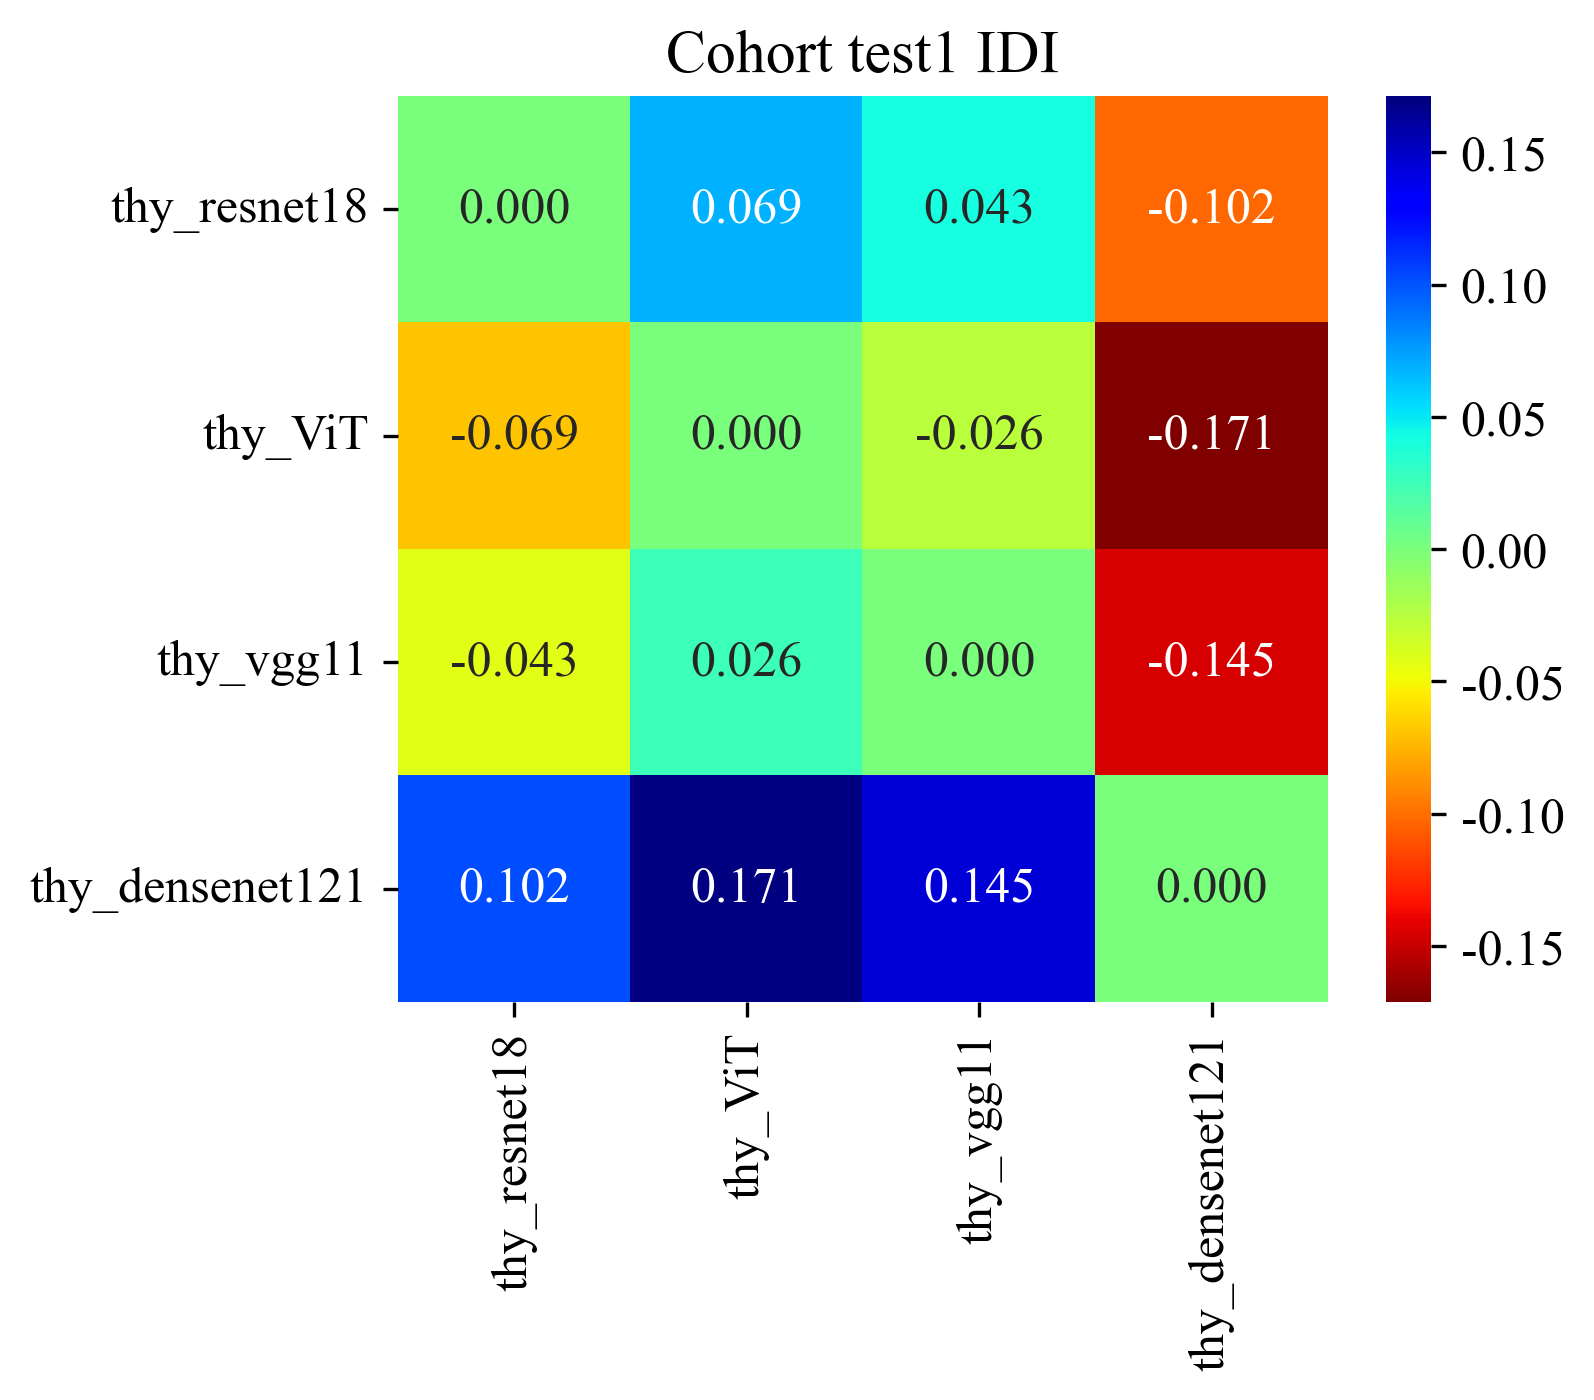

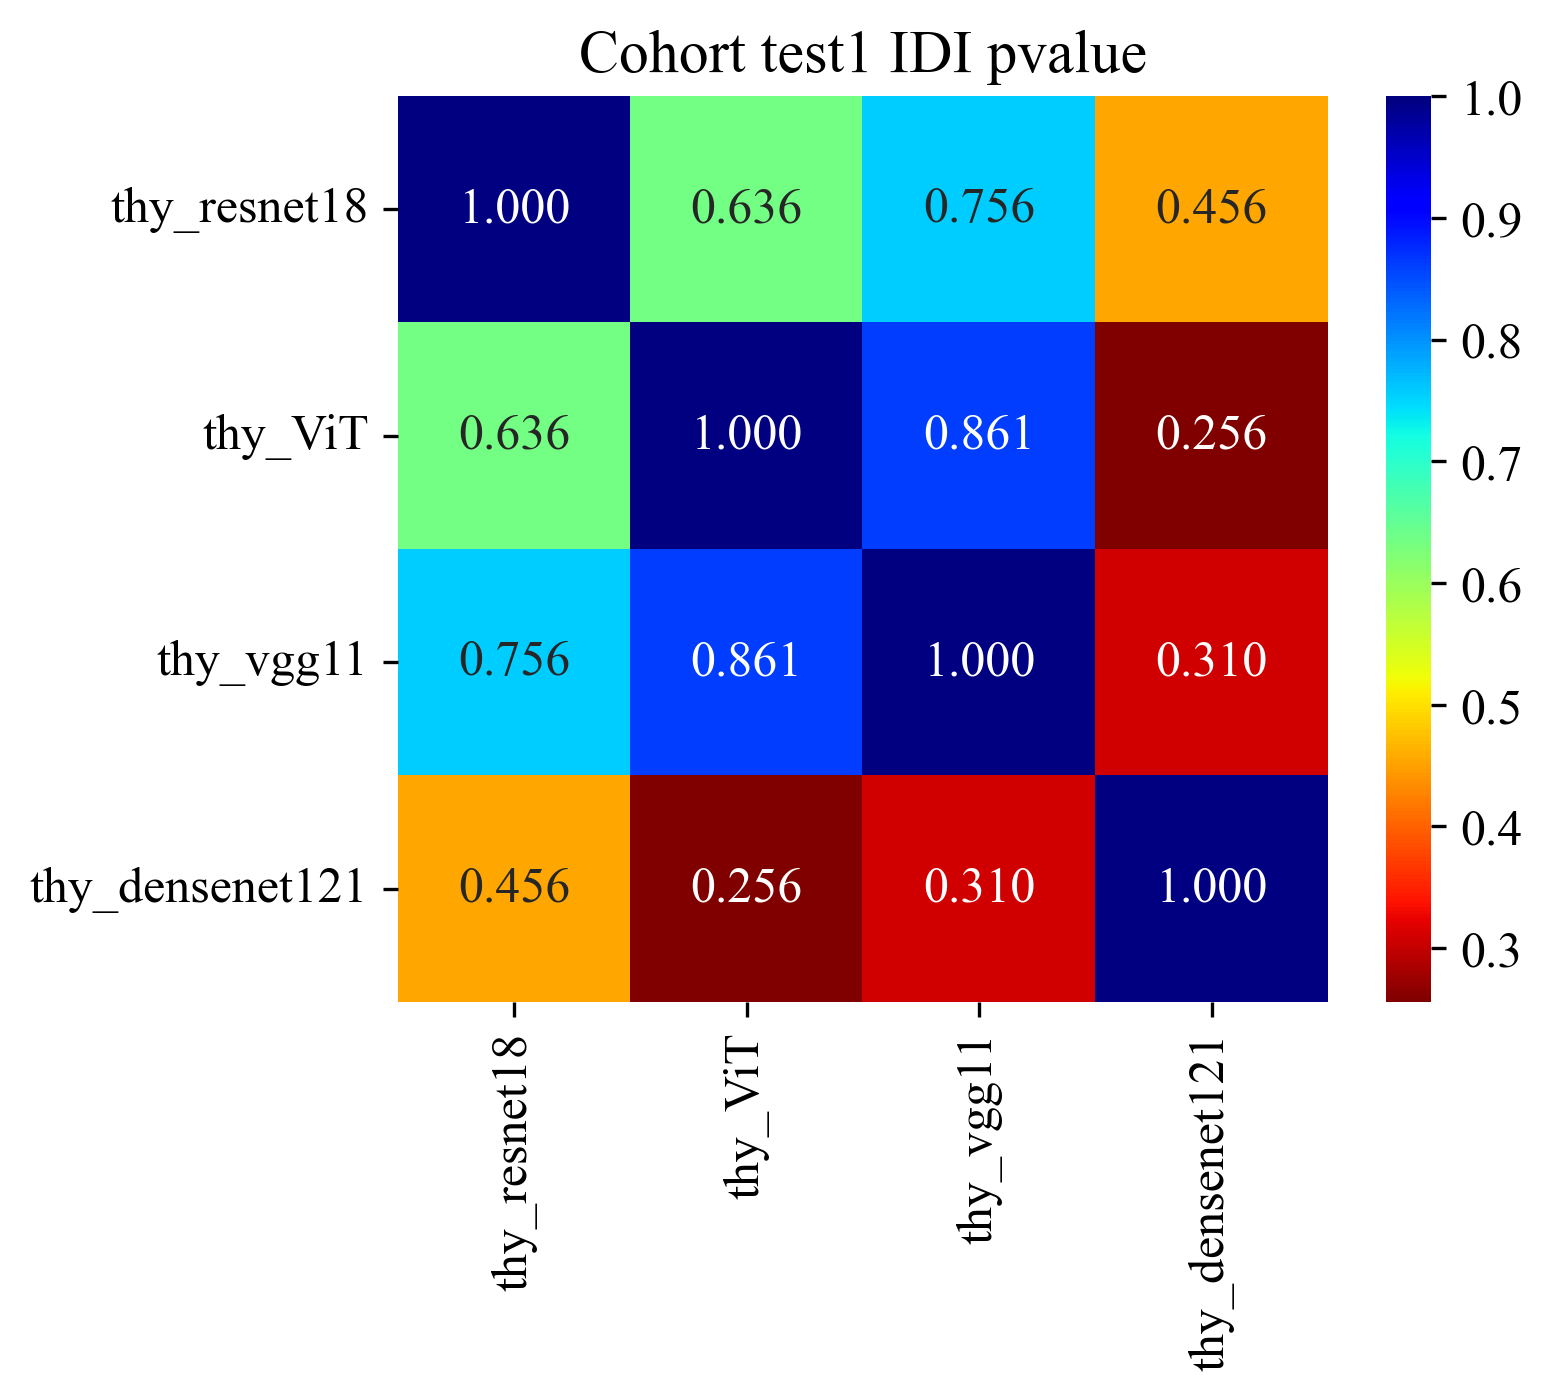

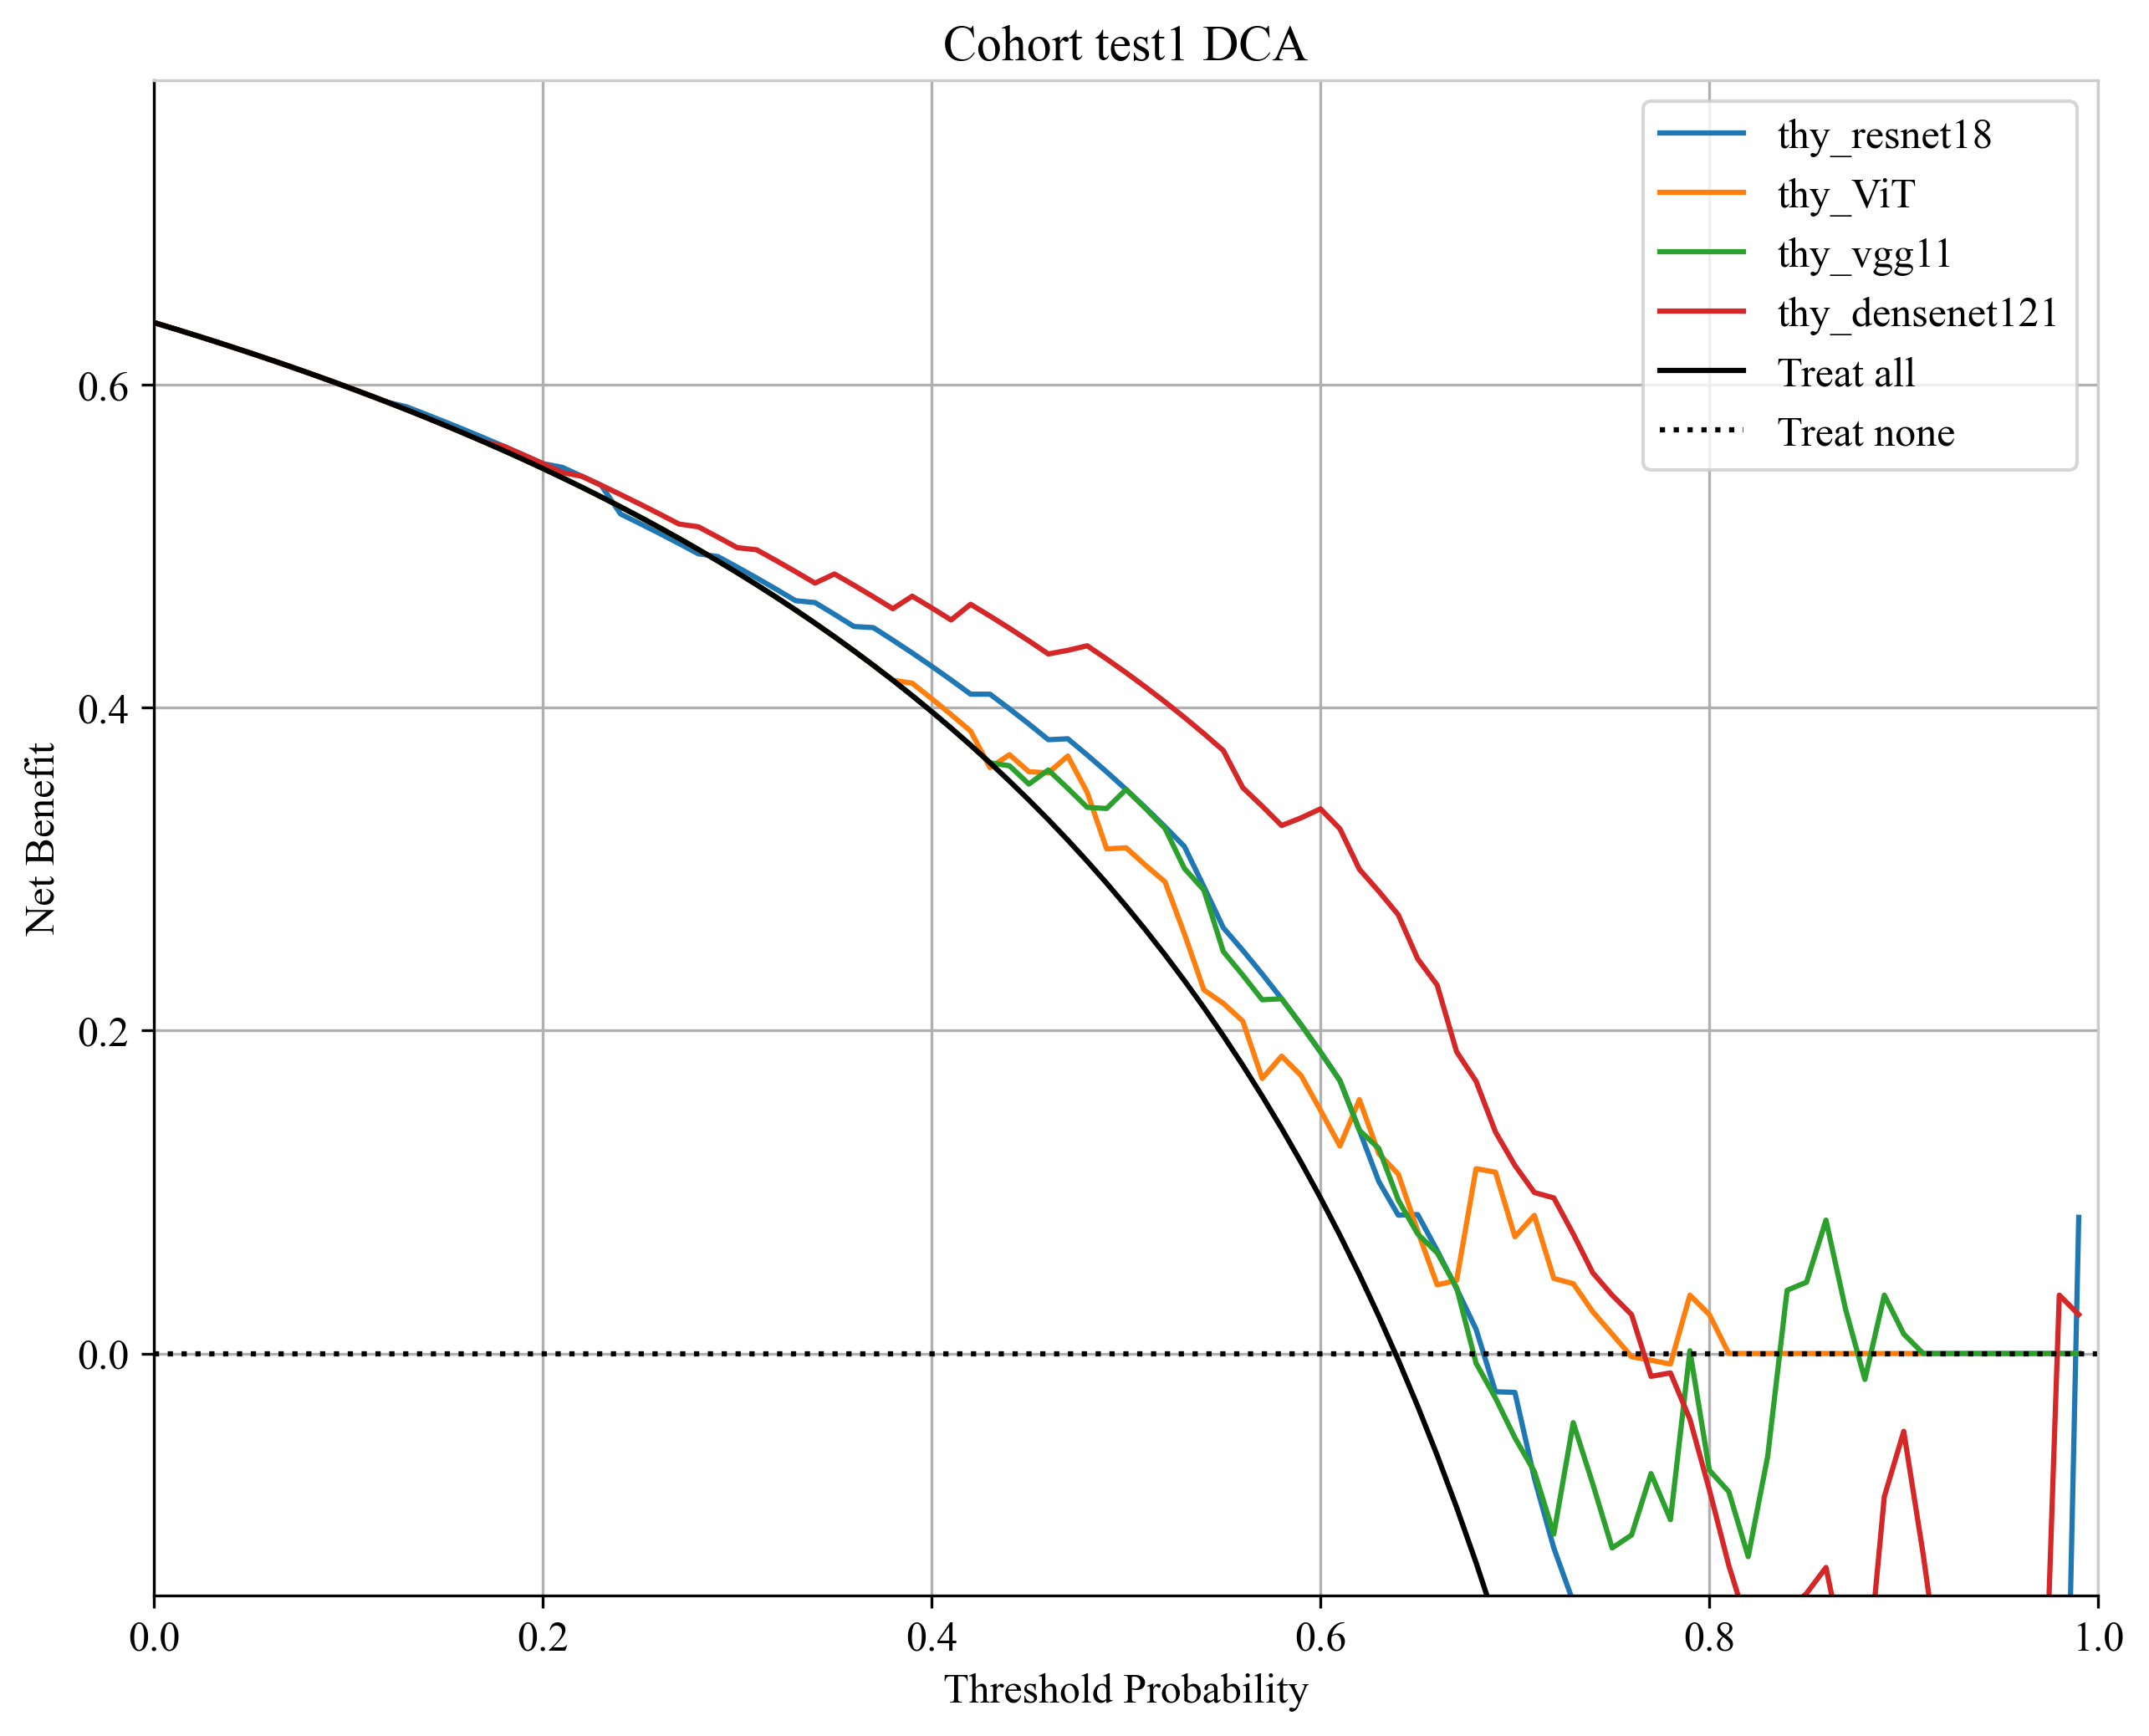

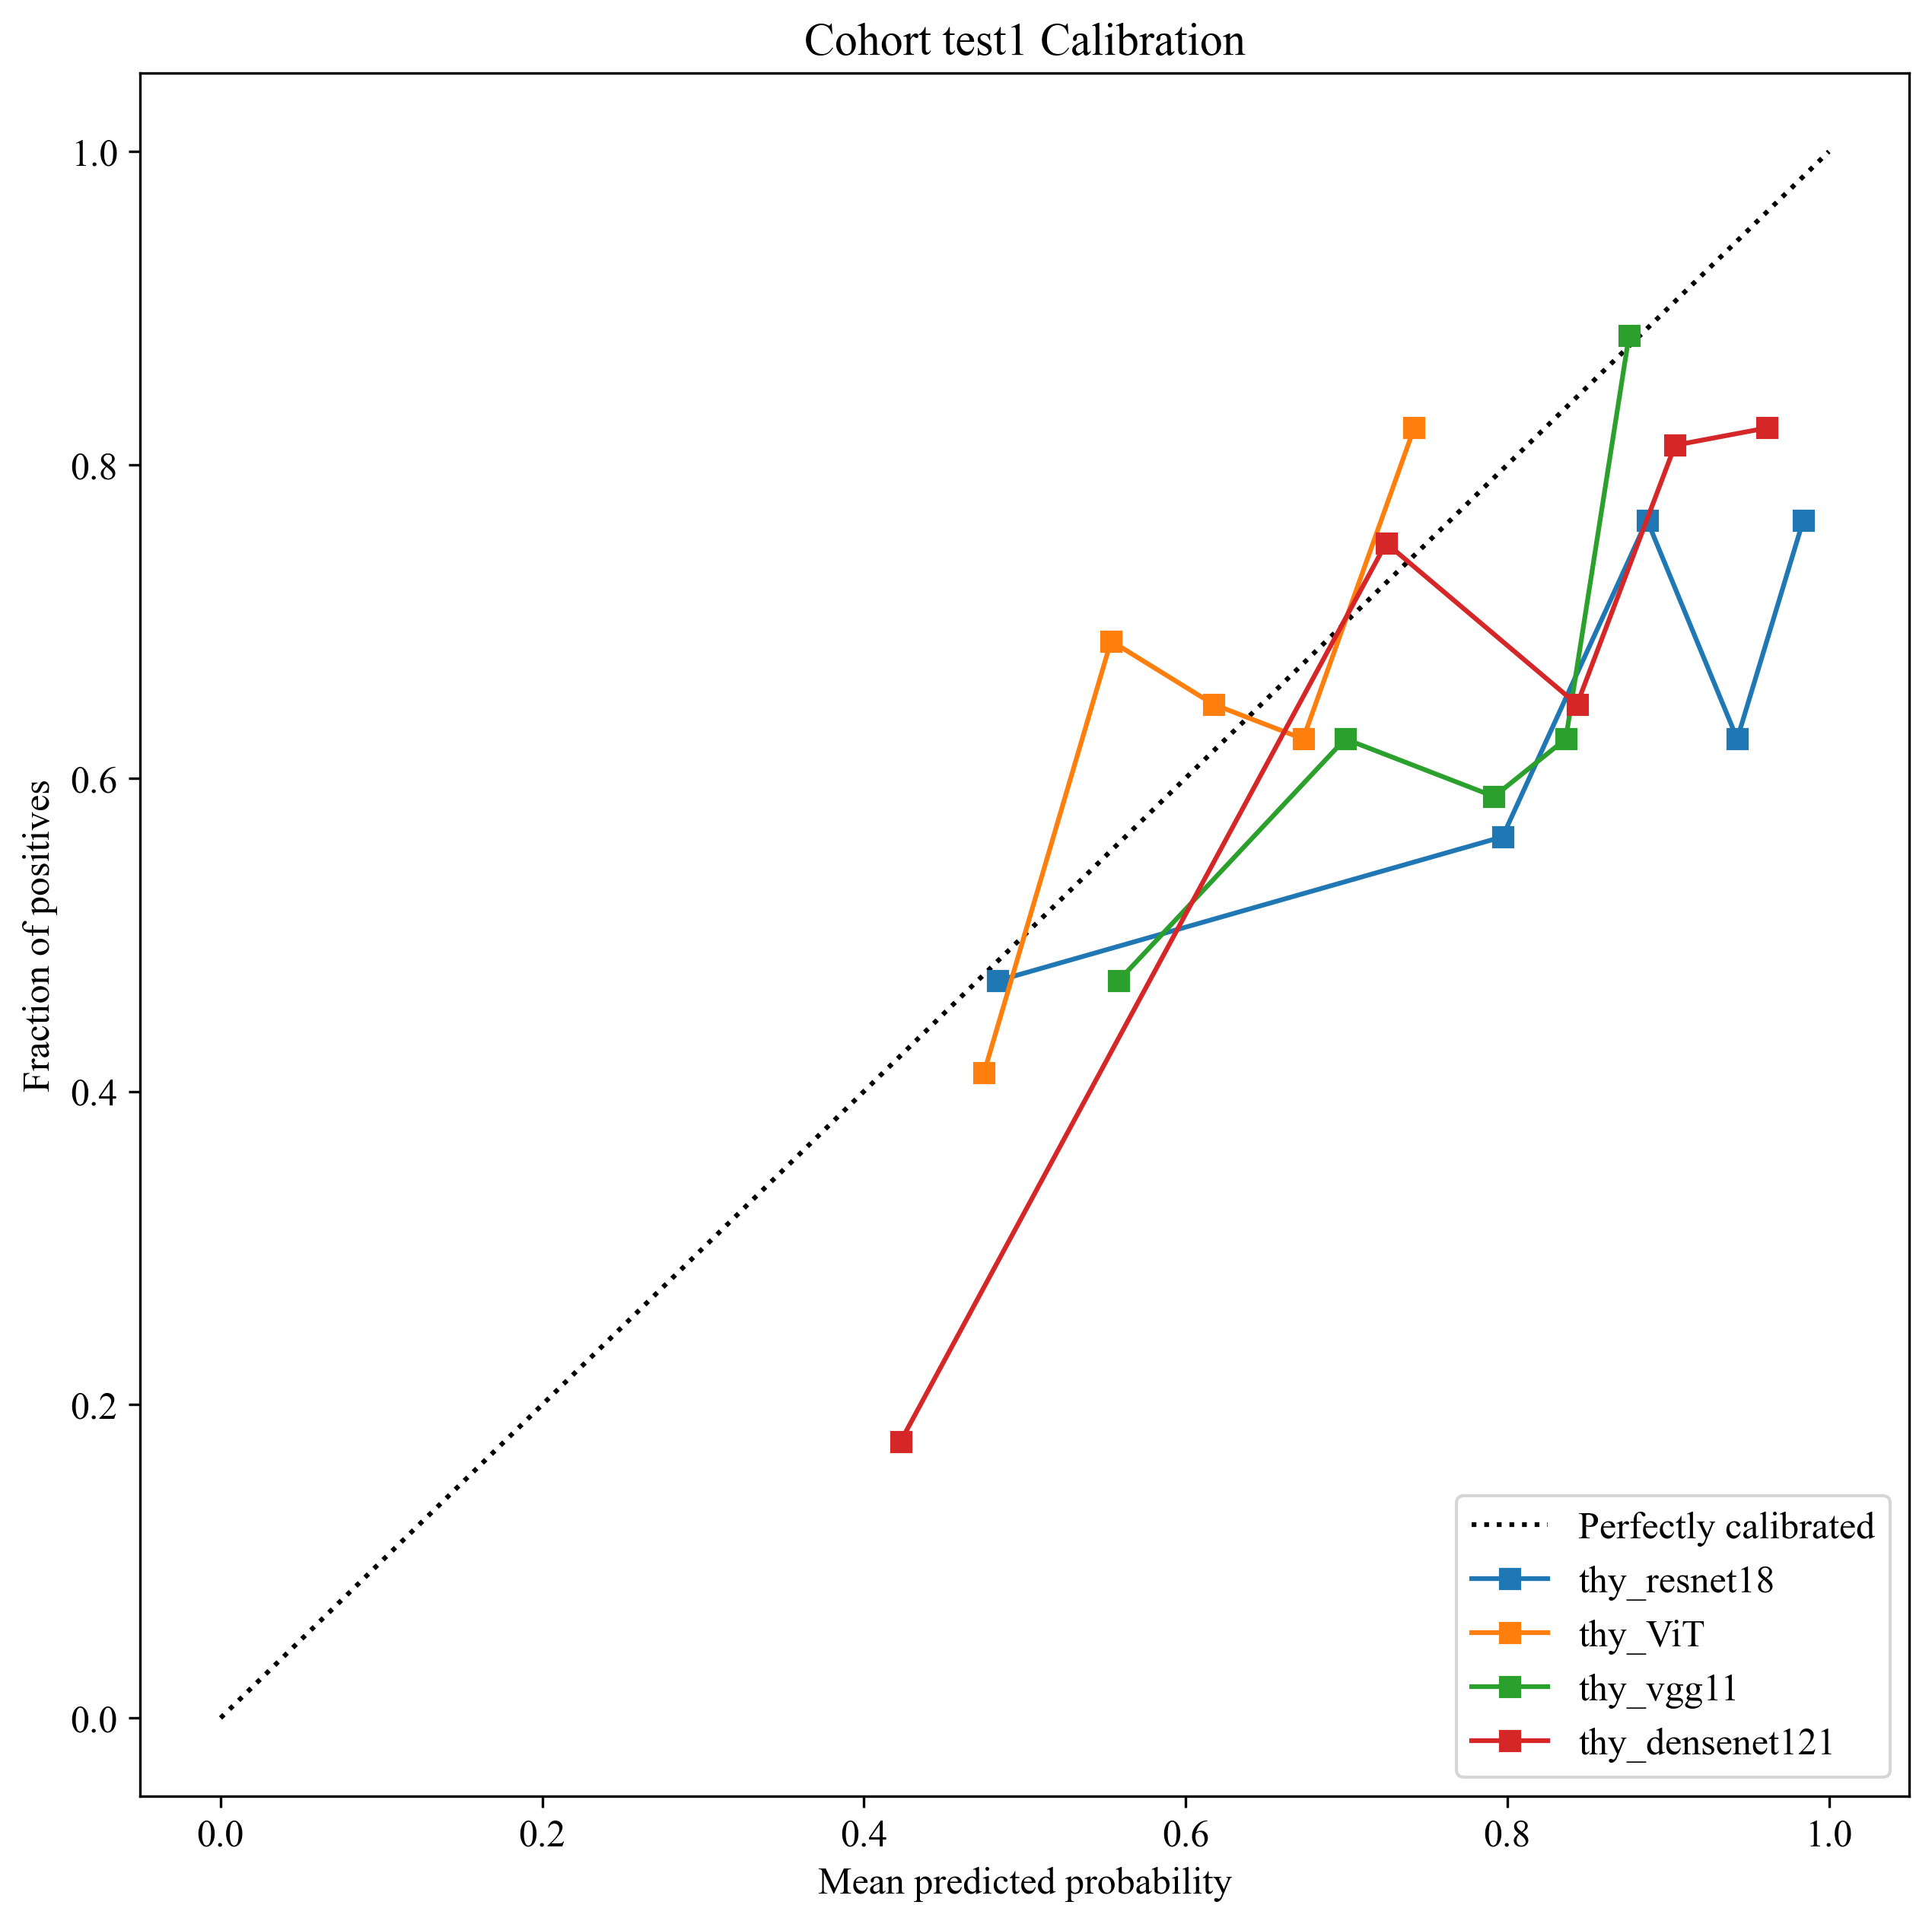

ID       -0_x  thy_resnet18   -0_y  thy_ViT   -0_x  thy_vgg11  \
0   427.nii.gz  5.663e-04         0.999  0.306    0.694  0.206      0.794   
1   411.nii.gz  1.519e-01         0.848  0.378    0.622  0.316      0.684   
2   409.nii.gz  2.430e-01         0.757  0.341    0.659  0.169      0.831   
3   403.nii.gz  1.000e-01         0.900  0.334    0.666  0.143      0.857   
4   434.nii.gz  1.750e-02         0.983  0.285    0.715  0.173      0.827   
5   441.nii.gz  3.457e-02         0.965  0.327    0.673  0.127      0.873   
6   432.nii.gz  1.208e-03         0.999  0.321    0.679  0.132      0.868   
7   425.nii.gz  1.202e-01         0.880  0.317    0.683  0.191      0.809   
8   449.nii.gz  1.802e-02         0.982  0.328    0.672  0.197      0.803   
9   438.nii.gz  3.560e-01         0.644  0.458    0.542  0.364      0.636   
10  400.nii.gz  5.307e-02         0.947  0.316    0.684  0.153      0.847   
11  431.nii.gz  2.887e-01         0.711  0.473    0.527  0.534      0.466   
12  437.nii.gz  1.246e-01         0.875  0.439    0.561  0.218      0.782   
13  447.nii.gz  3.107e-01         0.689  0.579    0.421  0.335      0.665   
14  421.nii.gz  2.392e-04         1.000  0.280    0.720  0.153      0.847   
15  443.nii.gz  9.082e-02         0.909  0.167    0.833  0.122      0.878   
16  426.nii.gz  6.574e-02         0.934  0.277    0.723  0.255      0.745   
17  439.nii.gz  7.990e-01         0.201  0.493    0.507  0.454      0.546   
18  404.nii.gz  2.539e-01         0.746  0.377    0.623  0.154      0.846   
19  430.nii.gz  5.797e-02         0.942  0.429    0.571  0.206      0.794   
20  448.nii.gz  9.929e-02         0.901  0.332    0.668  0.199      0.801   
21  458.nii.gz  3.161e-03         0.997  0.428    0.572  0.174      0.826   
22  428.nii.gz  4.614e-01         0.539  0.430    0.570  0.353      0.647   
23  412.nii.gz  7.671e-03         0.992  0.311    0.689  0.167      0.833   
24  435.nii.gz  5.590e-02         0.944  0.265    0.735  0.116      0.884   
25  433.nii.gz  1.281e-02         0.987  0.451    0.549  0.288      0.712   
26  451.nii.gz  1.733e-01         0.827  0.426    0.574  0.321      0.679   
27  416.nii.gz  6.103e-02         0.939  0.503    0.497  0.263      0.737   
28  408.nii.gz  1.272e-01         0.873  0.328    0.672  0.111      0.889   
29  453.nii.gz  1.697e-01         0.830  0.379    0.621  0.351      0.649   
30  445.nii.gz  1.416e-01         0.858  0.444    0.556  0.165      0.835   
31  442.nii.gz  1.835e-02         0.982  0.288    0.712  0.143      0.857   
32  420.nii.gz  1.737e-01         0.826  0.423    0.577  0.183      0.817   
33  455.nii.gz  9.092e-02         0.909  0.304    0.696  0.152      0.848   
34  417.nii.gz  1.313e-01         0.869  0.349    0.651  0.199      0.801   
35  440.nii.gz  2.002e-01         0.800  0.407    0.593  0.166      0.834   
36  401.nii.gz  1.281e-01         0.872  0.549    0.451  0.387      0.613   
37  419.nii.gz  1.990e-01         0.801  0.413    0.587  0.256      0.744   
38  450.nii.gz  2.254e-02         0.977  0.272    0.728  0.102      0.898   
39  405.nii.gz  3.695e-02         0.963  0.292    0.708  0.091      0.909   
40  452.nii.gz  3.869e-02         0.961  0.371    0.629  0.143      0.857   
41  402.nii.gz  8.067e-02         0.919  0.567    0.433  0.236      0.764   
42  457.nii.gz  1.477e-02         0.985  0.420    0.580  0.217      0.783   
43  444.nii.gz  6.723e-01         0.328  0.376    0.624  0.437      0.563   
44  446.nii.gz  1.731e-01         0.827  0.456    0.544  0.527      0.473   
45  454.nii.gz  1.344e-01         0.866  0.246    0.754  0.166      0.834   
46  436.nii.gz  1.326e-02         0.987  0.326    0.674  0.106      0.894   
47  423.nii.gz  3.391e-02         0.966  0.216    0.784  0.098      0.902   

     -0_y  thy_densenet121  group  label  
0   0.005            0.995  test2      1  
1   0.316            0.684  test2      0  
2   0.257            0.743  test2      0  
3   0.070            0.930  test2      1  
4   0.067            0.

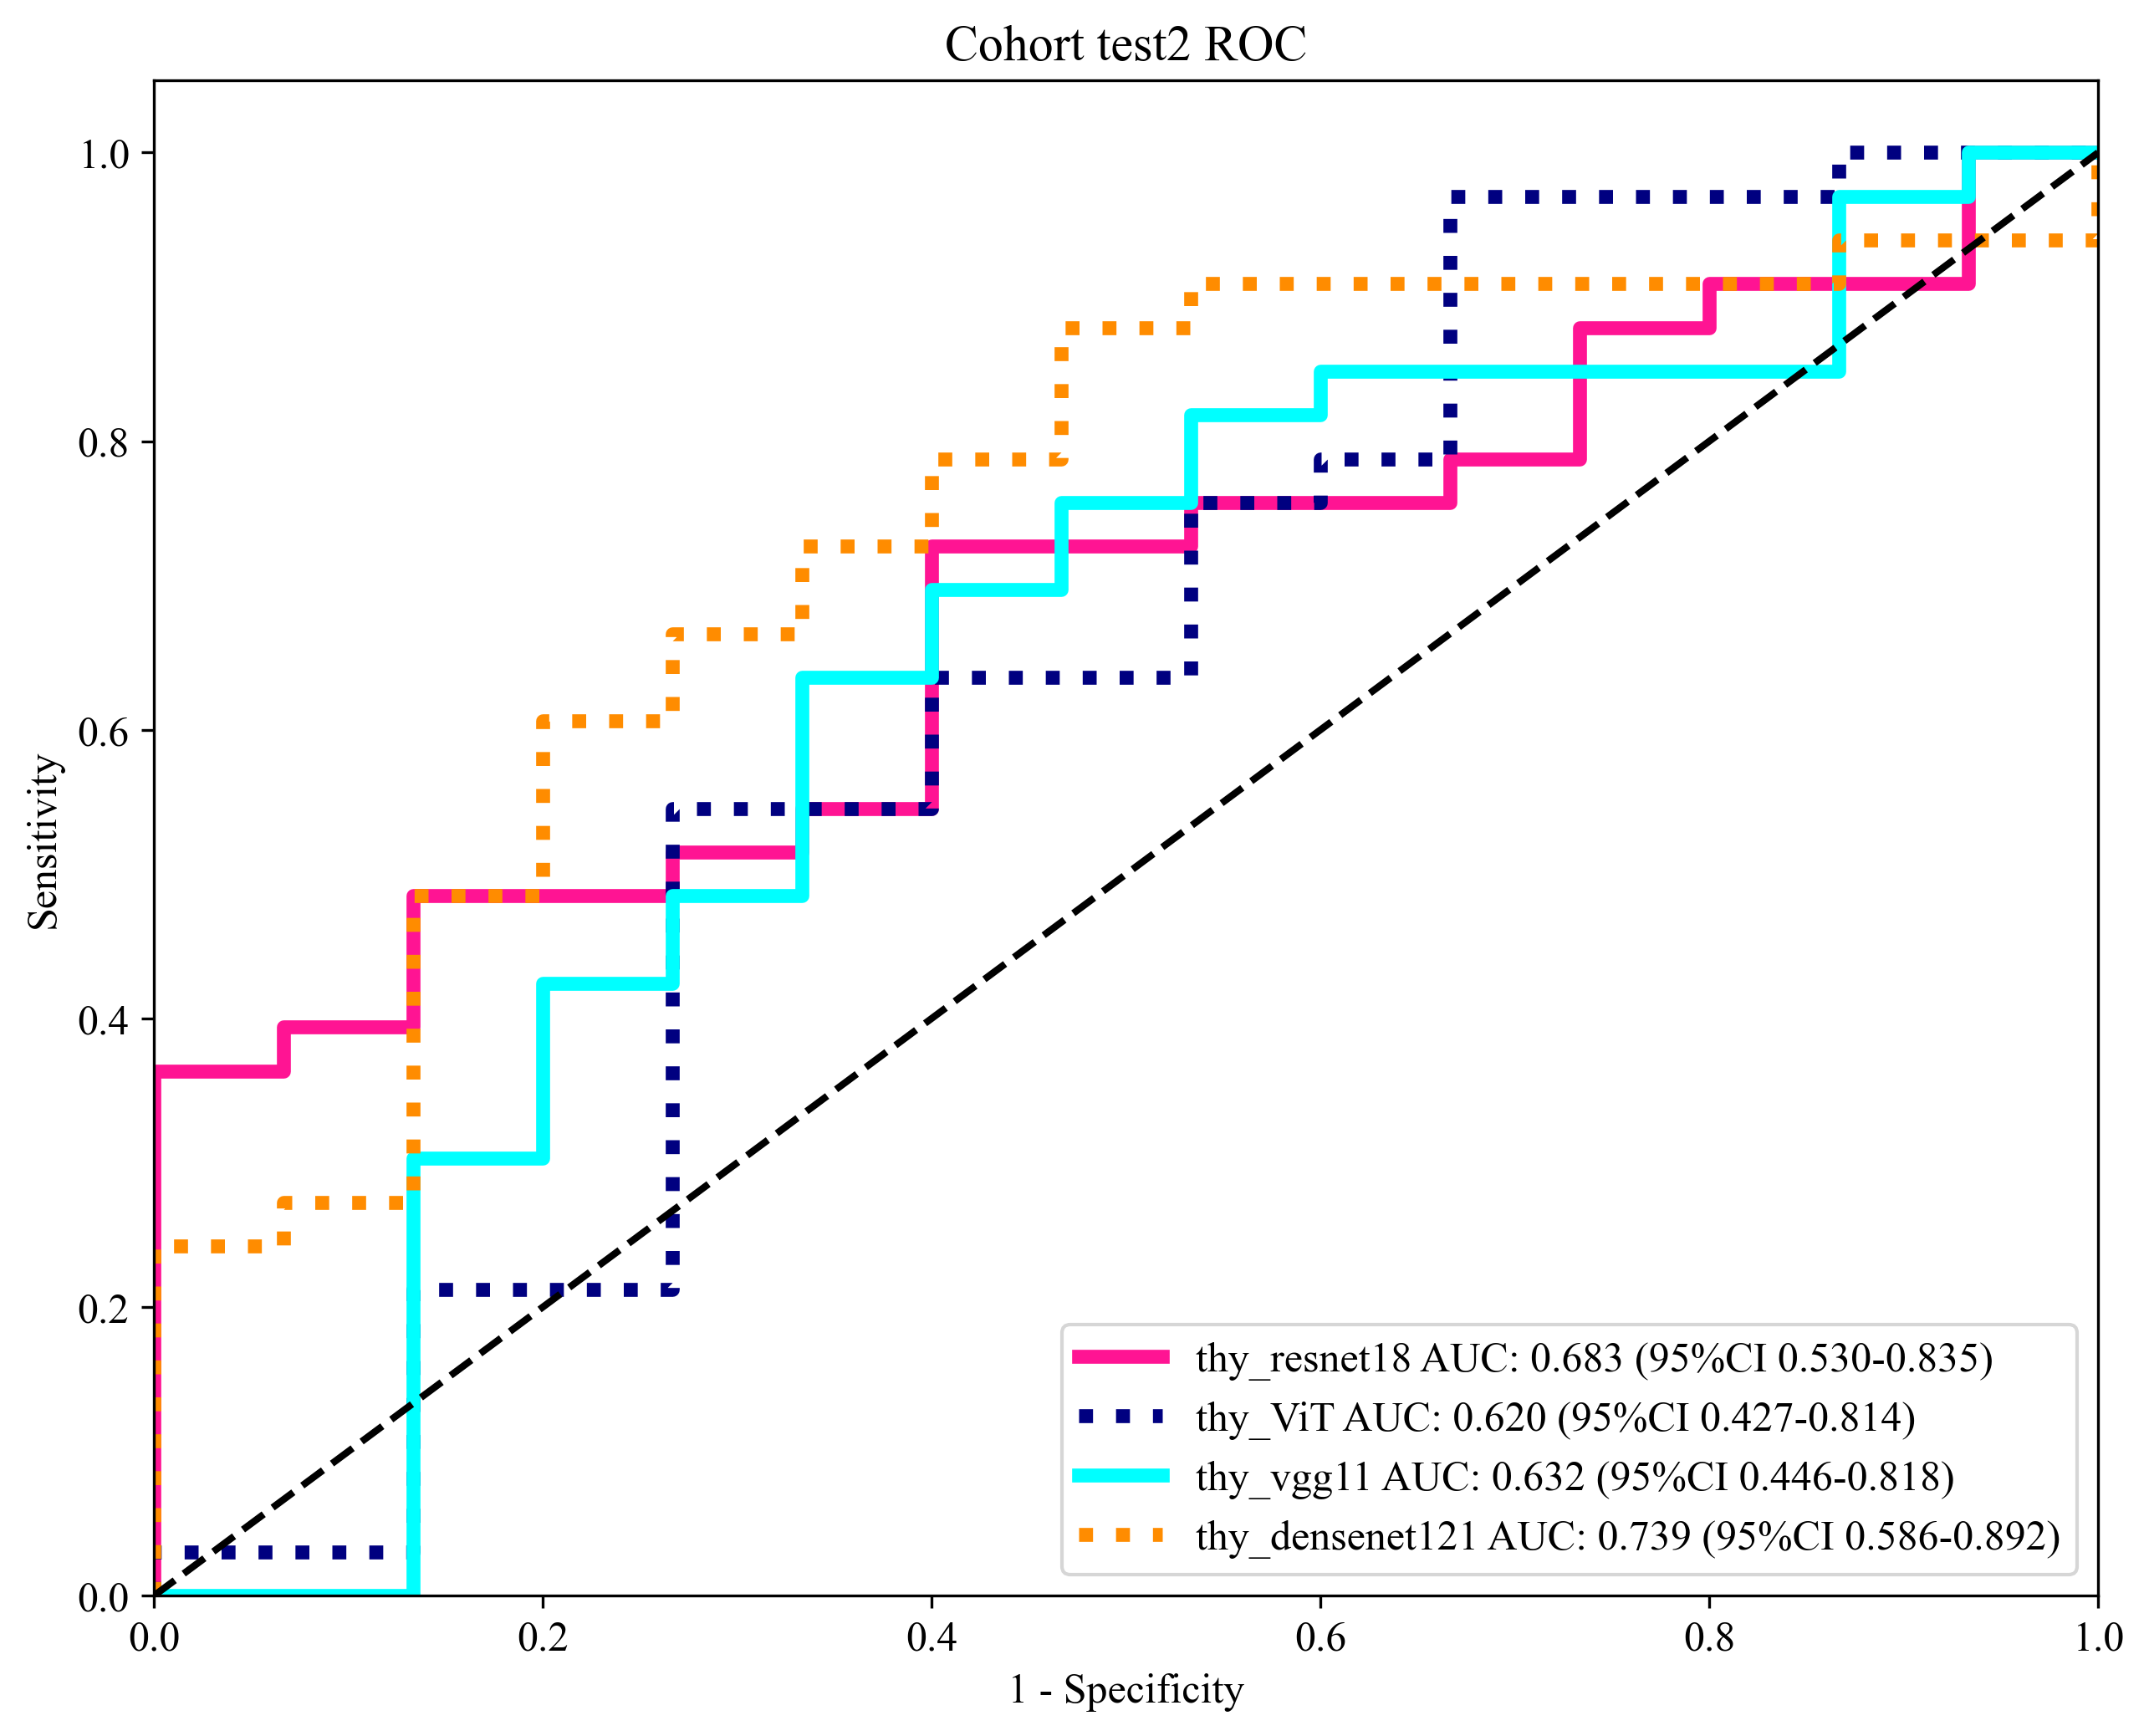

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0      thy_resnet18     0.832  0.903  0.8503 - 0.9553        0.800   
1           thy_ViT     0.559  0.588  0.4883 - 0.6879        0.480   
2         thy_vgg11     0.678  0.722  0.6296 - 0.8150        0.630   
3   thy_densenet121     0.860  0.880  0.8185 - 0.9420        0.890   
4      thy_resnet18     0.742  0.635  0.4733 - 0.7969        0.886   
5           thy_ViT     0.677  0.577  0.4106 - 0.7435        0.727   
6         thy_vgg11     0.790  0.765  0.6250 - 0.9053        0.886   
7   thy_densenet121     0.774  0.702  0.5334 - 0.8706        0.864   
8      thy_resnet18     0.566  0.642  0.5181 - 0.7662        0.415   
9           thy_ViT     0.554  0.645  0.5209 - 0.7697        0.377   
10        thy_vgg11     0.663  0.677  0.5586 - 0.7948        0.642   
11  thy_densenet121     0.795  0.760  0.6445 - 0.8750        0.981   
12     thy_resnet18     0.562  0.683  0.5304 - 0.8352        0.364   
13          thy_ViT     0.771  0.620  0.4268 - 0.8137        0.970   
14        thy_vgg11     0.646  0.632  0.4465 - 0.8182        0.636   
15  thy_densenet121     0.771  0.739  0.5864 - 0.8924        0.879   

    Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0         0.907  0.952  0.661      0.952   0.800  0.870      0.635  train  
1         0.744  0.814  0.381      0.814   0.480  0.604      0.773  train  
2         0.791  0.875  0.479      0.875   0.630  0.733      0.721  train  
3         0.791  0.908  0.756      0.908   0.890  0.899      0.607  train  
4         0.389  0.780  0.583      0.780   0.886  0.830      0.537    val  
5         0.556  0.800  0.455      0.800   0.727  0.762      0.538    val  
6         0.556  0.830  0.667      0.830   0.886  0.857      0.570    val  
7         0.556  0.826  0.625      0.826   0.864  0.844      0.541    val  
8         0.833  0.815  0.446      0.815   0.415  0.550      0.934  test1  
9         0.867  0.833  0.441      0.833   0.377  0.519      0.677  test1  
10        0.700  0.791  0.525      0.791   0.642  0.708      0.796  test1  
11        0.467  0.765  0.933      0.765   0.981  0.860      0.613  test1  
12        1.000  1.000  0.417      1.000   0.364  0.533      0.977  test2  
13        0.333  0.762  0.833      0.762   0.970  0.853      0.542  test2  
14        0.667  0.808  0.455      0.808   0.636  0.712      0.803  test2  
15        0.533  0.806  0.667      0.806   0.879  0.841      0.760  test2

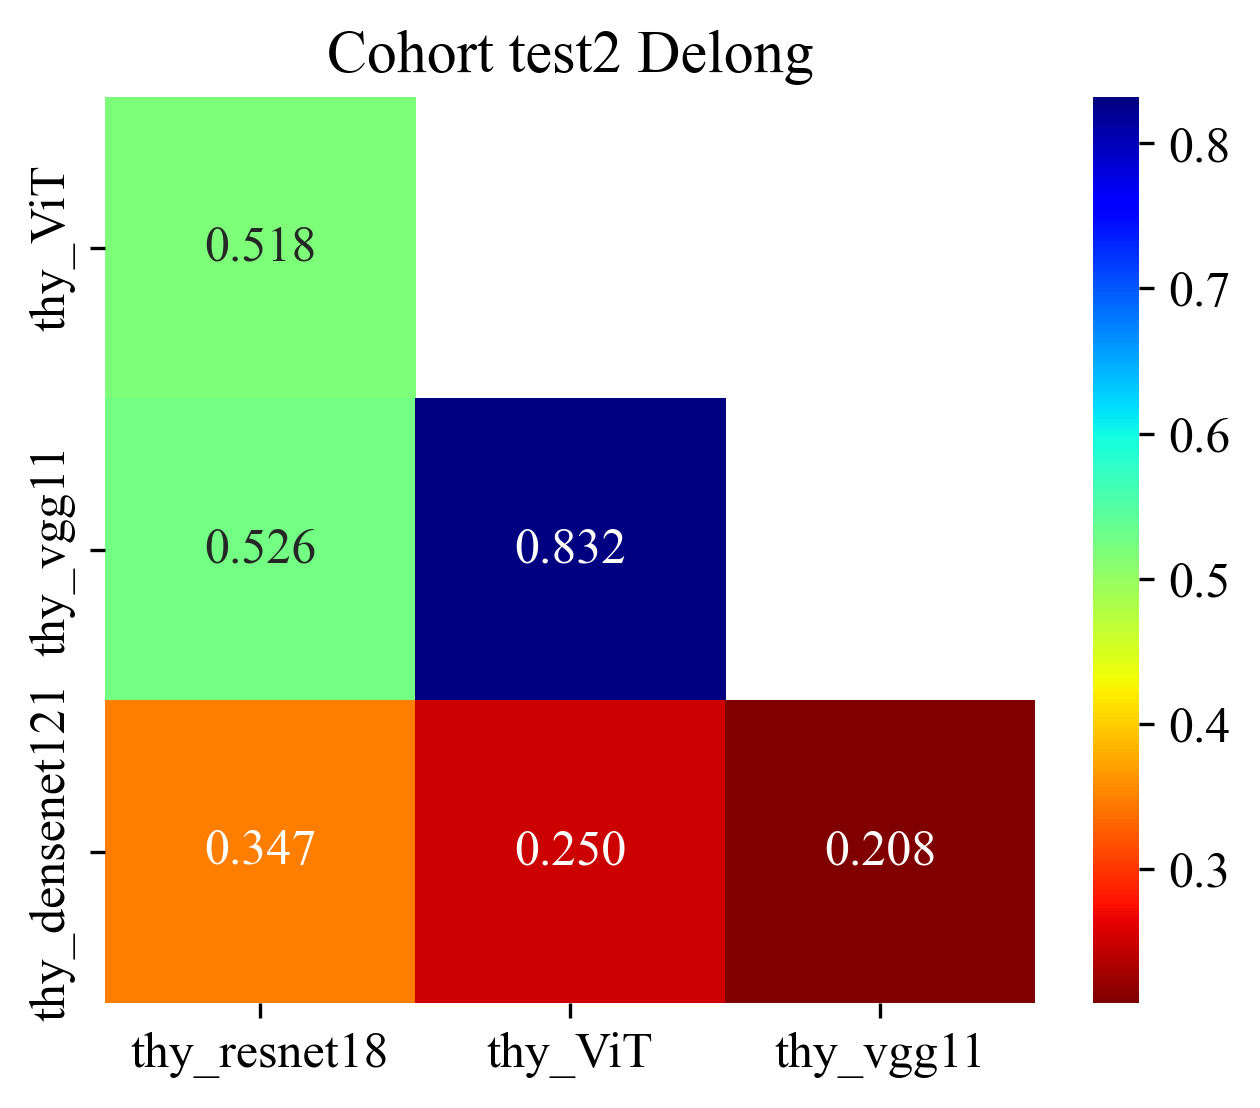

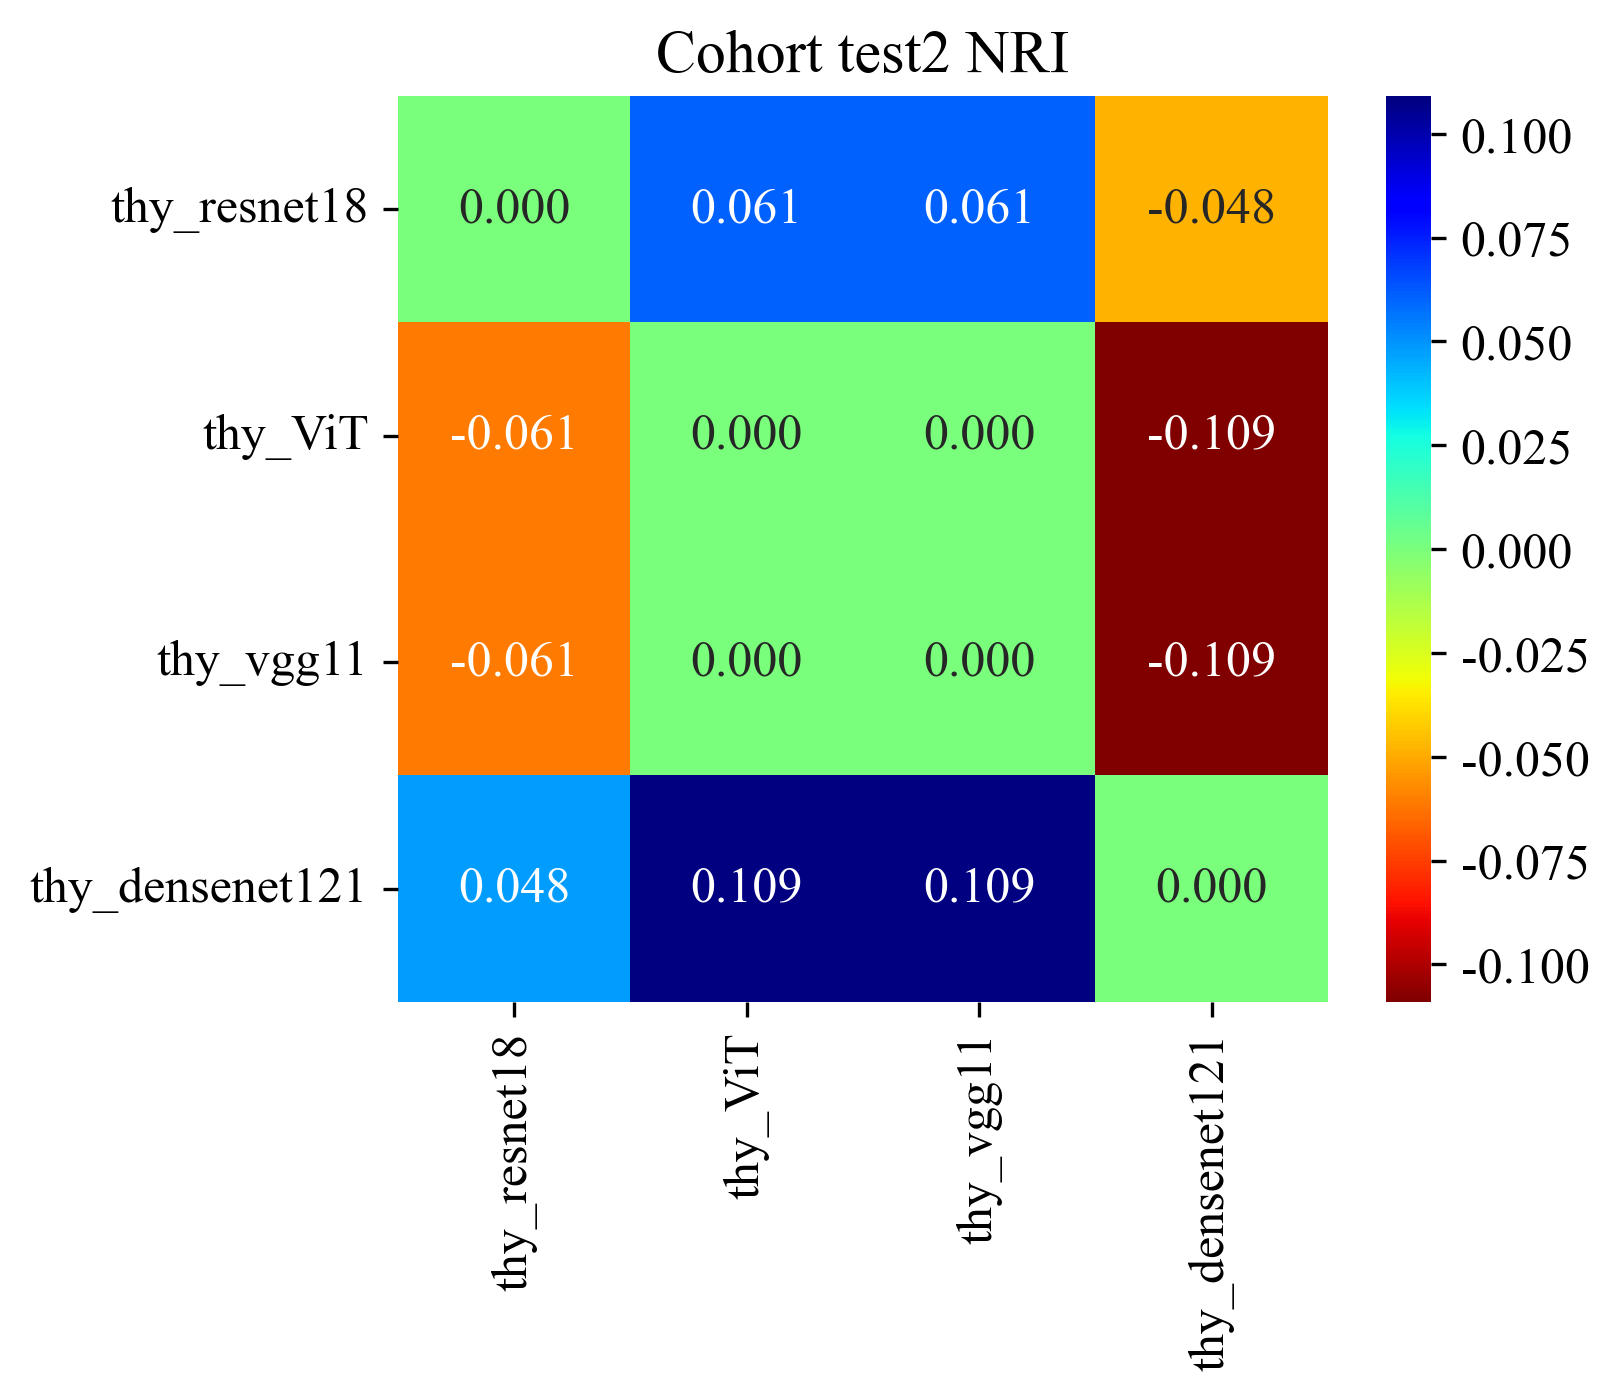

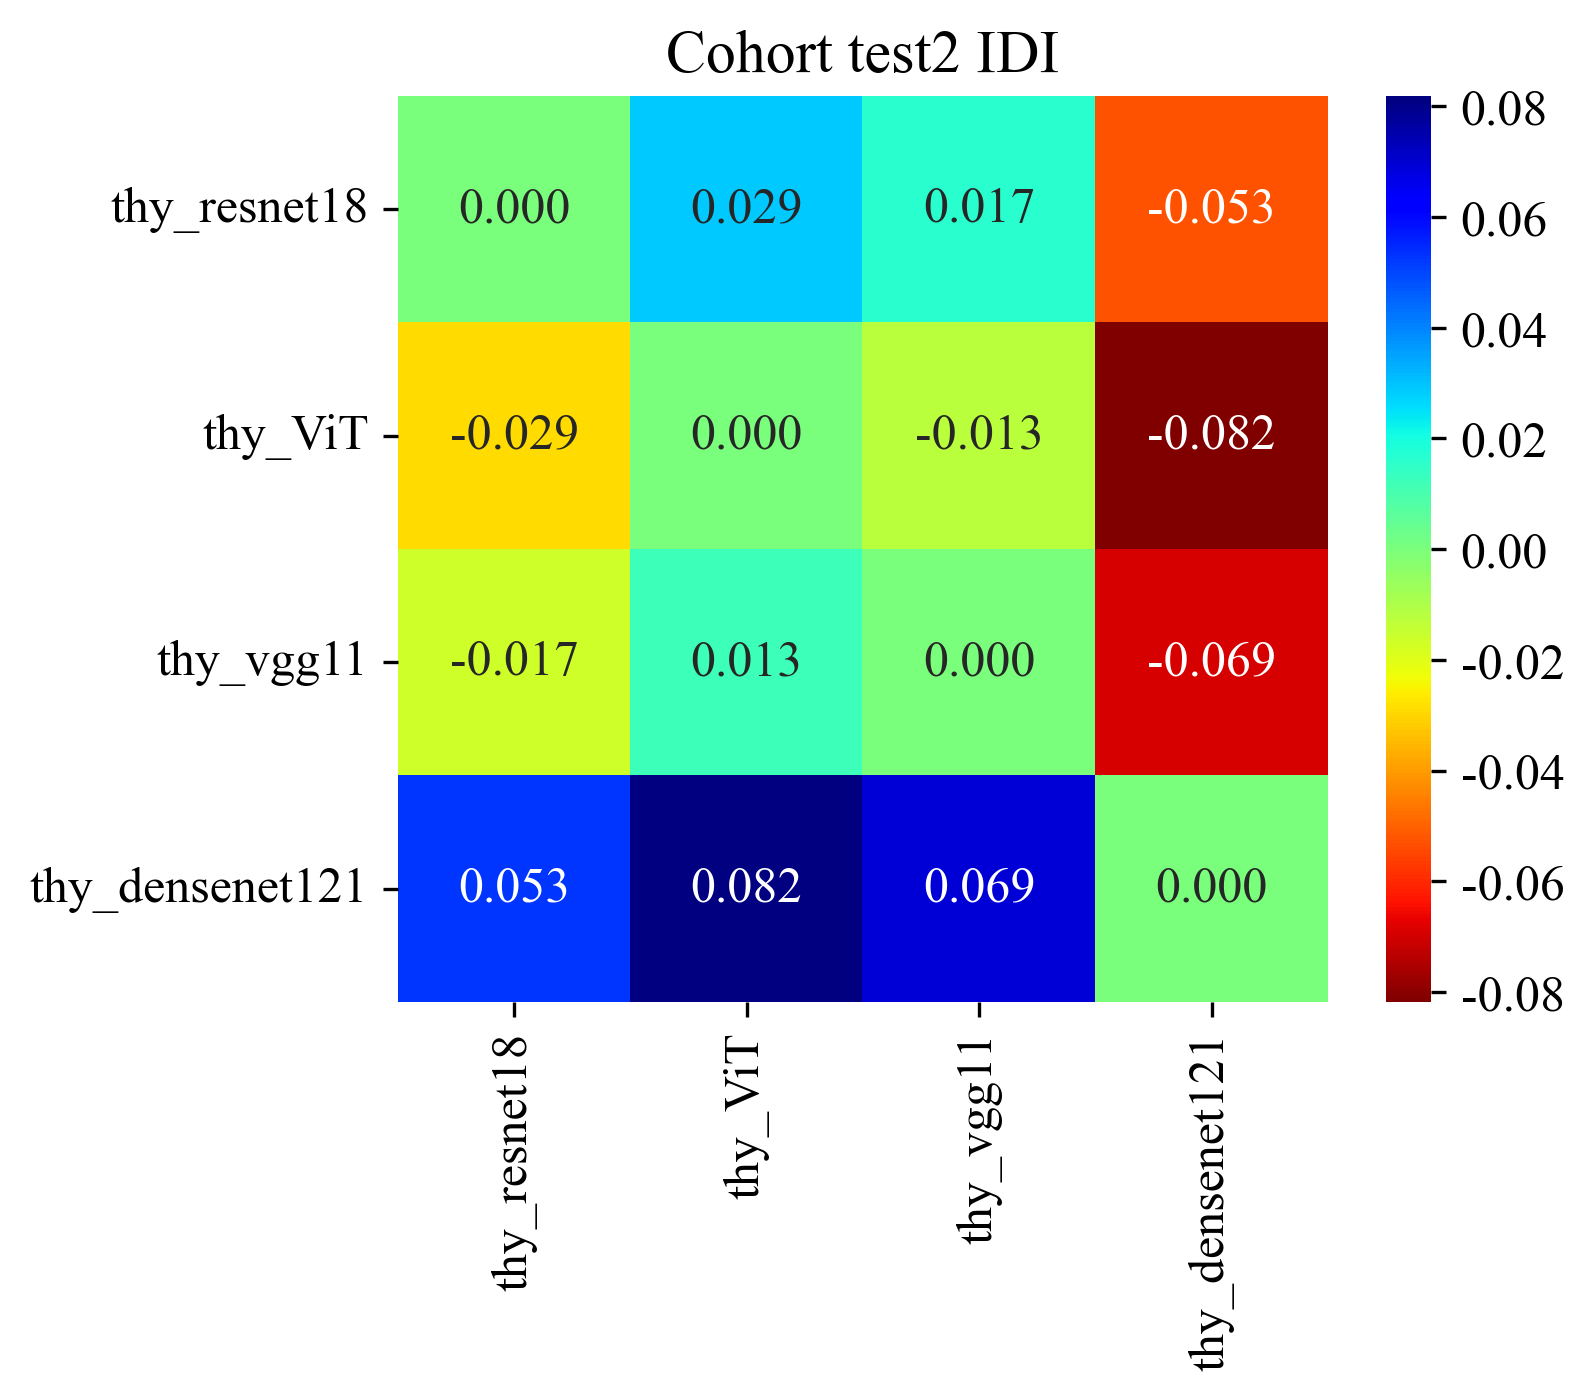

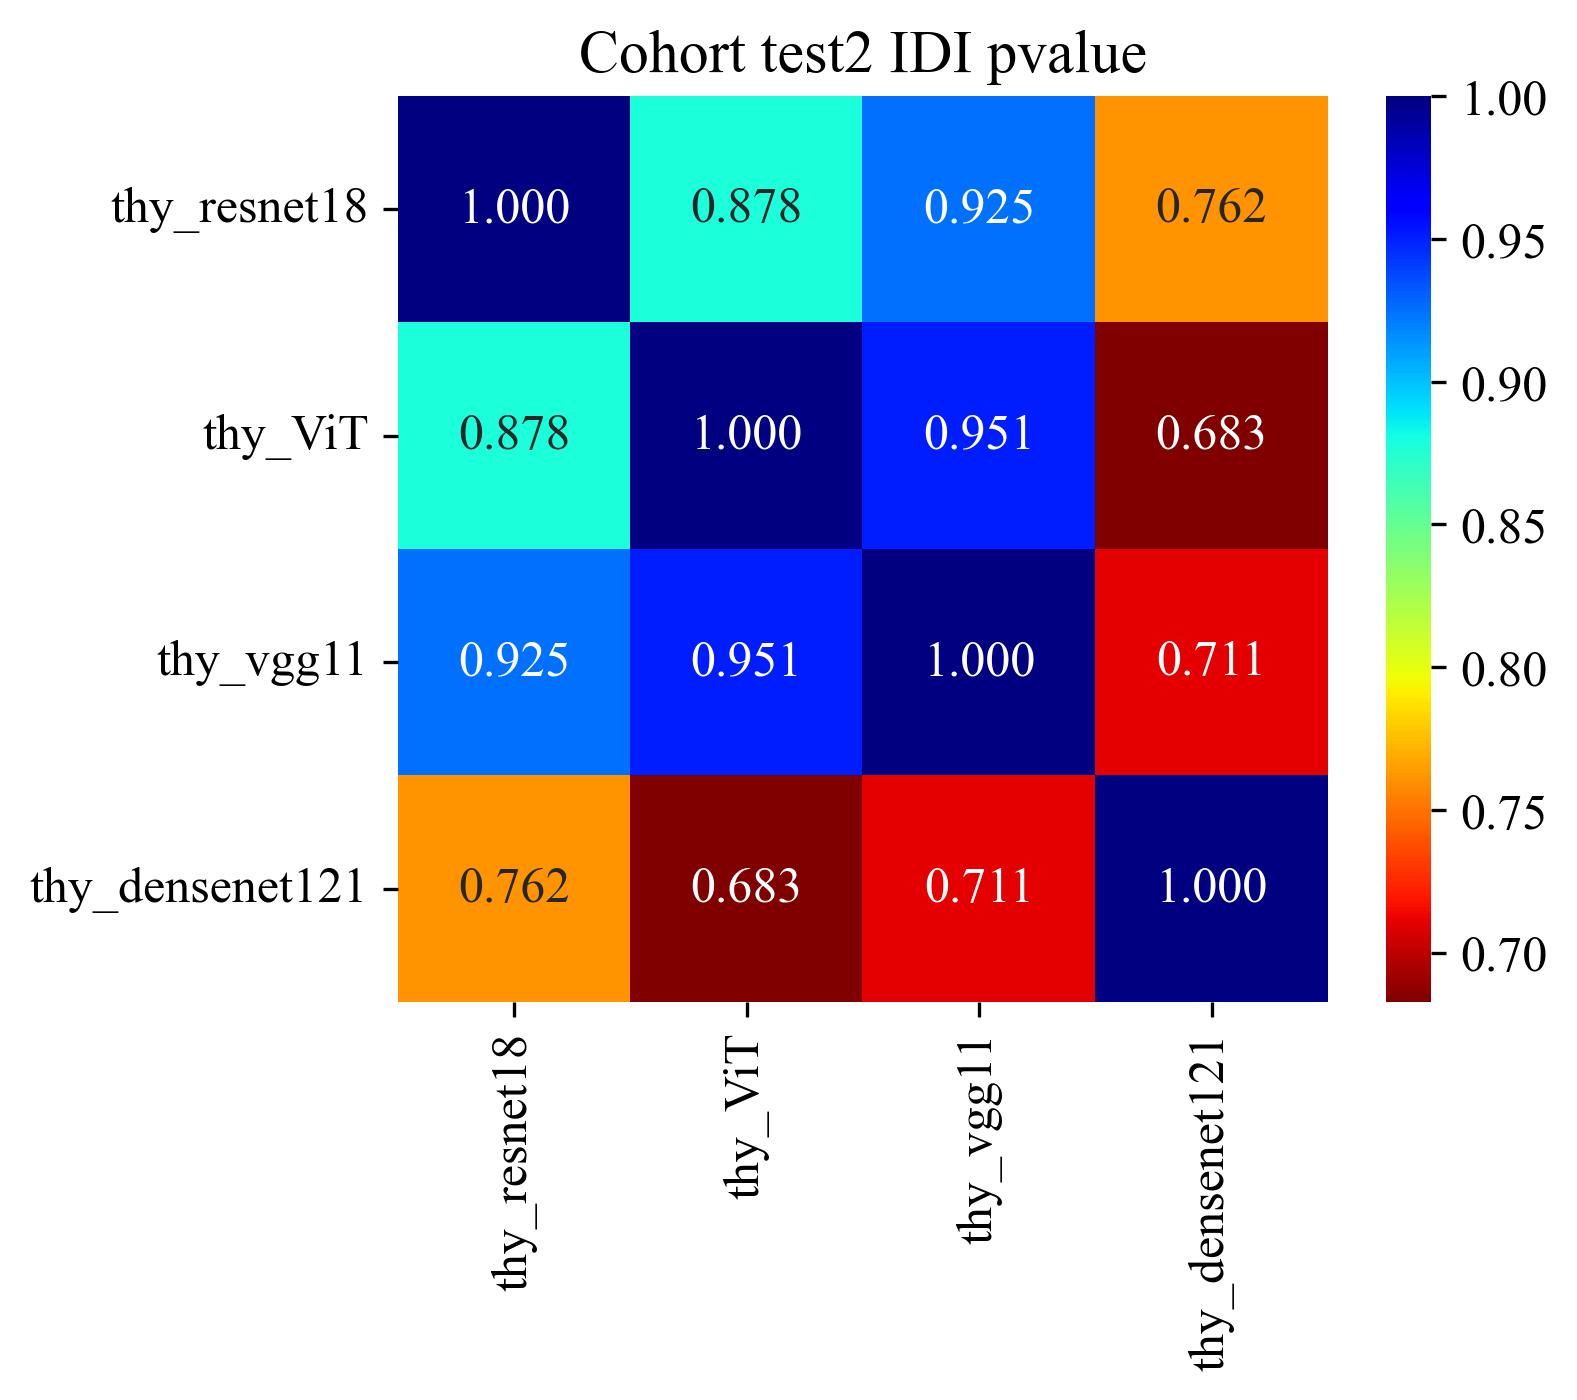

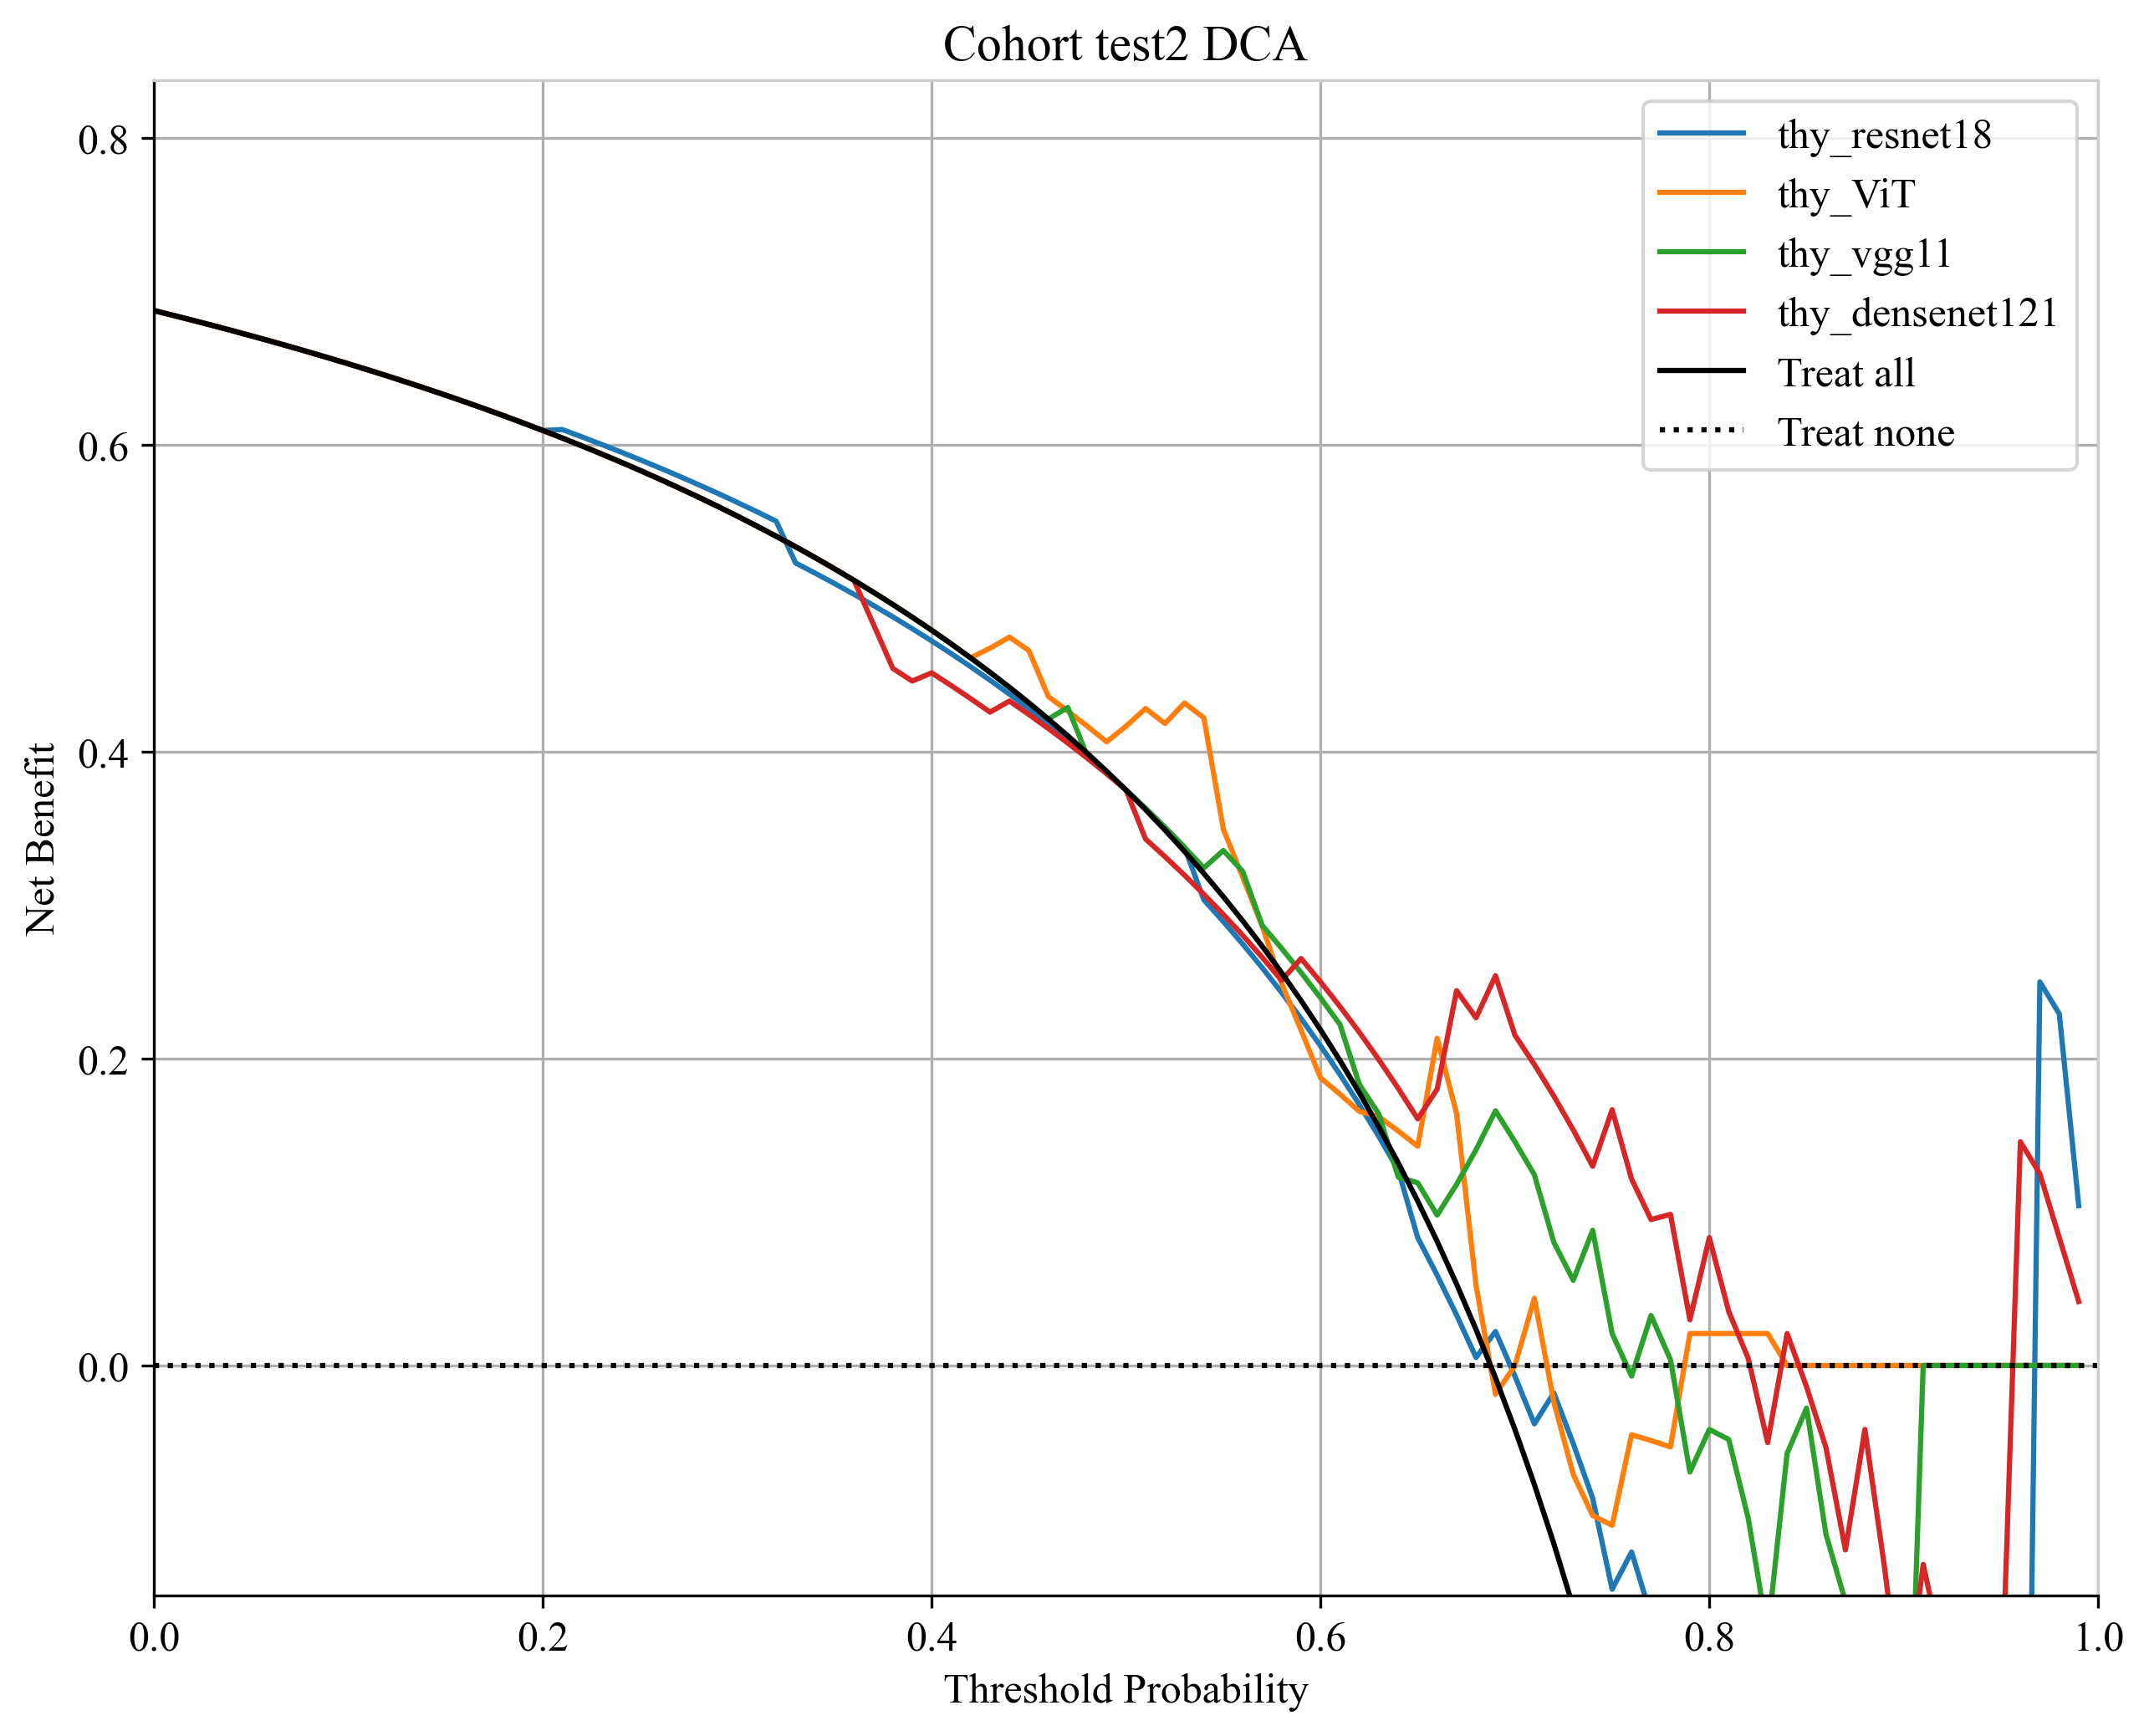

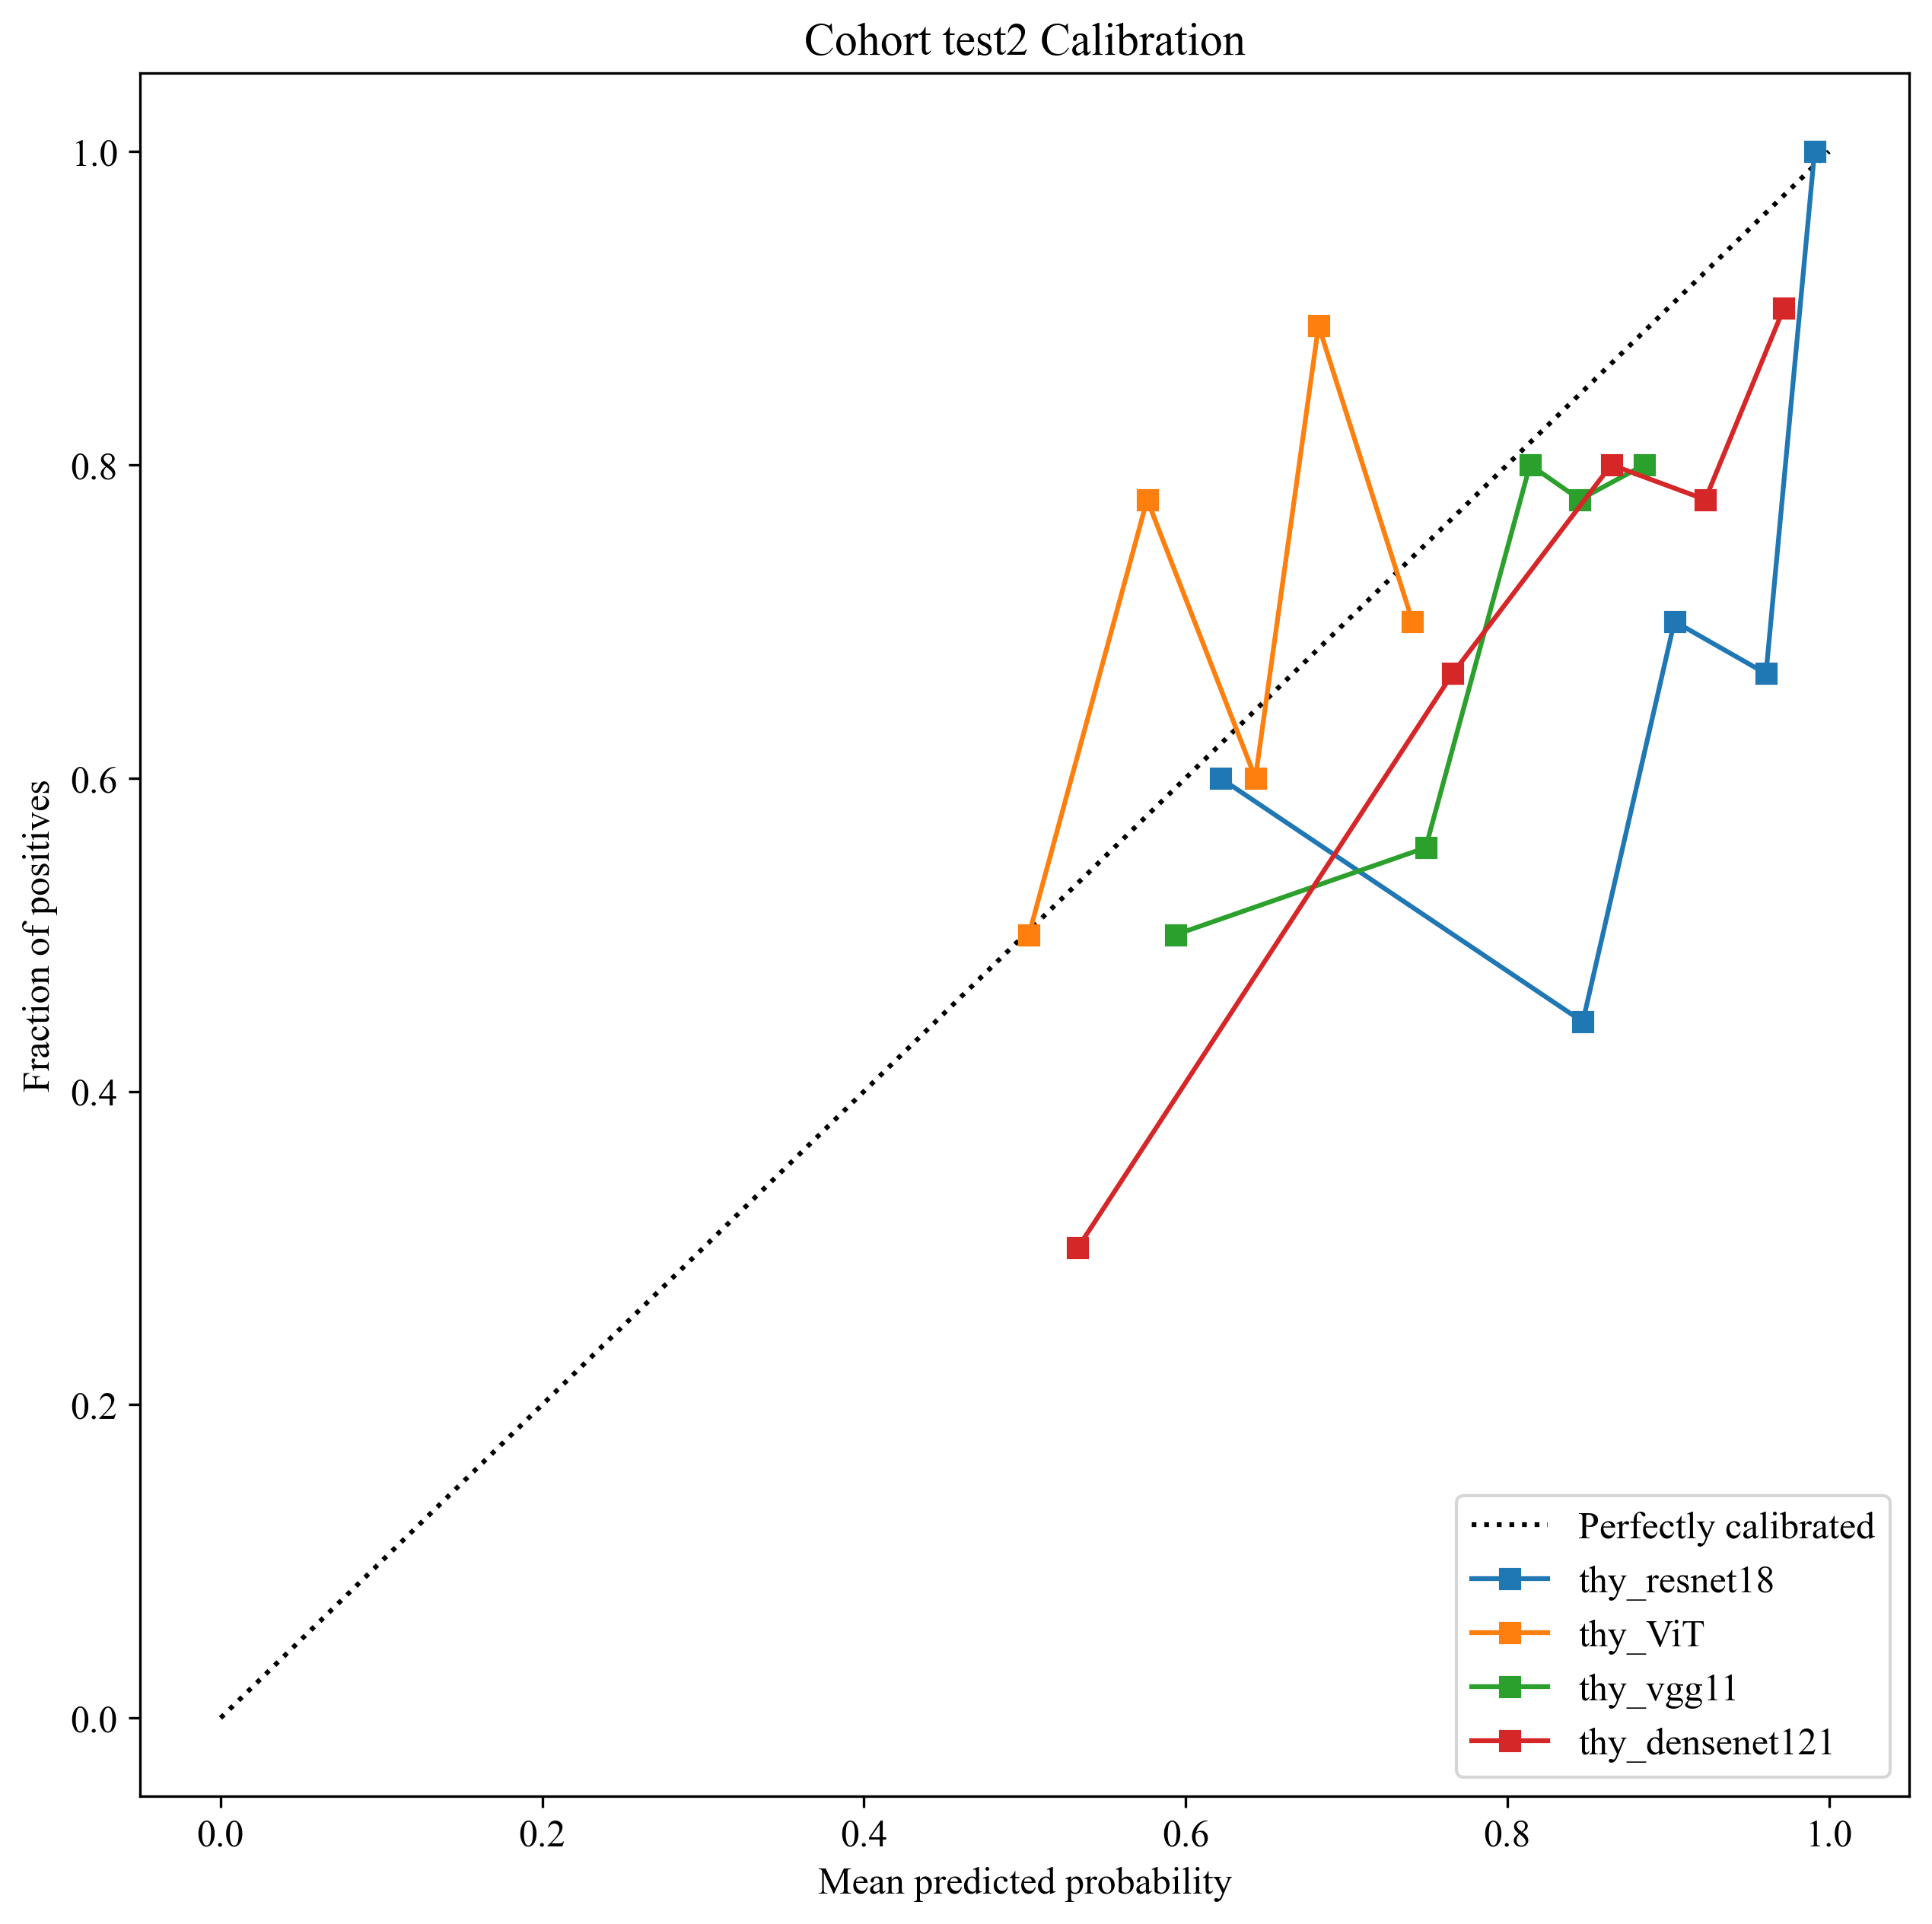

thy_resnet18  thy_ViT  thy_vgg11  thy_densenet121 Cohort
0         0.284    0.667      0.101            0.033  train
1         0.260    0.729      0.154            0.610    val
2         0.028    0.454      0.192            0.065  test1
3         0.175    0.241      0.658            0.105  test2

In [2]:
import pandas as pd
from onekey_algo.custom.components.comp1 import normalize_df, merge_results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from onekey_algo.custom.components import metrics
from onekey_algo.custom.components.delong import delong_roc_test
from onekey_algo.custom.components.comp1 import draw_matrix
from onekey_algo.custom.components.metrics import NRI, IDI
from onekey_algo.custom.components.comp1 import plot_DCA
from onekey_algo.custom.components.comp1 import draw_calibration
from onekey_algo.custom.components import stats
from onekey_algo.custom.components.metrics import analysis_pred_binary

hosmer = []
youden = {}
metric = []
fig_size = (5, 4)
model_root = get_param_in_cwd('model_root')
for subset in [s for s in get_param_in_cwd('subsets', ['val', 'test'])]:
    ALL_results = None
    for mn in  model_names:
        mn_, sel_m = mn.split('_')
        if mn == 'Clinic':
            r = pd.read_csv(f"./results/{mn_}_{sel_m}_{subset if subset == 'train' else 'test'}.csv")
            r.columns = ['ID', '-0', mn]
        else:
            r = pd.read_csv(os.path.join(model_root, mn_, sel_m, 
                                         f"viz/BST_{'TRAIN' if subset == 'train' else 'VAL'}_RESULTS_SPEC.csv"))
            r.columns = ['ID', '-0', mn]
            r['ID'] = r['ID'].map(lambda x: os.path.basename(x).replace('.npy', '.gz'))
        if ALL_results is None:
            ALL_results = r
        else:
            ALL_results = pd.merge(ALL_results, r, on='ID', how='inner')
    Clinic = pd.read_csv('data/clinic_sel.csv')
    cnames = [c for c in Clinic.columns if c not in ['ID', 'group', 'label']]
    ALL_results =merge_results(ALL_results, Clinic[['ID'] + cnames], label_data[label_data[group_info] == subset], label_col='ID')
#     ALL_results = normalize_df(ALL_results, not_norm=['ID', 'label'])
    ALL_results = ALL_results.dropna(axis=1)
    display(ALL_results)

    # 绘制整体的ROC曲线
    gt = [np.array(ALL_results[task]) for _ in model_names]
    pred_train = [np.array(ALL_results[d]) for d in model_names]
    okcomp.comp1.draw_roc(gt, pred_train, labels=model_names, title=f'Cohort {subset} ROC', auto_point=False)
    plt.savefig(f'img/{subset}_auc.svg')
    plt.show()
    
    # 汇总所有的Metric
    for mname, y, score in zip(model_names, gt, pred_train):
        # 计算验证集指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y, score)
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        youden[mname] = thres
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, subset))
    metric_ = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                                       'Sensitivity', 'Specificity', 
                                                       'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                                       'Threshold', 'Cohort'])

    display(metric_)
    
    # 绘制Delong
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            if i <= j:
                cm[i][j] = np.nan
            else:
                cm[i][j] = delong_roc_test(ALL_results[task], ALL_results[mni], ALL_results[mnj])[0][0]
    cm = pd.DataFrame(cm[1:, :-1], index=model_names[1:], columns=model_names[:-1])
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} Delong')
    plt.savefig(f'img/{subset}_delong.svg', bbox_inches = 'tight')
    plt.show()
    
    # NRI
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j] = NRI(ALL_results[mni] > youden[mni], ALL_results[mnj] > youden[mnj], ALL_results[task])
    cm = pd.DataFrame(cm, index=model_names, columns=model_names)
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} NRI')
    plt.savefig(f'img/NRI_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # IDI
    delong = []
    delong_columns = []
    this_delong = []
    cm = np.zeros((len(model_names), len(model_names)))
    p = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j], p[i][j] = IDI(ALL_results[mni], ALL_results[mnj], ALL_results[task], with_p=True)

    for d, n in zip([cm, p], ['IDI', 'IDI pvalue']):
        plt.figure(figsize=fig_size)
        d = pd.DataFrame(d, index=model_names, columns=model_names)
        draw_matrix(d, annot=True, cmap='jet_r', cbar=True)
        plt.title(f'Cohort {subset} {n}')
        plt.savefig(f'img/{n}_each_cohort_{subset}.svg', bbox_inches = 'tight')
        plt.show()
        
    # DCA
    plot_DCA([ALL_results[model_name] for model_name in model_names], 
             ALL_results[task], title=f'Cohort {subset} DCA', labels=model_names, y_min=-0.15, remap=False)
    plt.savefig(f'img/{subset}_dca.svg')
    plt.show()
    
    # Calibration
    draw_calibration(pred_scores=pred_train, n_bins=5, remap=False,
                     y_test=gt, model_names=model_names)
    plt.title(f'Cohort {subset} Calibration')
    plt.savefig(f'img/{subset}_cali.svg')
    plt.show()
    
    # HLTest
    hosmer.append([stats.hosmer_lemeshow_test(y_true, y_pred, bins=10, remap=True) 
                  for fn, y_true, y_pred in zip(model_names, gt, pred_train)])

pd.concat([pd.DataFrame(hosmer, columns=model_names), pd.DataFrame(get_param_in_cwd('subsets'), columns=['Cohort'])], axis=1)

In [3]:
m = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                              'Sensitivity', 'Specificity', 
                                              'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                              'Threshold', 'Cohort'])
m[['Signature', 'Accuracy', 'AUC', '95% CI', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'Cohort']].to_csv('results/mc_metrics.csv', index=False)
m

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0      thy_resnet18     0.832  0.903  0.8503 - 0.9553        0.800   
1           thy_ViT     0.559  0.588  0.4883 - 0.6879        0.480   
2         thy_vgg11     0.678  0.722  0.6296 - 0.8150        0.630   
3   thy_densenet121     0.860  0.880  0.8185 - 0.9420        0.890   
4      thy_resnet18     0.742  0.635  0.4733 - 0.7969        0.886   
5           thy_ViT     0.677  0.577  0.4106 - 0.7435        0.727   
6         thy_vgg11     0.790  0.765  0.6250 - 0.9053        0.886   
7   thy_densenet121     0.774  0.702  0.5334 - 0.8706        0.864   
8      thy_resnet18     0.566  0.642  0.5181 - 0.7662        0.415   
9           thy_ViT     0.554  0.645  0.5209 - 0.7697        0.377   
10        thy_vgg11     0.663  0.677  0.5586 - 0.7948        0.642   
11  thy_densenet121     0.795  0.760  0.6445 - 0.8750        0.981   
12     thy_resnet18     0.562  0.683  0.5304 - 0.8352        0.364   
13          thy_ViT     0.771  0.620  0.4268 - 0.8137        0.970   
14        thy_vgg11     0.646  0.632  0.4465 - 0.8182        0.636   
15  thy_densenet121     0.771  0.739  0.5864 - 0.8924        0.879   

    Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0         0.907  0.952  0.661      0.952   0.800  0.870      0.635  train  
1         0.744  0.814  0.381      0.814   0.480  0.604      0.773  train  
2         0.791  0.875  0.479      0.875   0.630  0.733      0.721  train  
3         0.791  0.908  0.756      0.908   0.890  0.899      0.607  train  
4         0.389  0.780  0.583      0.780   0.886  0.830      0.537    val  
5         0.556  0.800  0.455      0.800   0.727  0.762      0.538    val  
6         0.556  0.830  0.667      0.830   0.886  0.857      0.570    val  
7         0.556  0.826  0.625      0.826   0.864  0.844      0.541    val  
8         0.833  0.815  0.446      0.815   0.415  0.550      0.934  test1  
9         0.867  0.833  0.441      0.833   0.377  0.519      0.677  test1  
10        0.700  0.791  0.525      0.791   0.642  0.708      0.796  test1  
11        0.467  0.765  0.933      0.765   0.981  0.860      0.613  test1  
12        1.000  1.000  0.417      1.000   0.364  0.533      0.977  test2  
13        0.333  0.762  0.833      0.762   0.970  0.853      0.542  test2  
14        0.667  0.808  0.455      0.808   0.636  0.712      0.803  test2  
15        0.533  0.806  0.667      0.806   0.879  0.841      0.760  test2